In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('survival.csv',header=0)
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [4]:
# Dropping irrelevant columns
df.drop(['encounter_id','patient_id','hospital_id','icu_id','Unnamed: 83'],inplace=True,axis=1)

In [5]:
df.describe()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,...,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,62.309516,29.185818,0.183736,169.641588,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,...,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,16.775119,8.275142,0.387271,10.795378,2.487756,25.011497,86.050882,463.266985,0.400829,0.164912,...,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,16.000000,14.844926,0.000000,137.200000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,23.641975,0.000000,162.500000,0.035417,66.800000,113.000000,203.010000,0.000000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.654655,0.000000,170.100000,0.138889,80.300000,122.000000,409.020000,0.000000,0.000000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.930206,0.000000,177.800000,0.409028,97.100000,301.000000,703.030000,0.000000,0.000000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,159.090972,186.000000,308.000000,2201.050000,1.000000,1.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Dealing with negative probabilities
df.drop(df[(df['apache_4a_hospital_death_prob'] <0)].index, inplace=True)
df.drop(df[(df['apache_4a_icu_death_prob'] <0)].index, inplace=True)
df.describe()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,84871.000000,85790.000000,89021.000000,87765.000000,89021.000000,86460.000000,87725.000000,88243.000000,89021.000000,88306.000000,...,81074.000000,88306.000000,88306.000000,88306.000000,88306.000000,88306.000000,88306.000000,88306.000000,88306.000000,89021.000000
mean,62.303720,29.177890,0.185776,169.641882,0.821475,84.005639,185.352294,560.645150,0.203458,0.028005,...,0.072490,0.000872,0.015729,0.226168,0.012876,0.026216,0.007123,0.004133,0.020678,0.086126
std,16.784443,8.271484,0.388928,10.797896,2.372552,25.006413,85.969560,463.984153,0.402572,0.164988,...,0.133803,0.029516,0.124427,0.418352,0.112739,0.159777,0.084097,0.064159,0.142305,0.280551
min,16.000000,14.844926,0.000000,137.200000,-24.947222,38.600000,101.000000,0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,23.637935,0.000000,162.500000,0.036111,66.700000,113.000000,203.010000,0.000000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.644970,0.000000,170.100000,0.138889,80.300000,122.000000,409.020000,0.000000,0.000000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.924884,0.000000,177.800000,0.403472,97.100000,301.000000,703.030000,0.000000,0.000000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,84.367361,186.000000,308.000000,2201.050000,1.000000,1.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df=df.fillna(df.median()) #Mean imputation for numeric features

df = df.fillna(df.mode().iloc[0]) # Mode imputation for categorical features
df.info()

C:\Users\SUGAM\AppData\Local\Temp/ipykernel_12316/324732716.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.median()) #Mean imputation for numeric features


<class 'pandas.core.frame.DataFrame'>
Int64Index: 89021 entries, 0 to 91712
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            89021 non-null  float64
 1   bmi                            89021 non-null  float64
 2   elective_surgery               89021 non-null  int64  
 3   ethnicity                      89021 non-null  object 
 4   gender                         89021 non-null  object 
 5   height                         89021 non-null  float64
 6   icu_admit_source               89021 non-null  object 
 7   icu_stay_type                  89021 non-null  object 
 8   icu_type                       89021 non-null  object 
 9   pre_icu_los_days               89021 non-null  float64
 10  weight                         89021 non-null  float64
 11  apache_2_diagnosis             89021 non-null  float64
 12  apache_3j_diagnosis            89021 non-null 

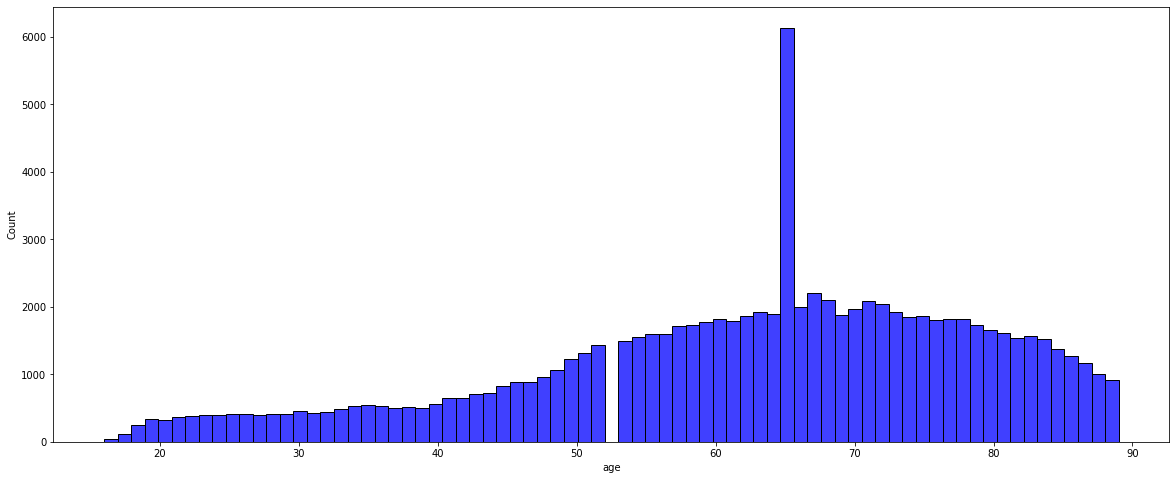

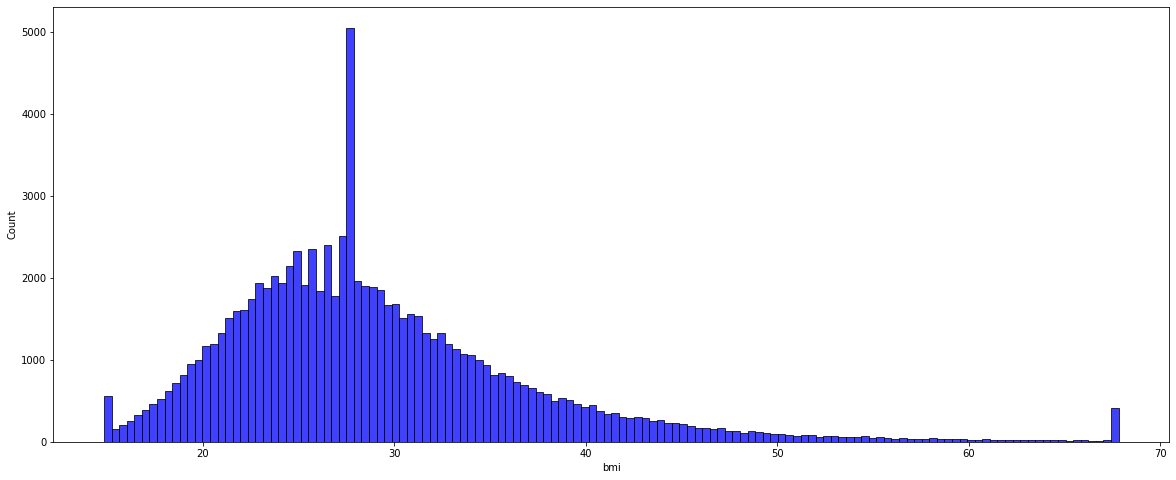

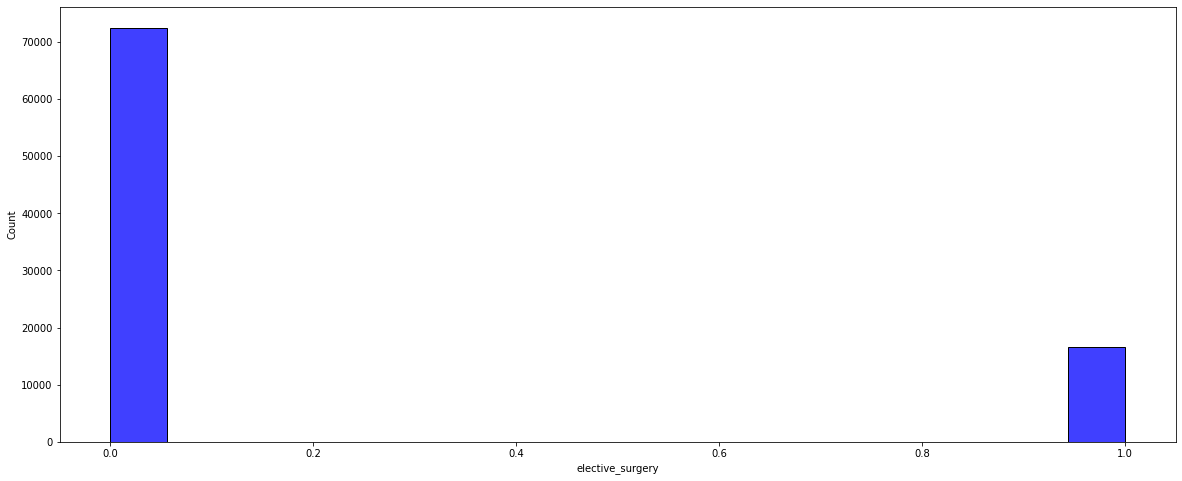

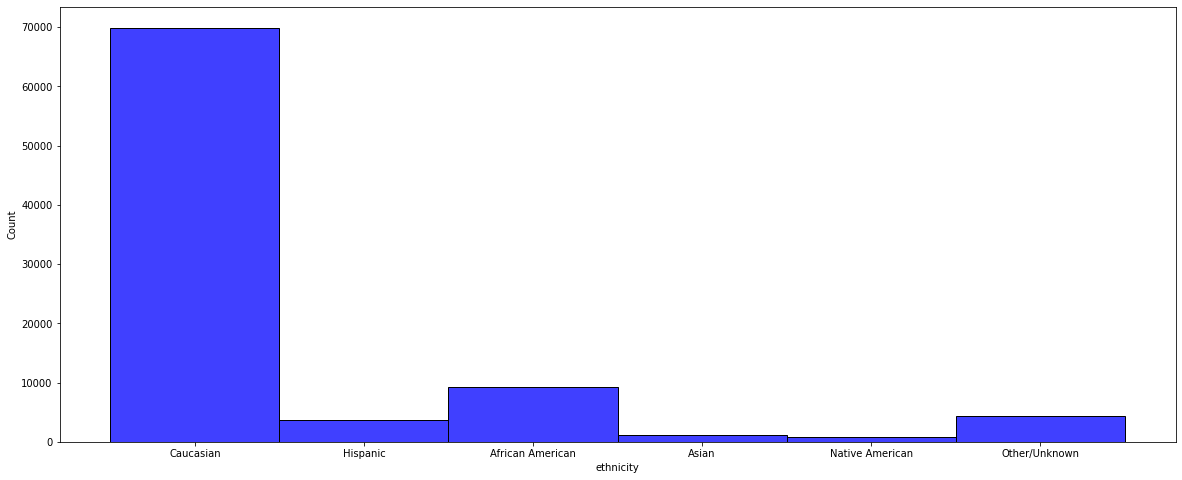

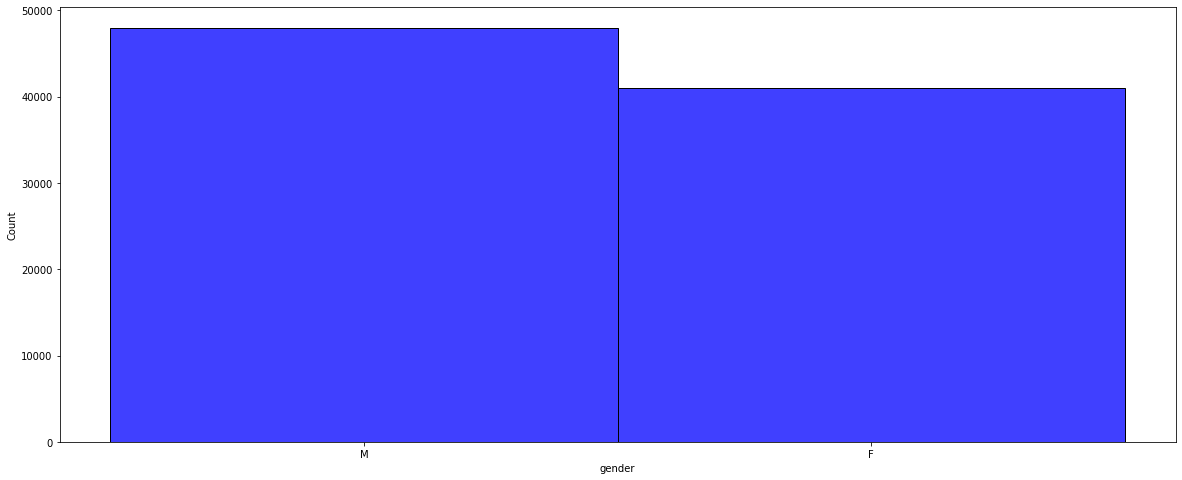

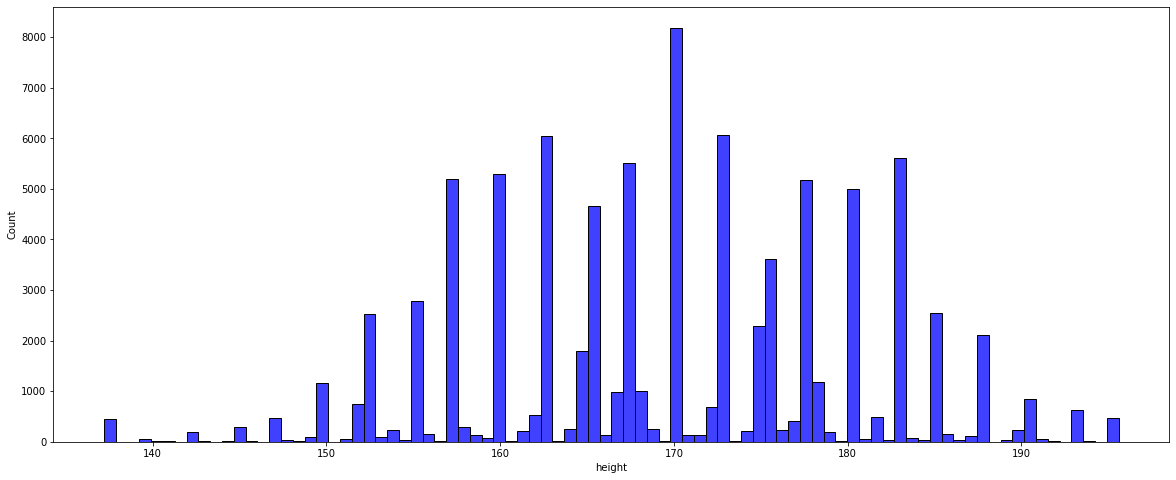

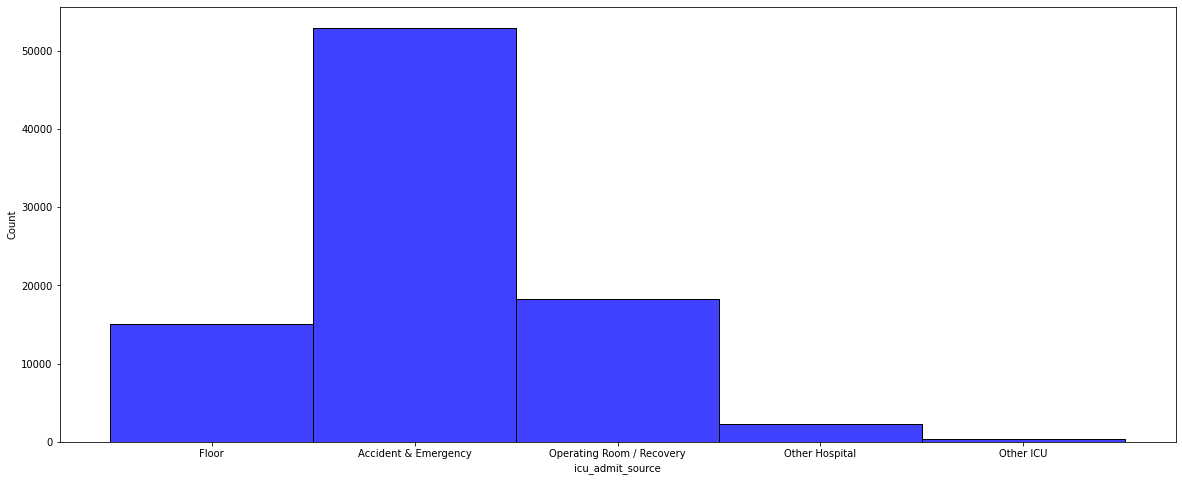

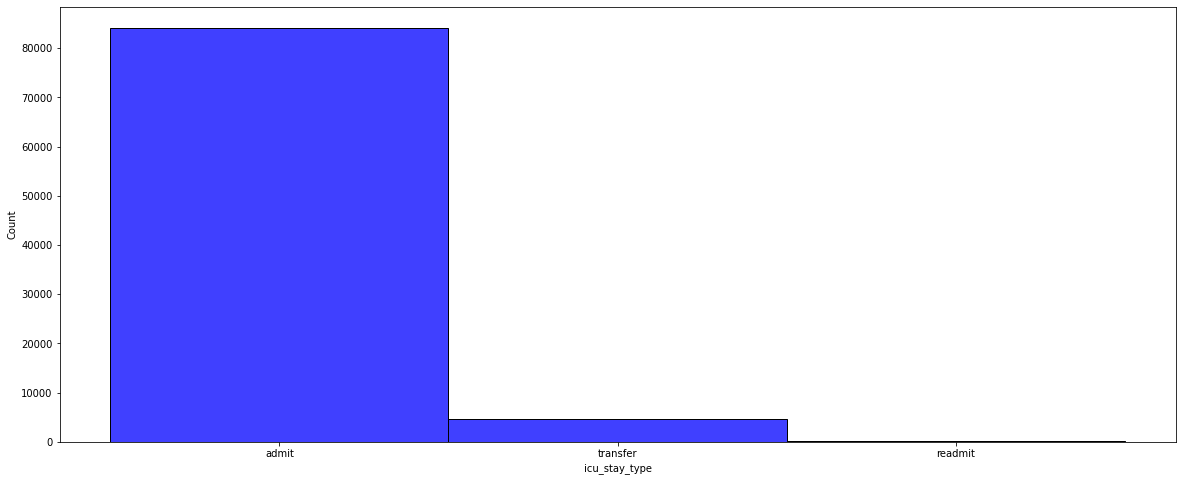

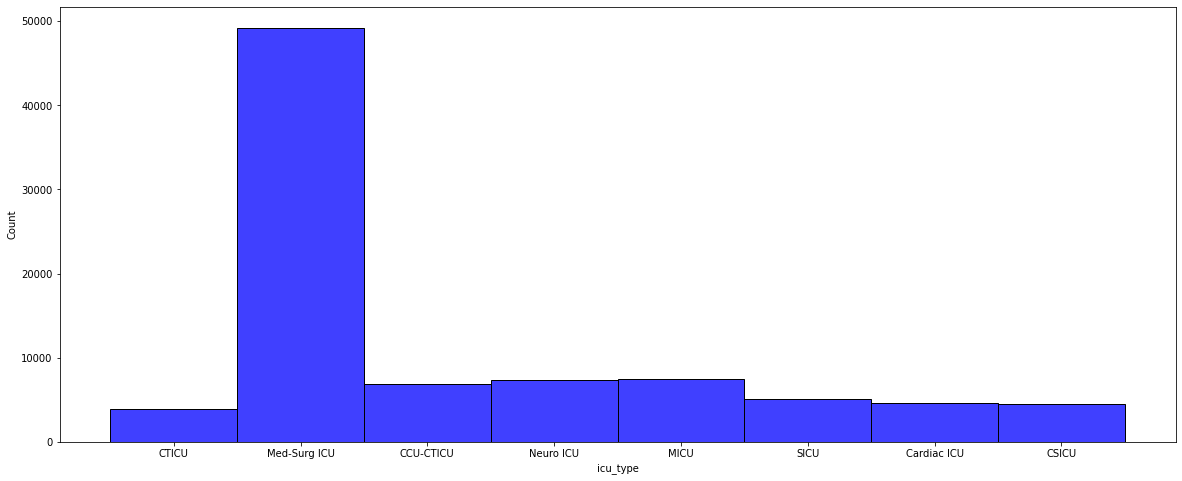

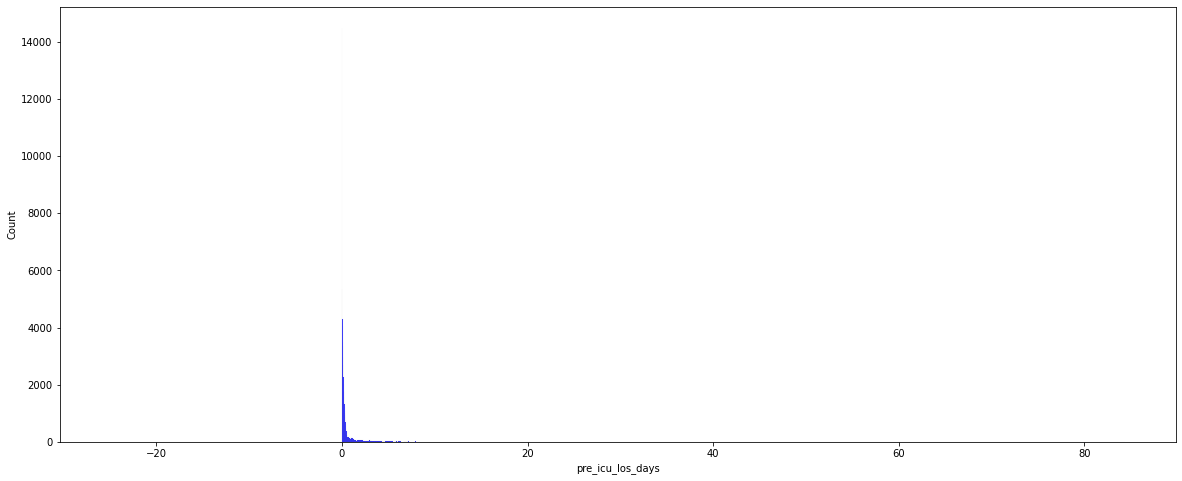

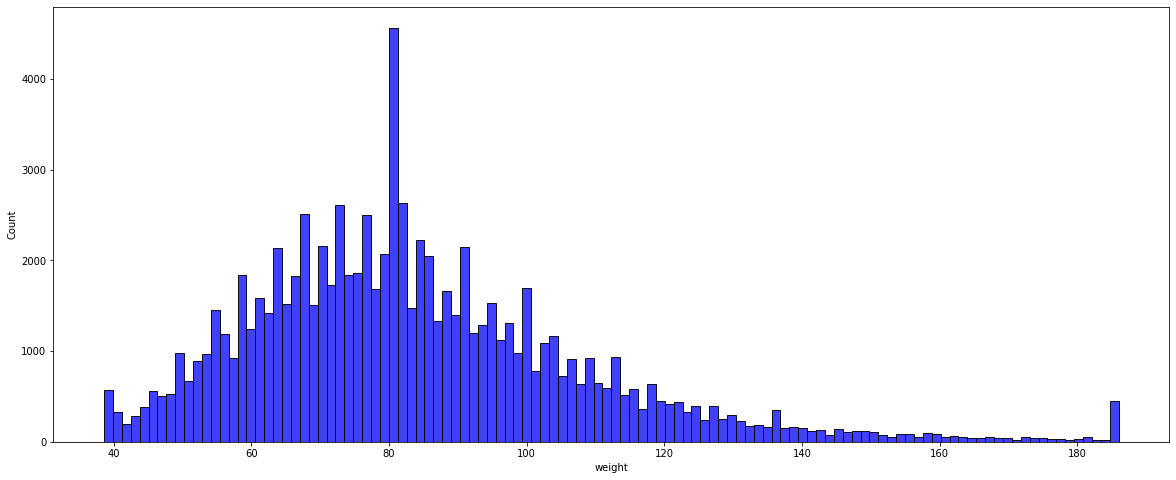

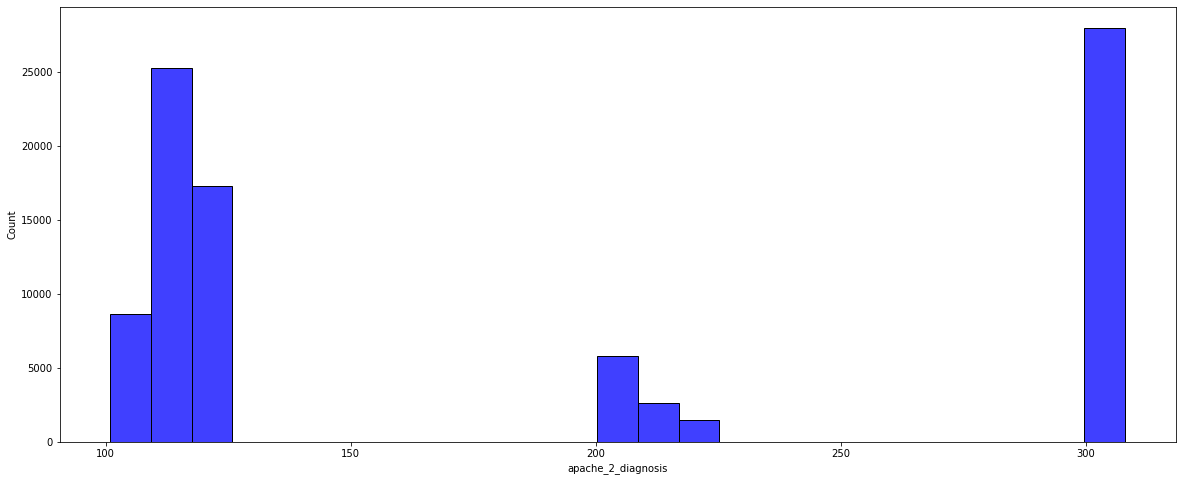

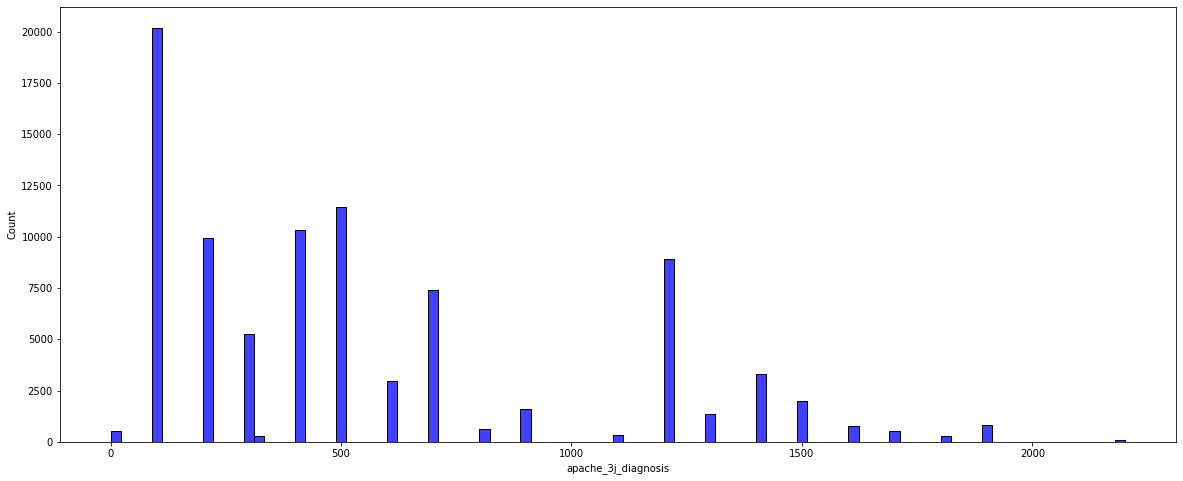

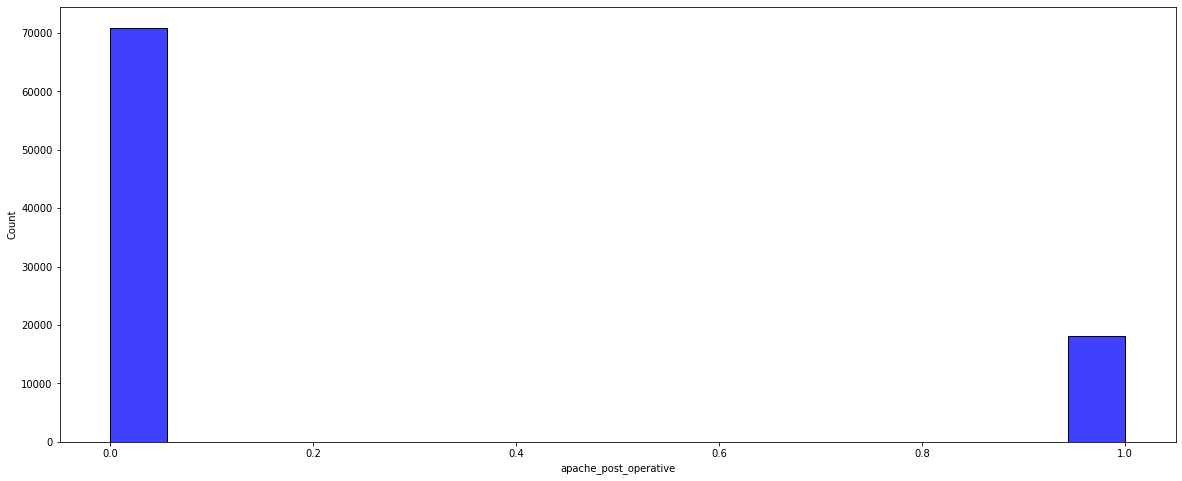

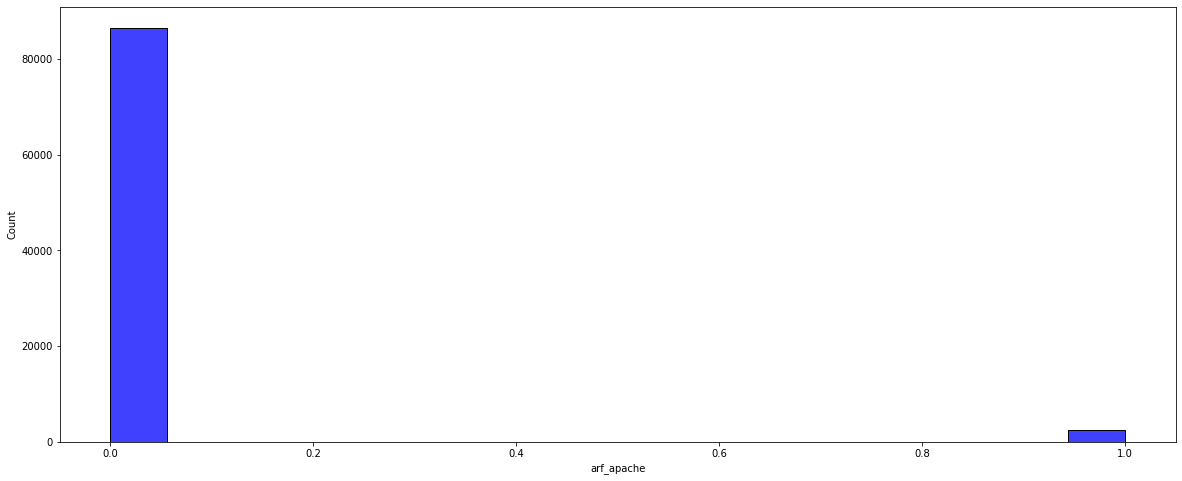

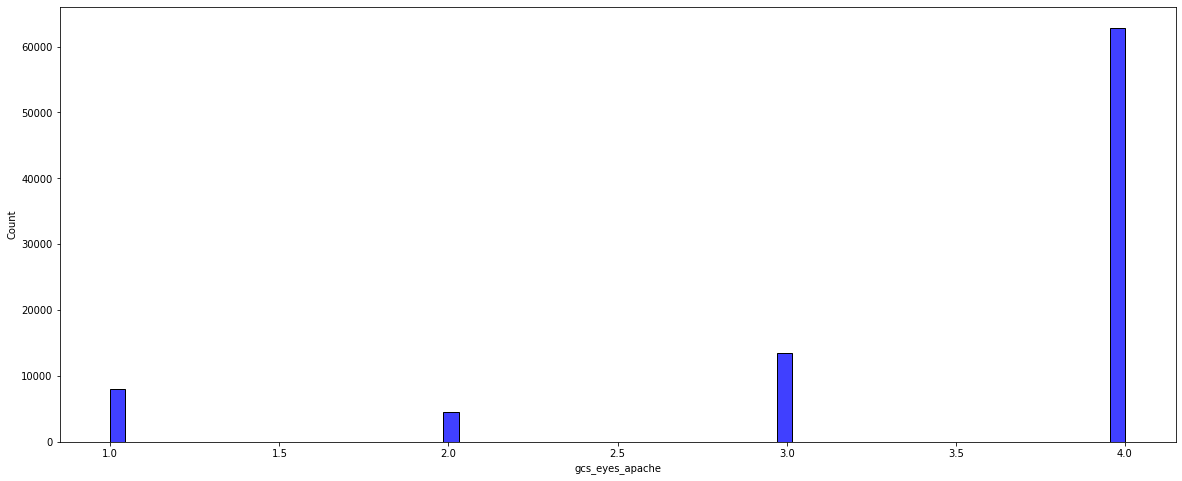

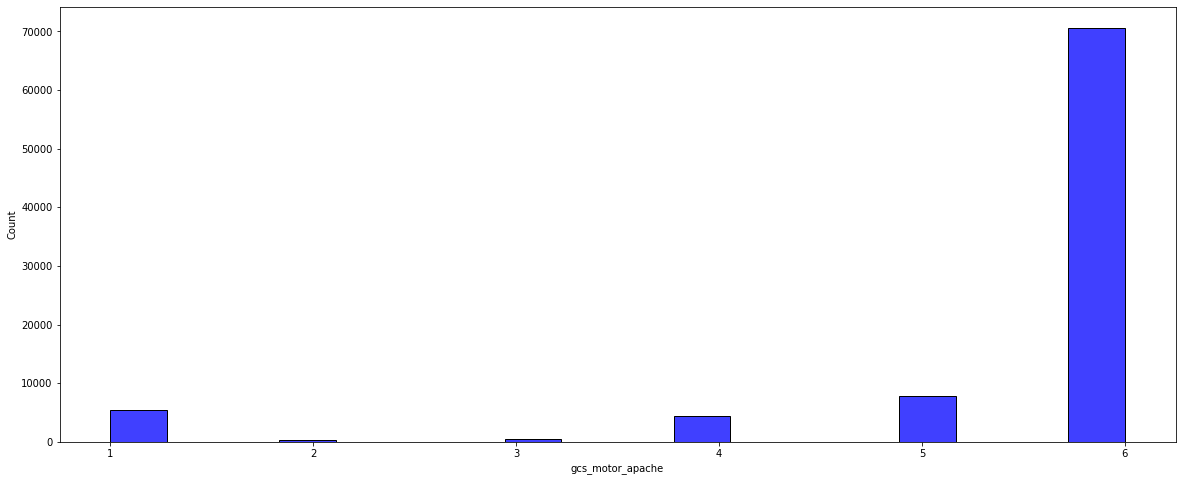

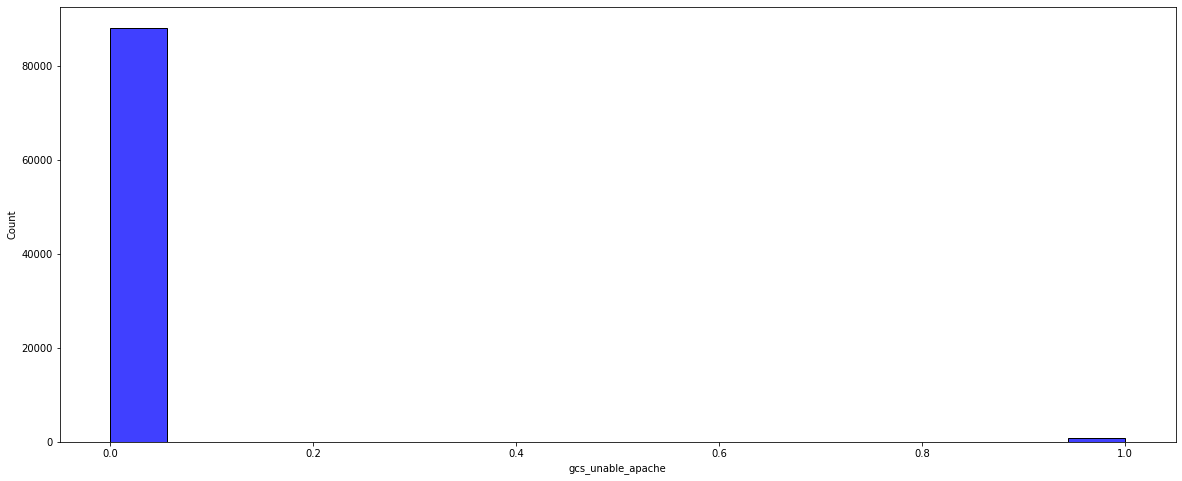

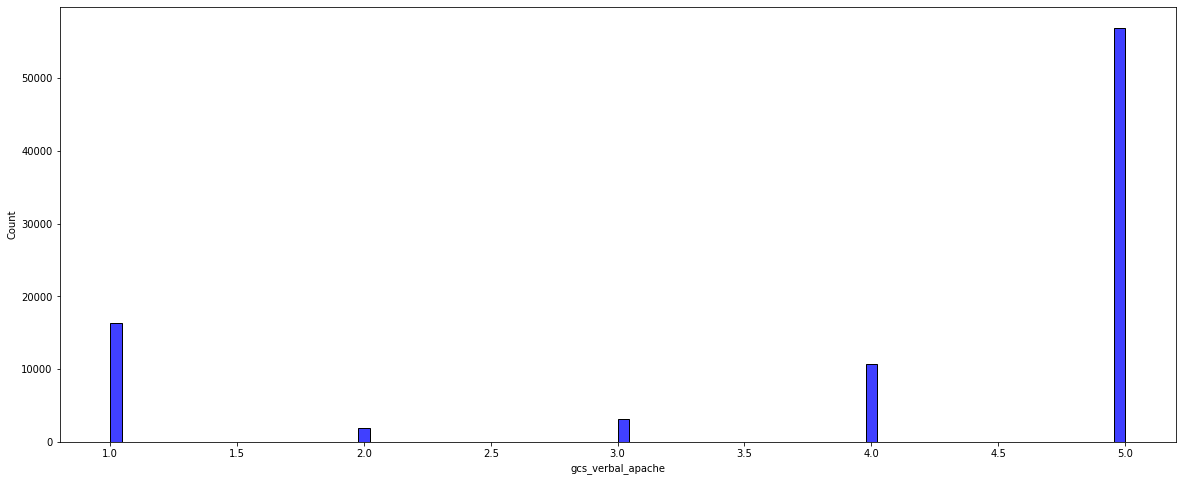

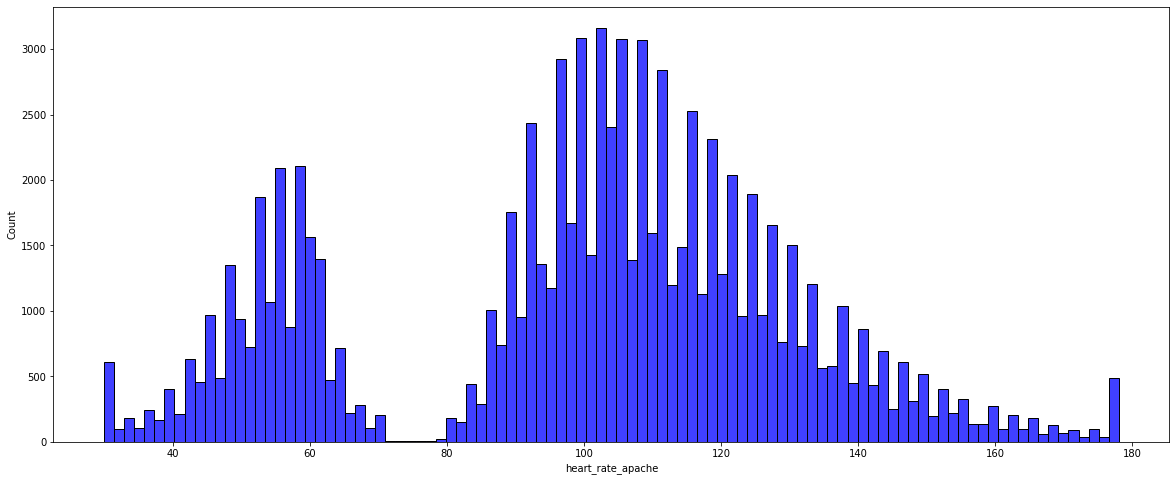

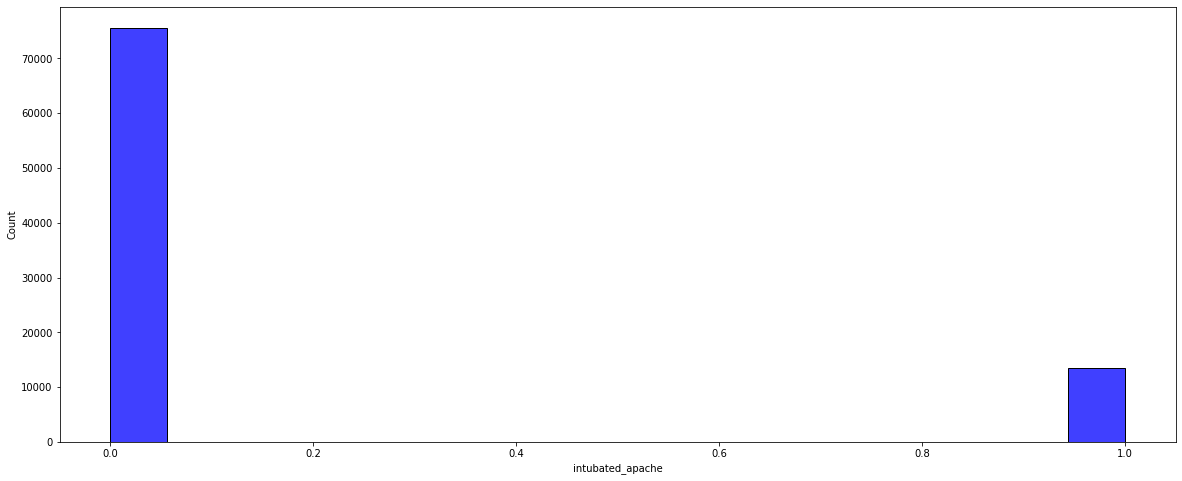

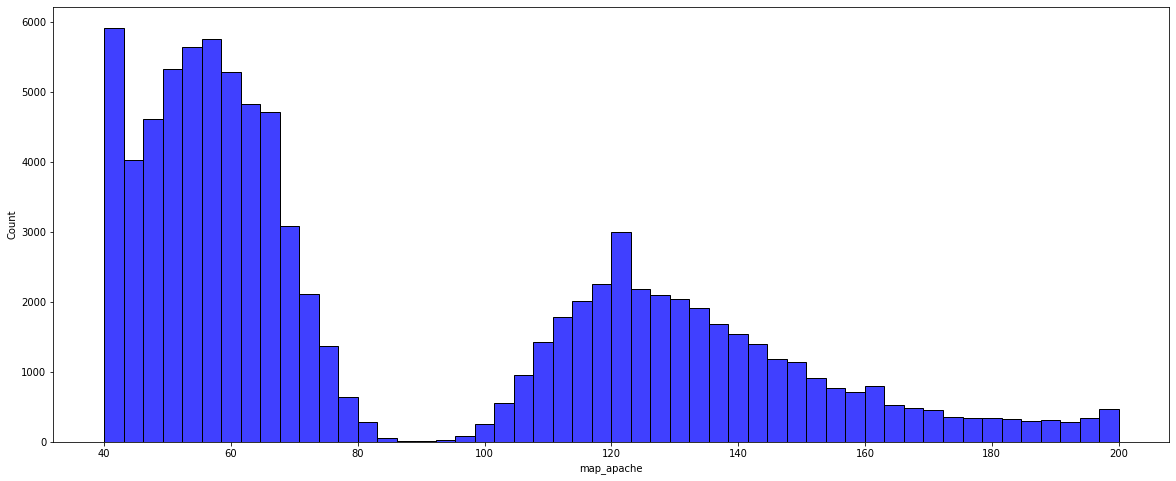

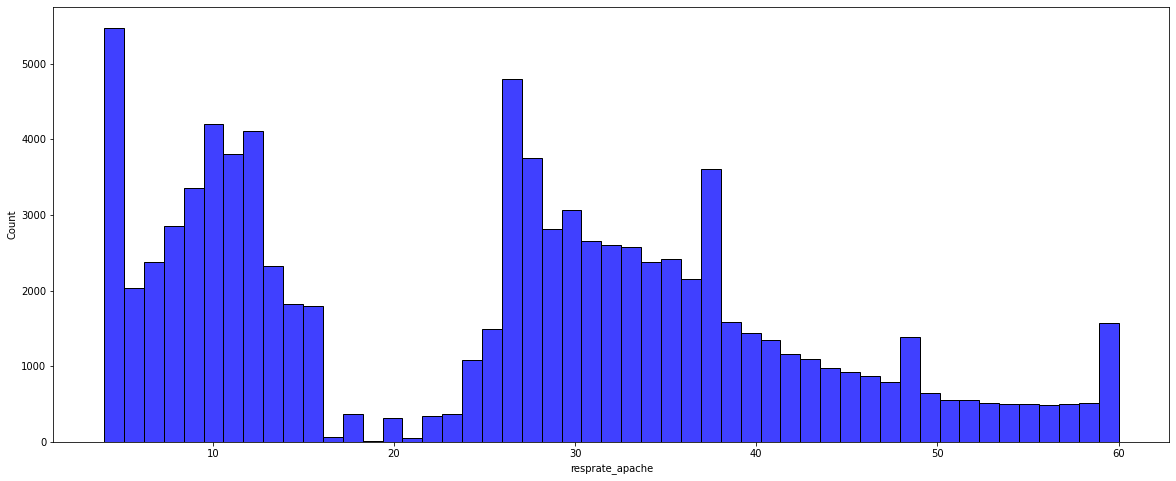

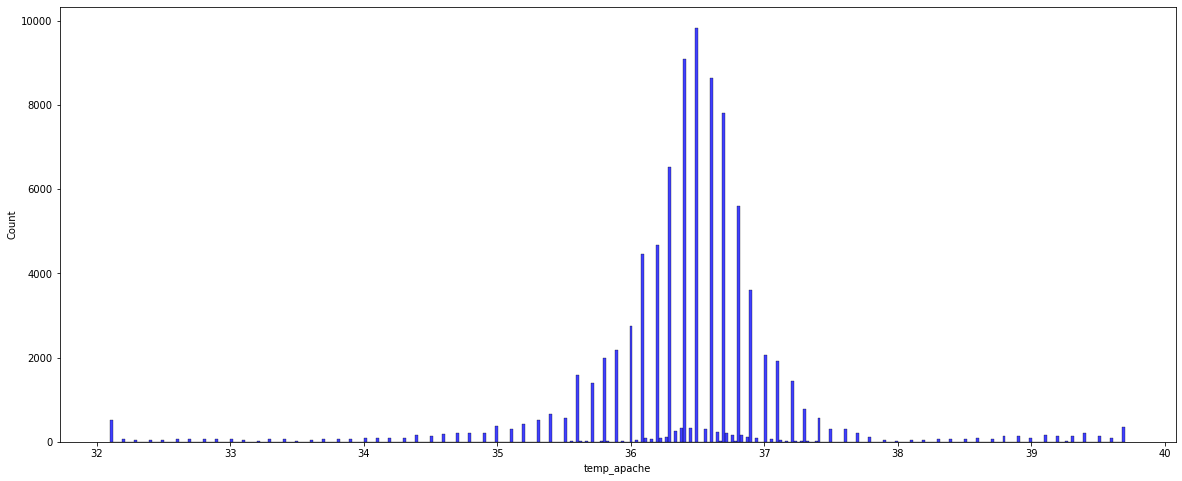

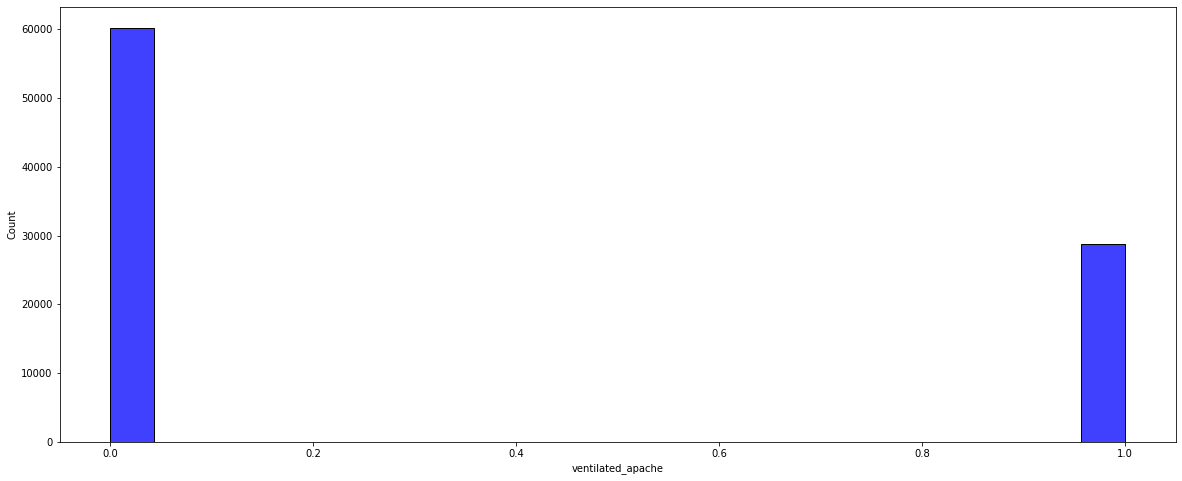

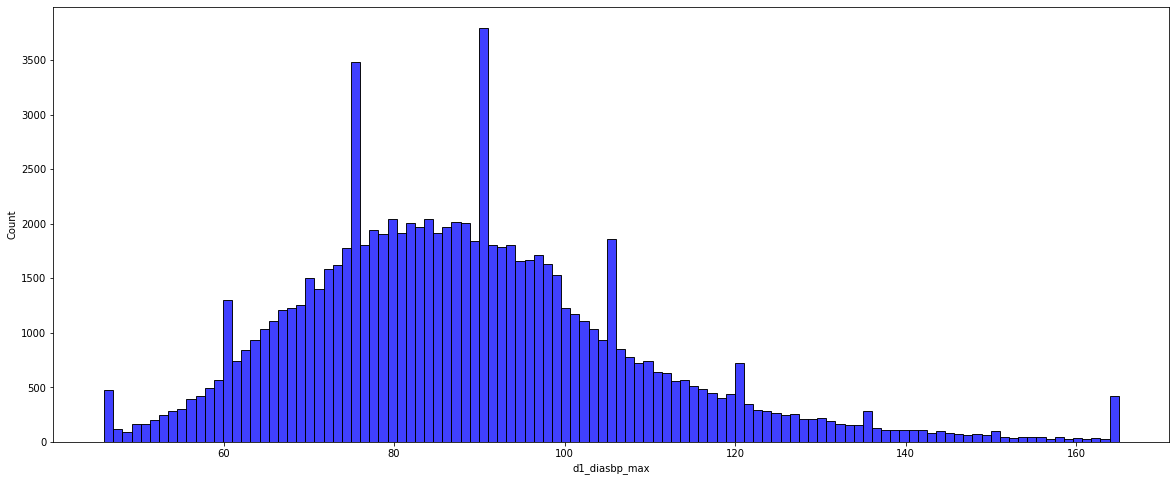

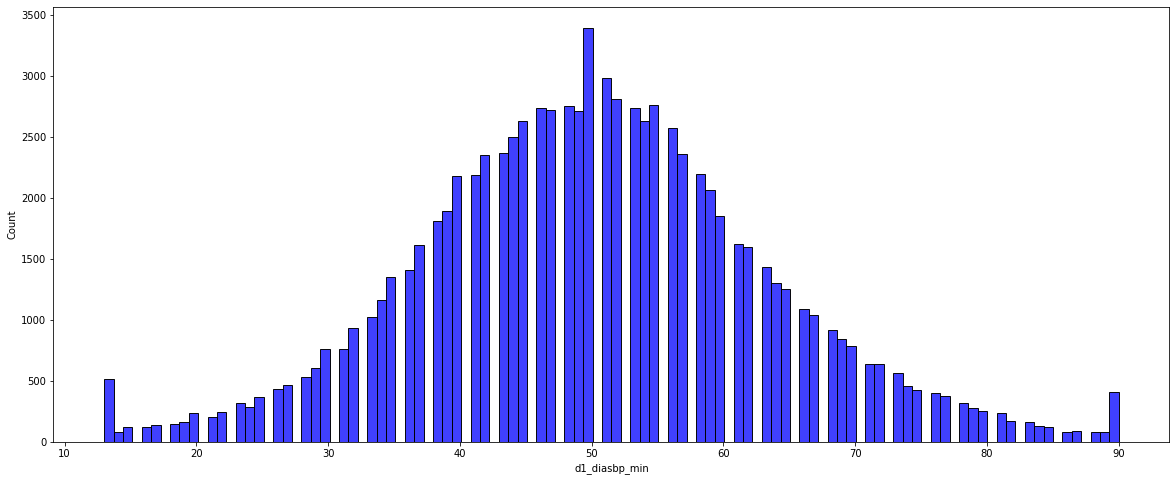

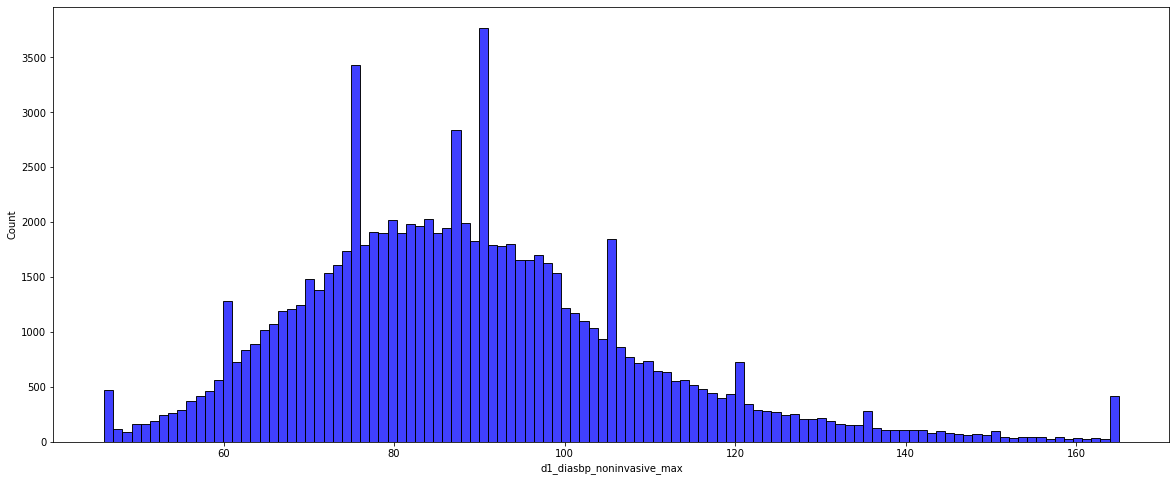

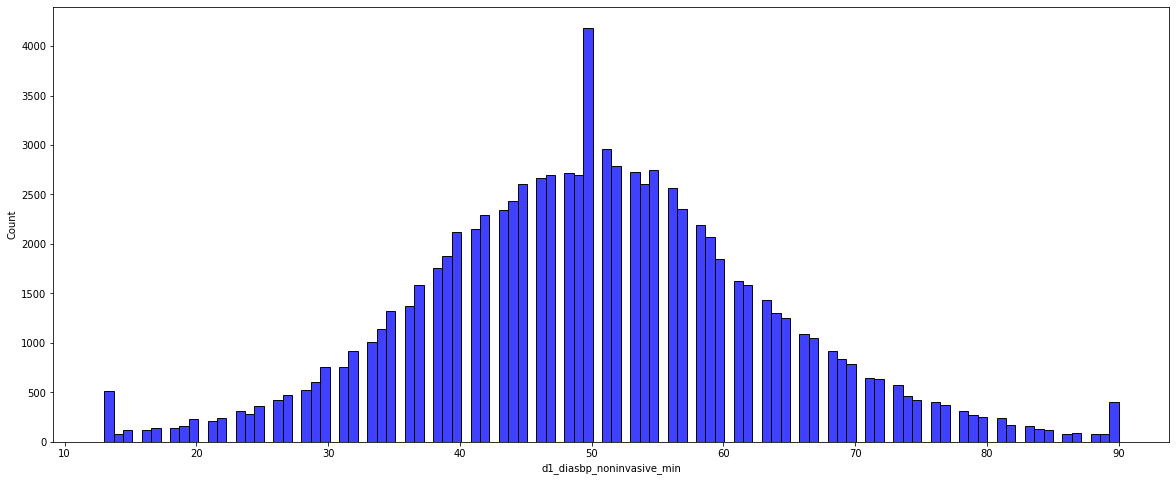

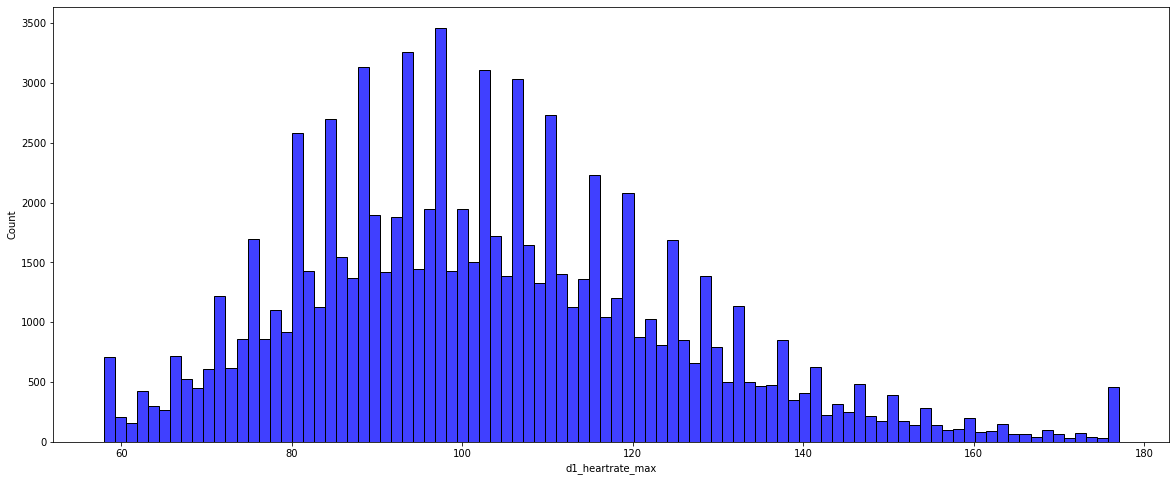

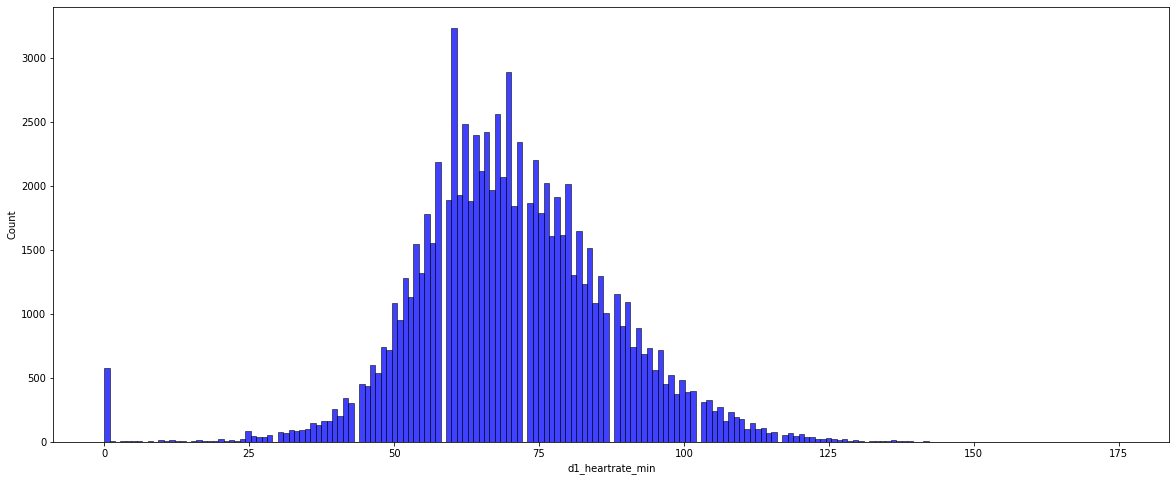

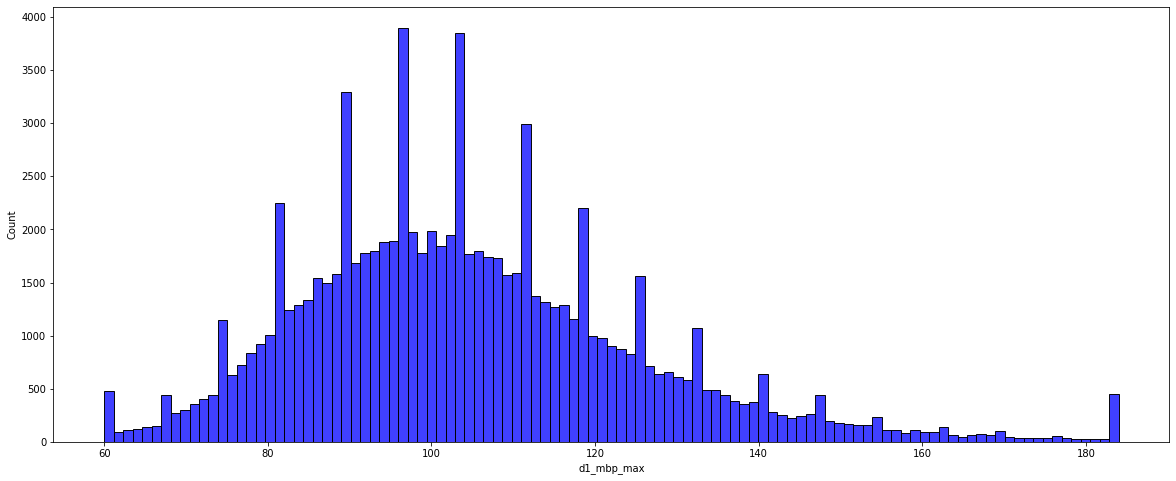

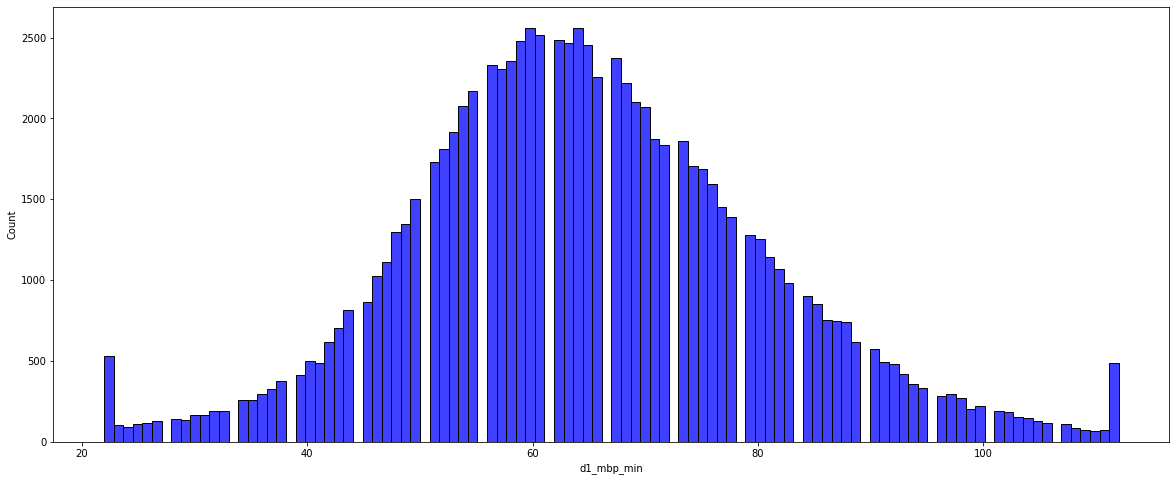

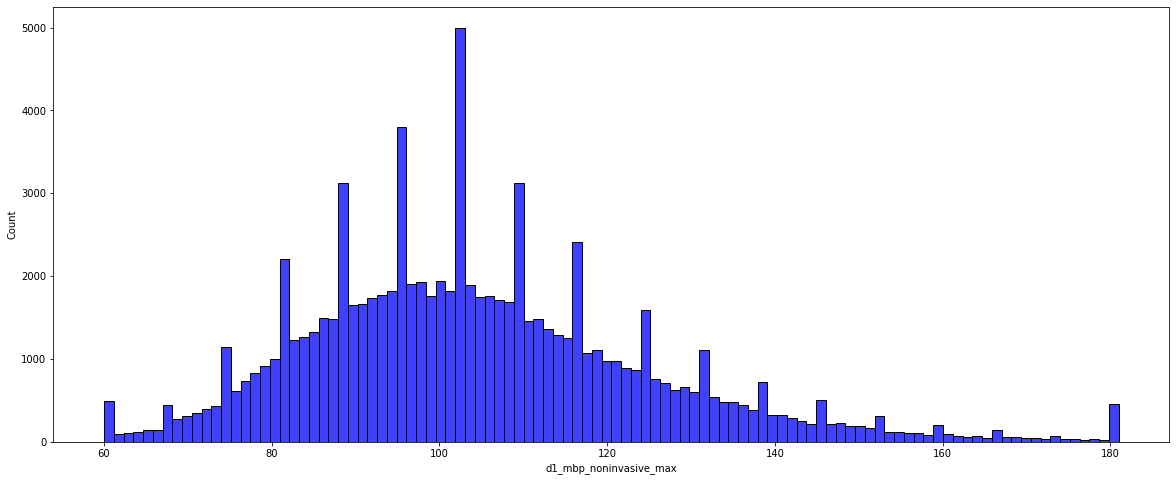

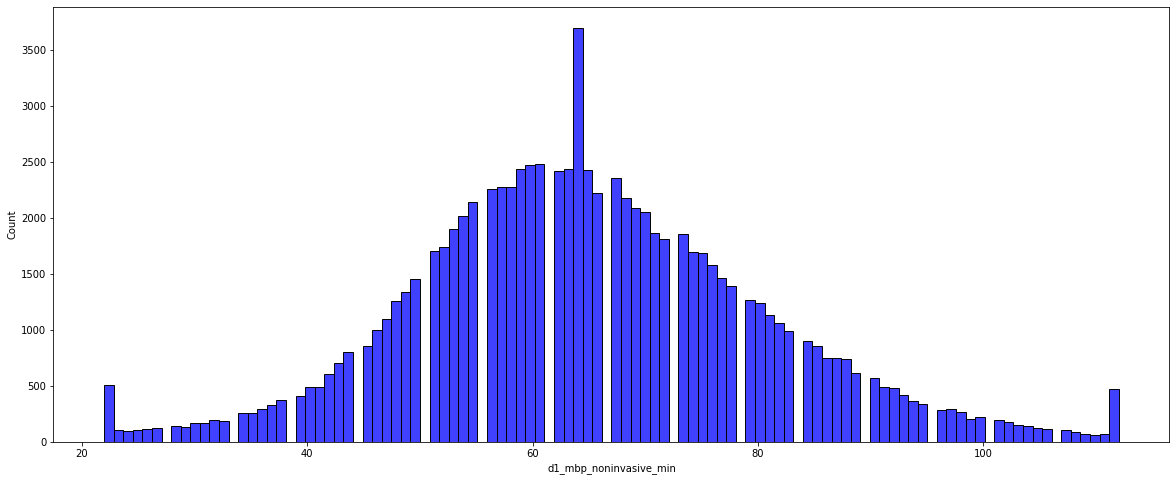

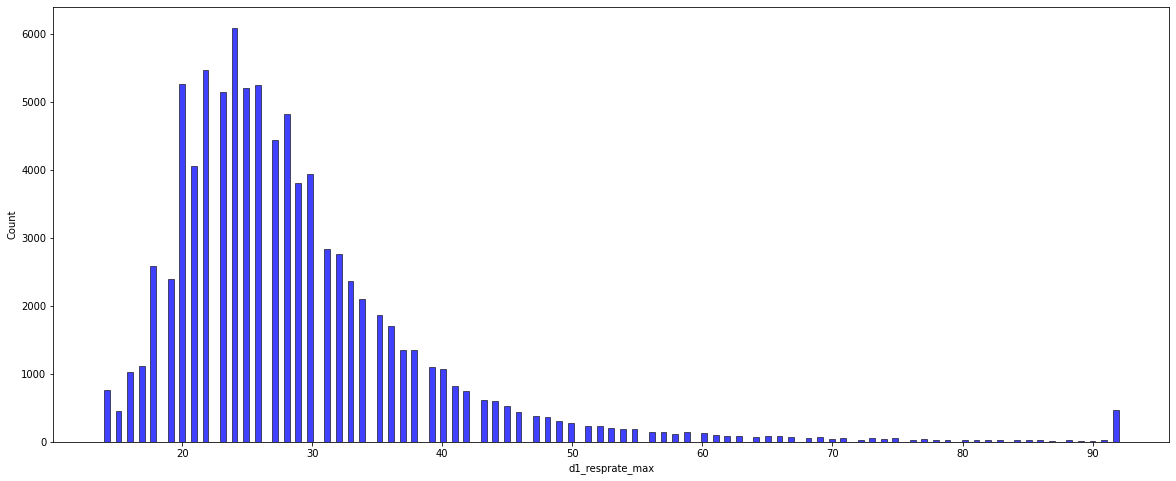

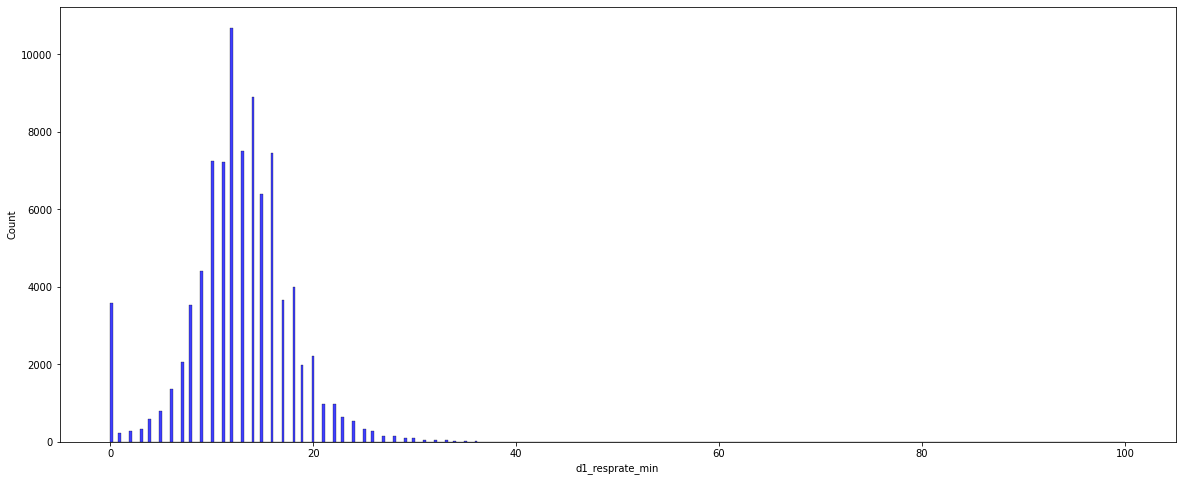

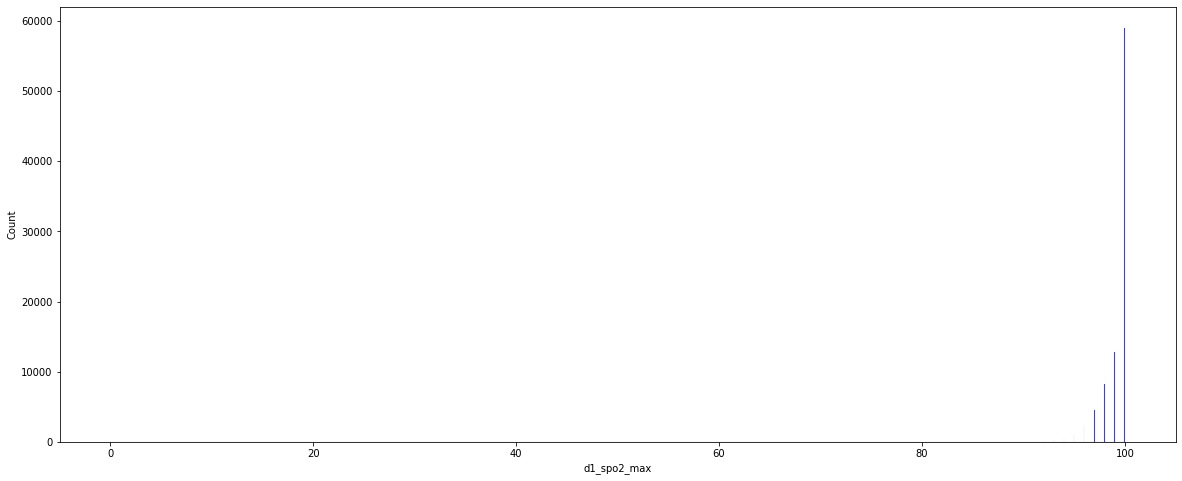

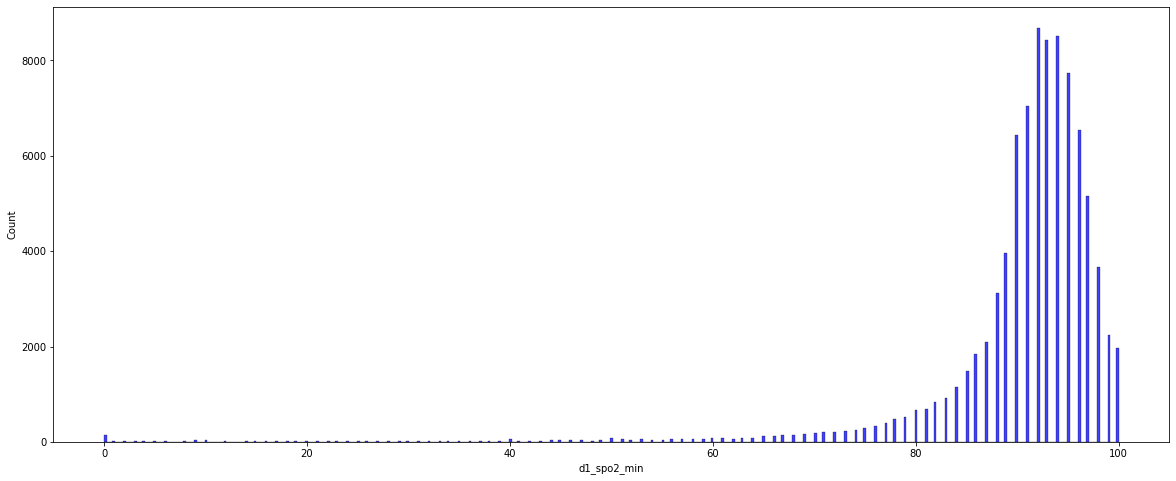

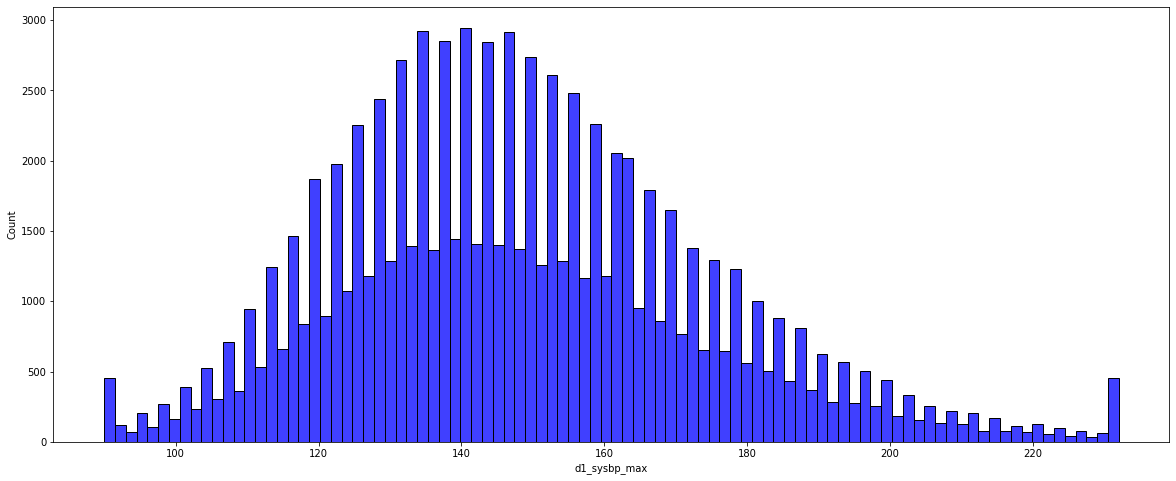

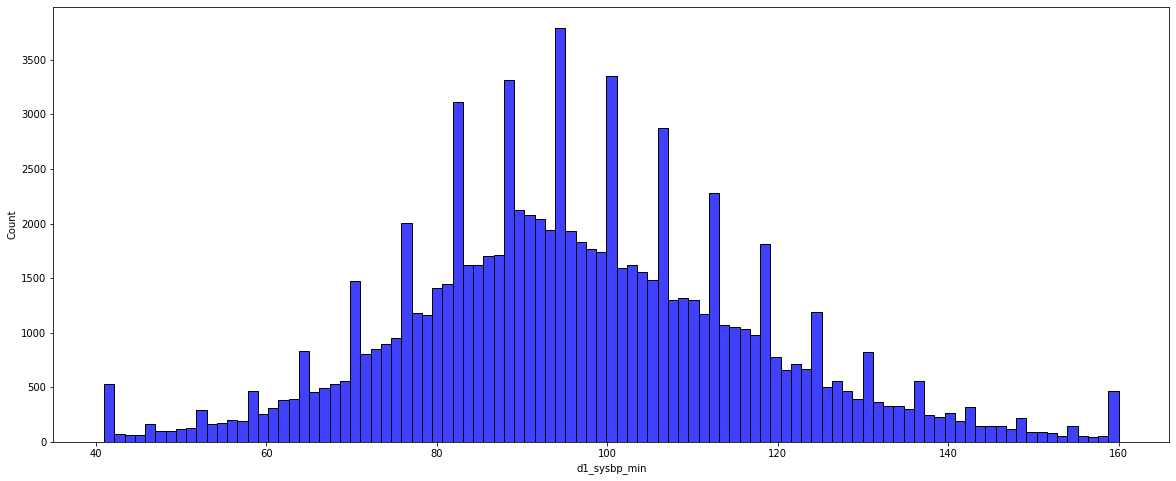

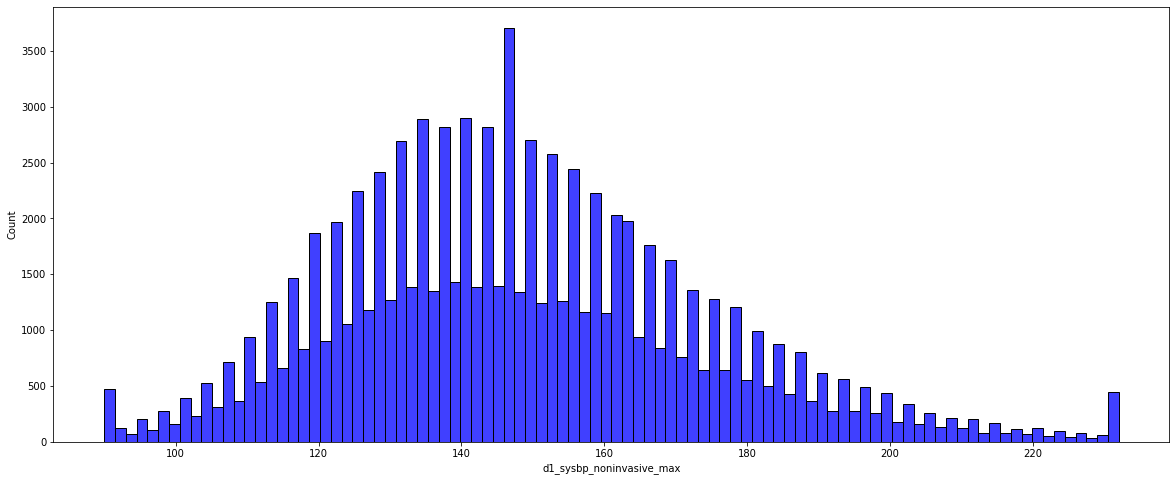

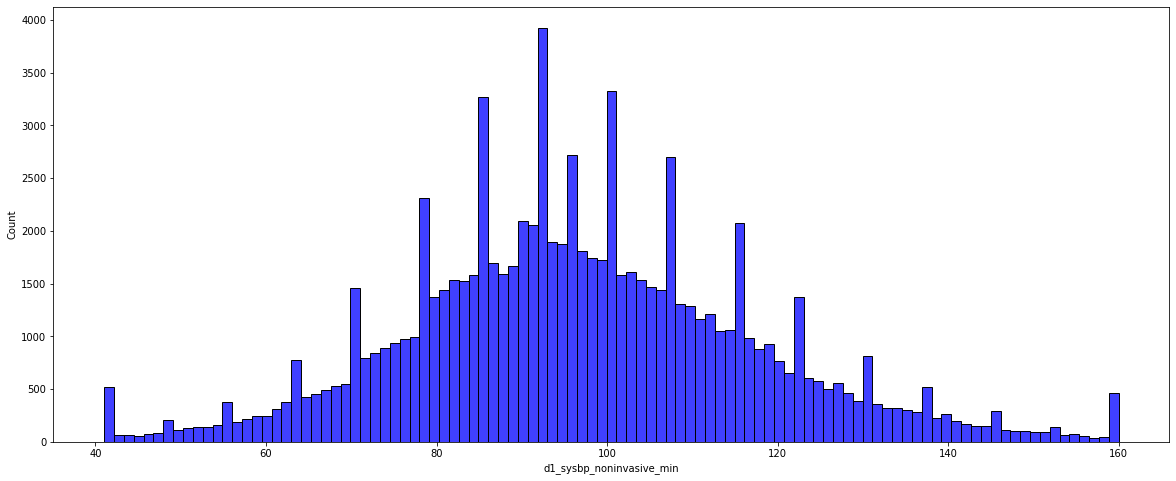

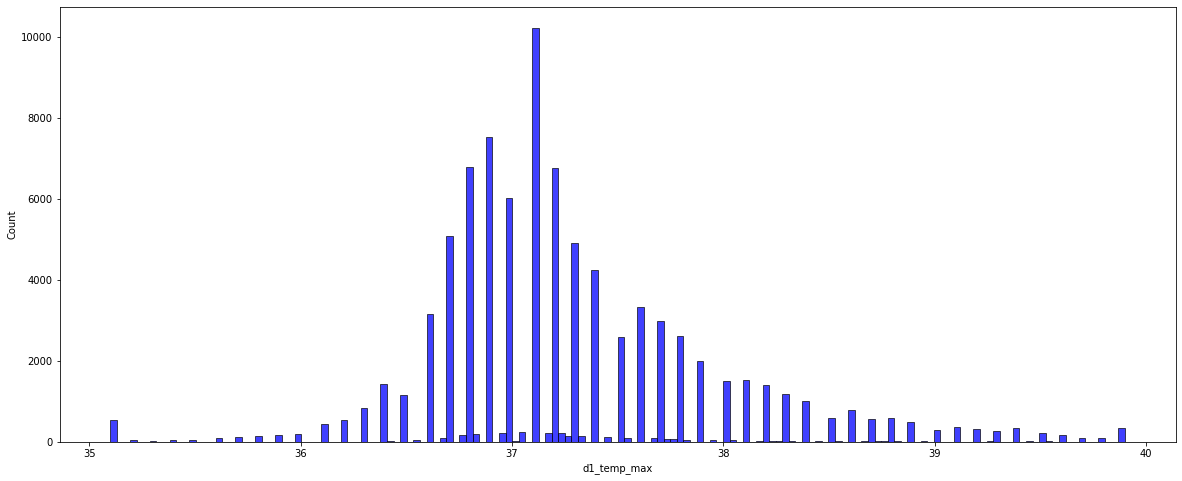

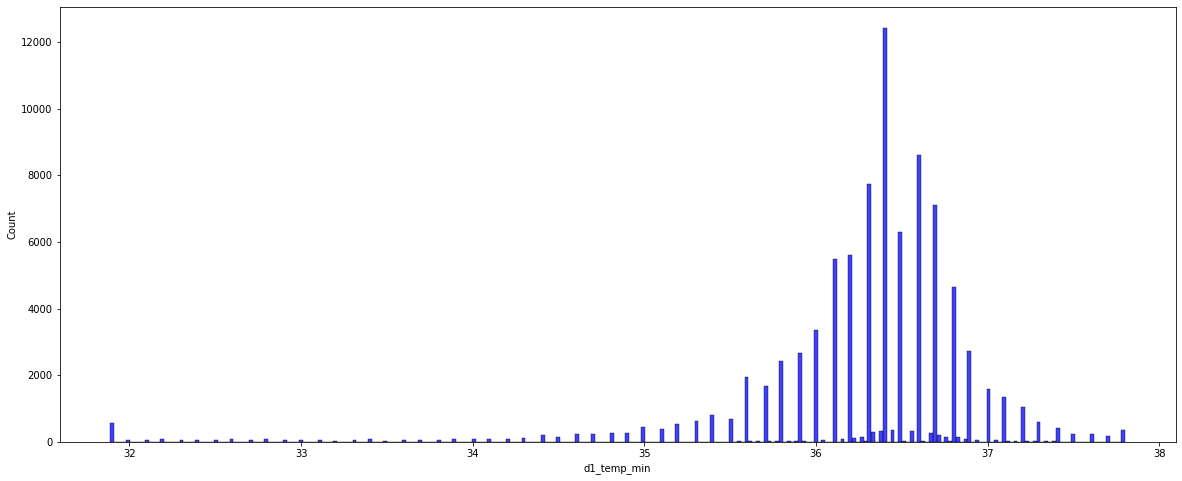

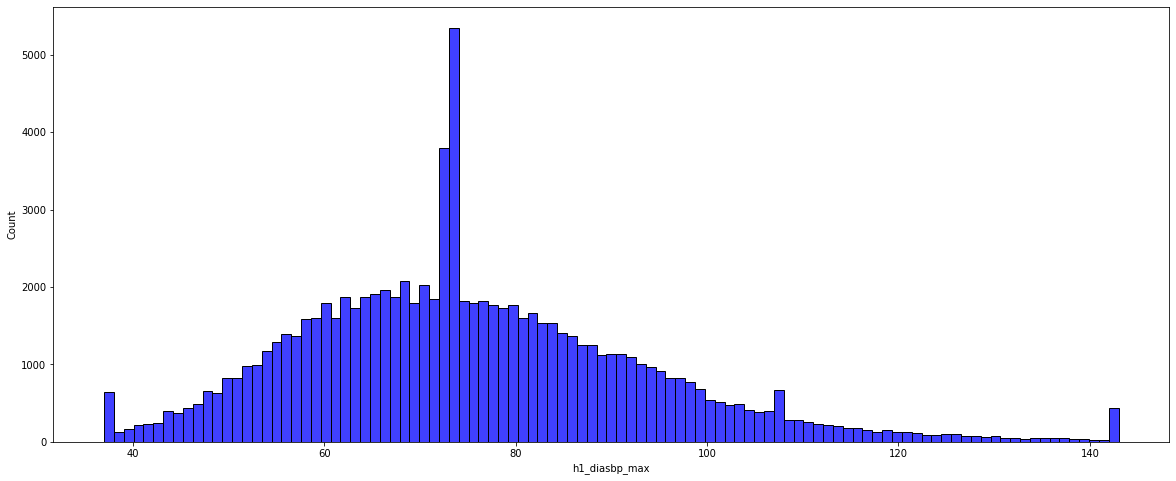

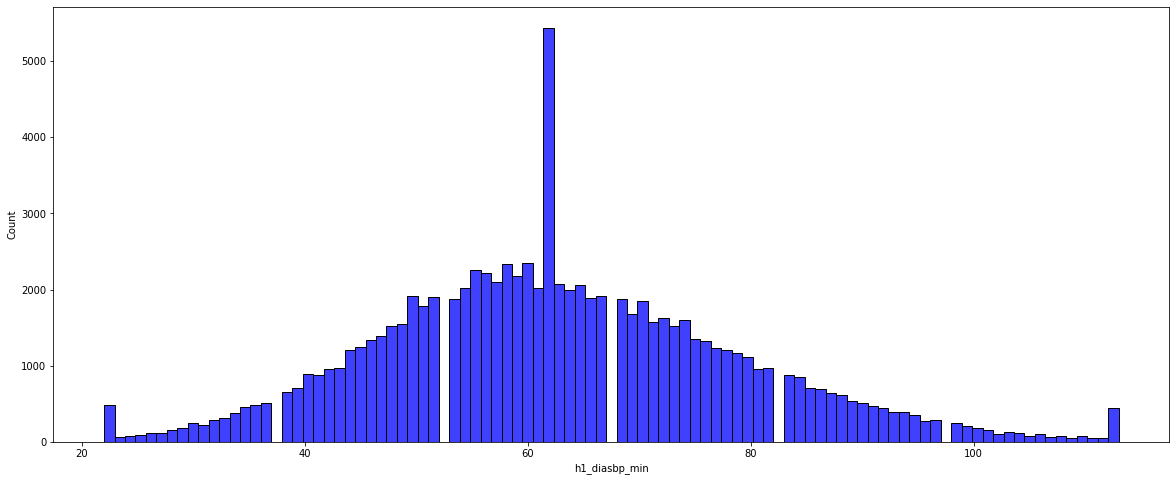

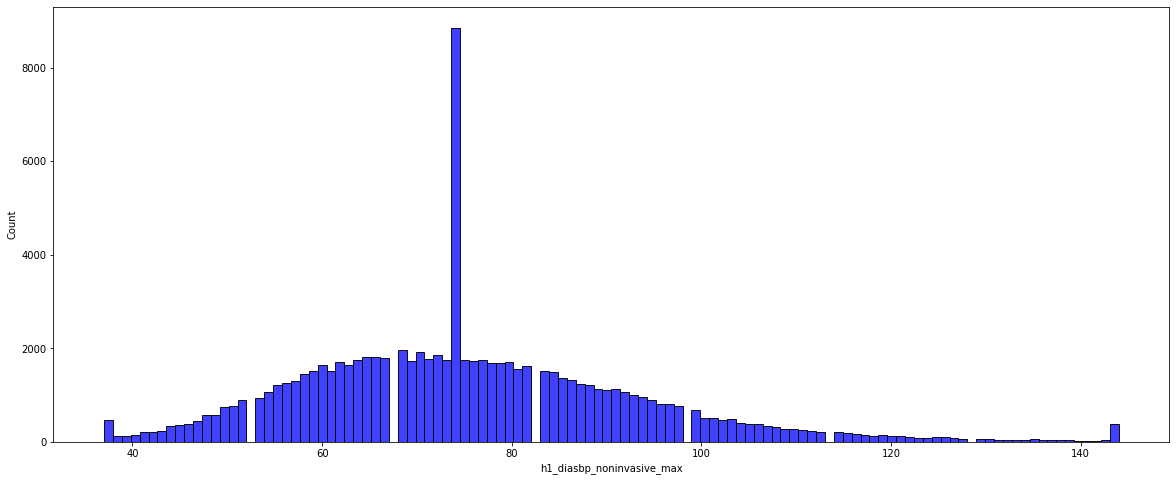

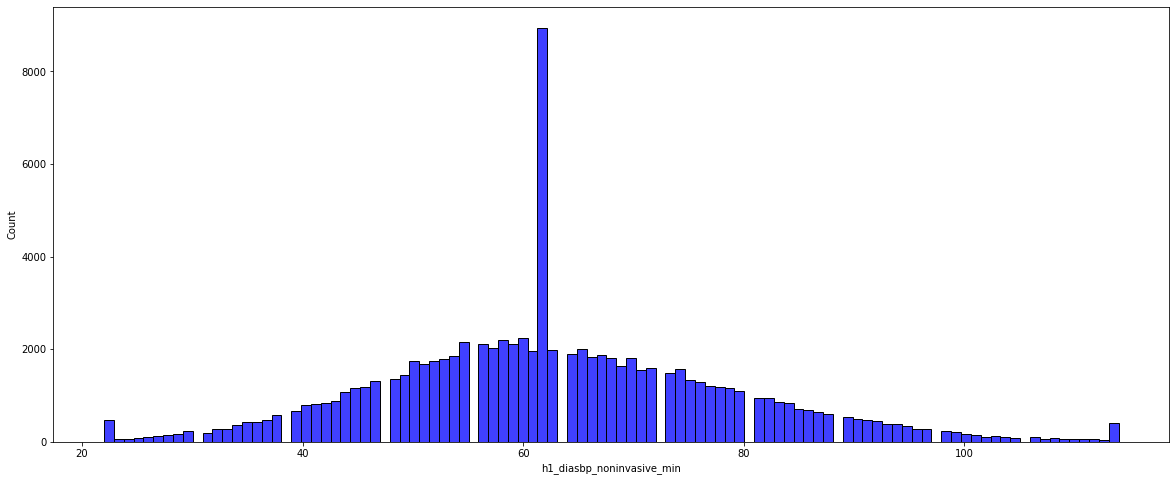

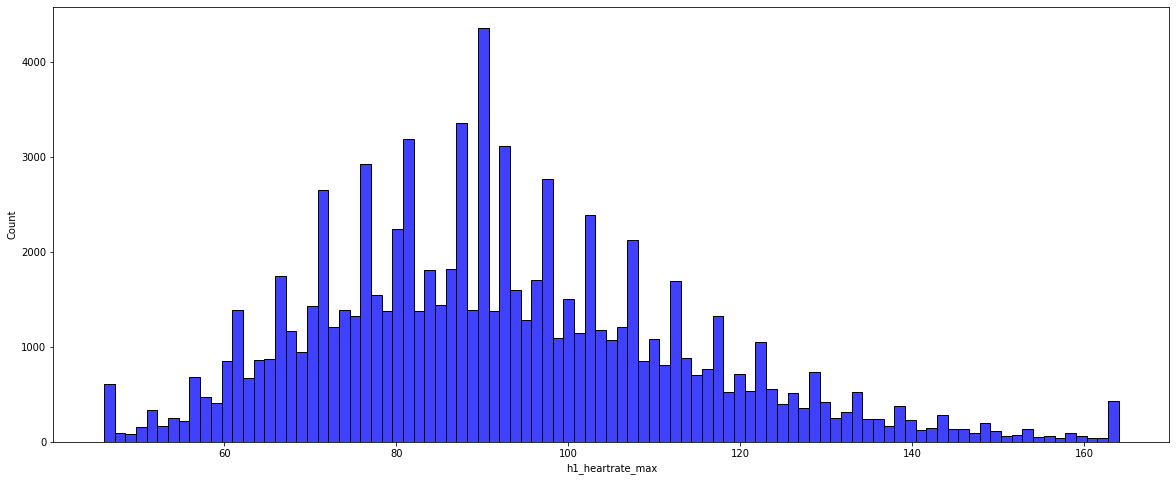

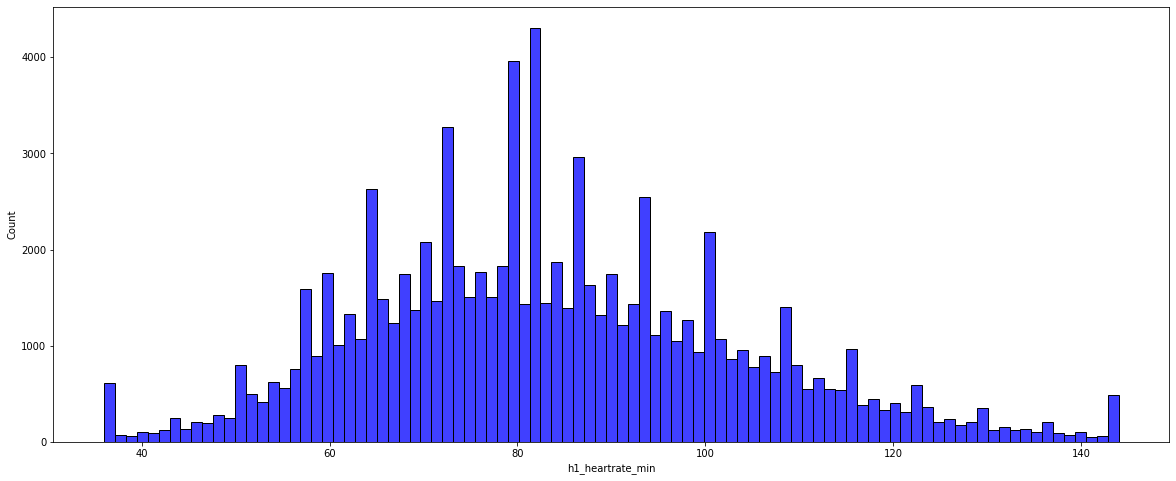

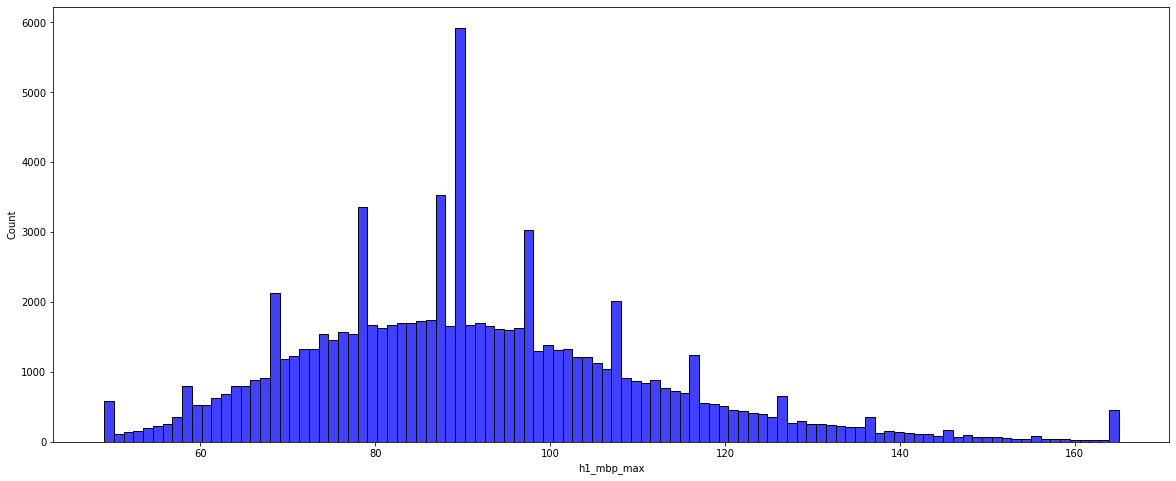

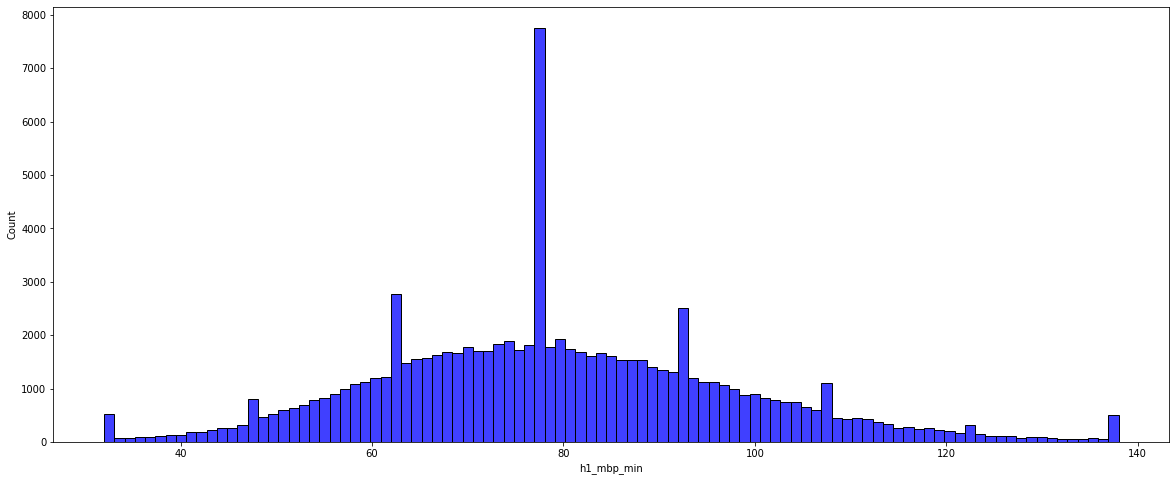

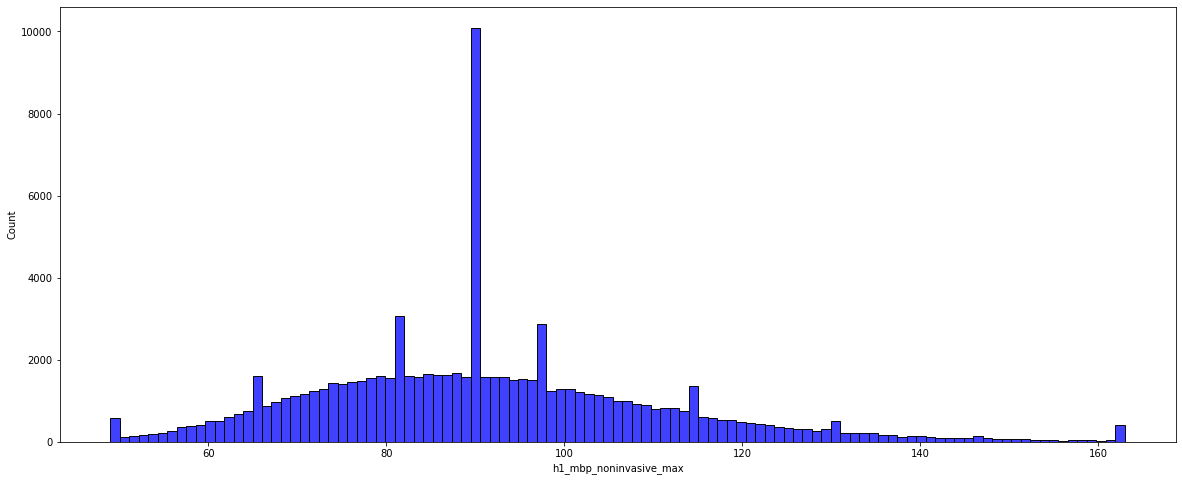

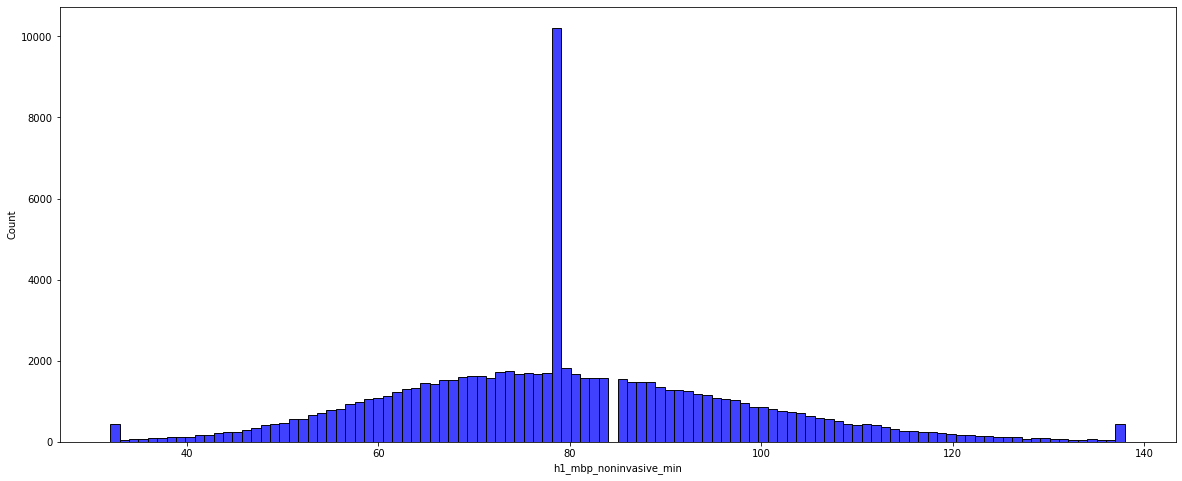

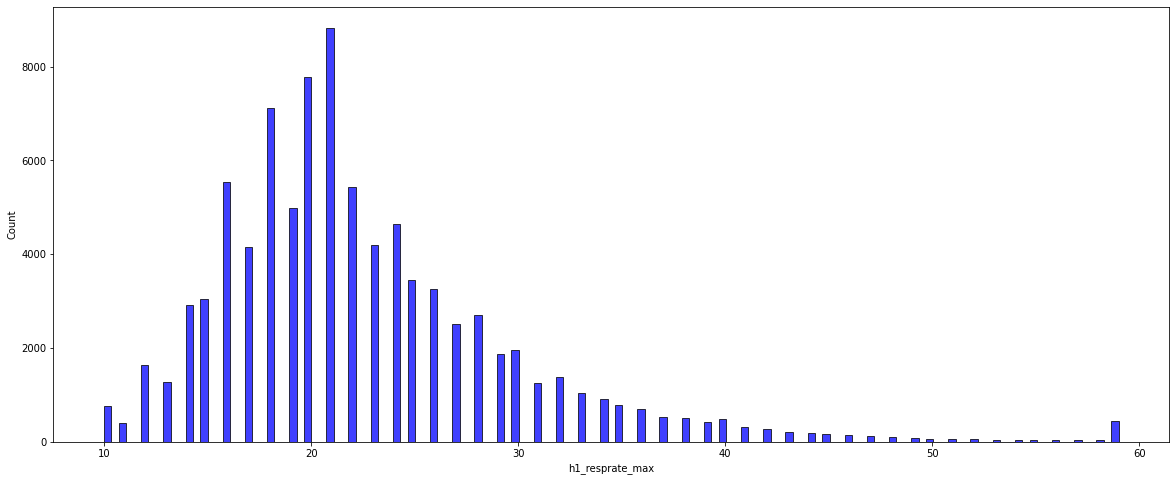

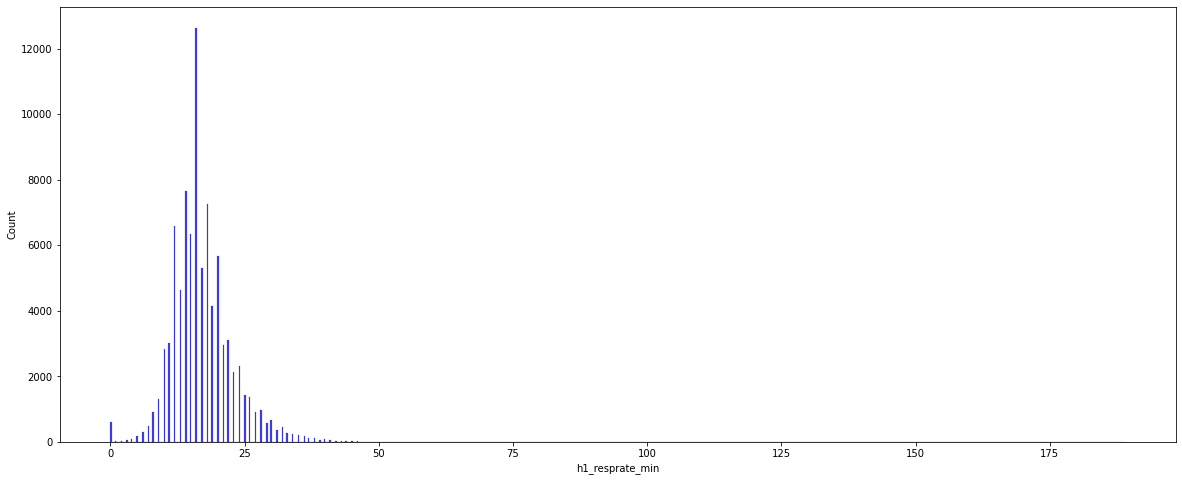

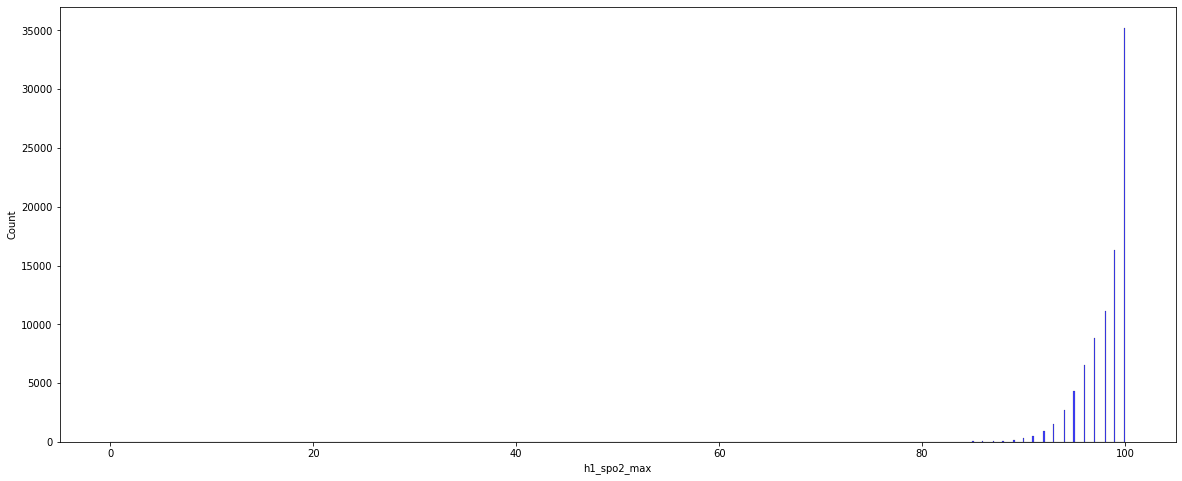

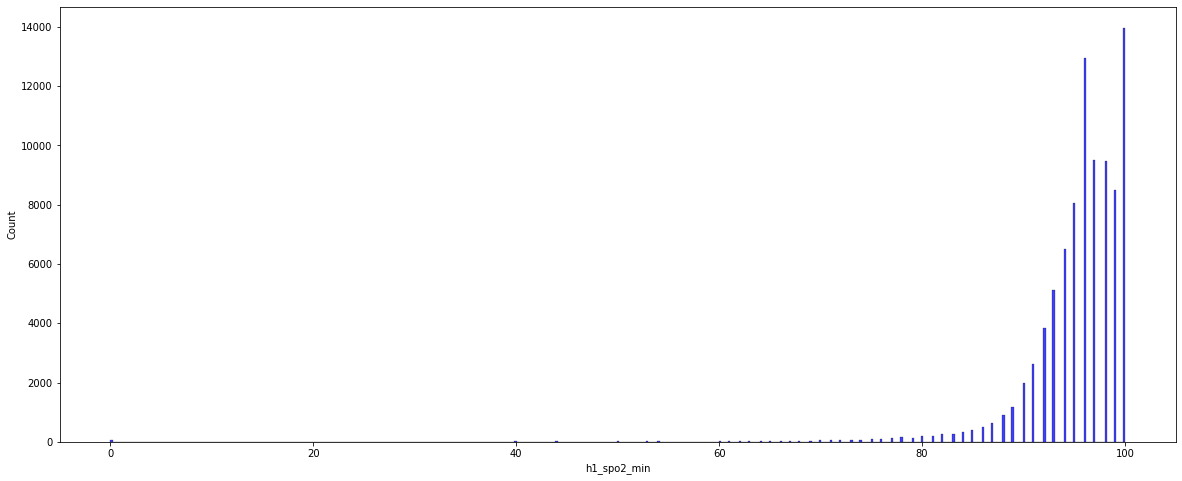

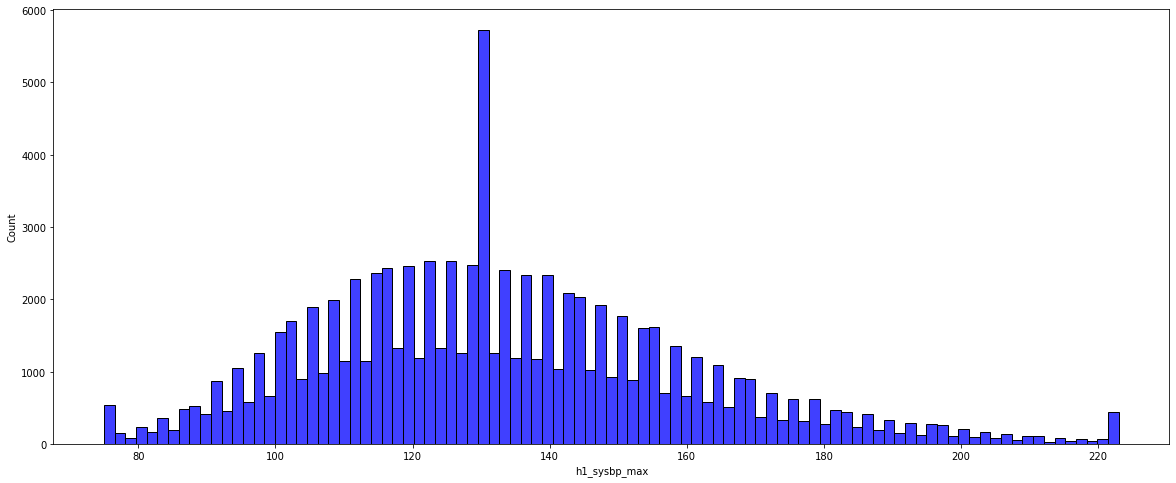

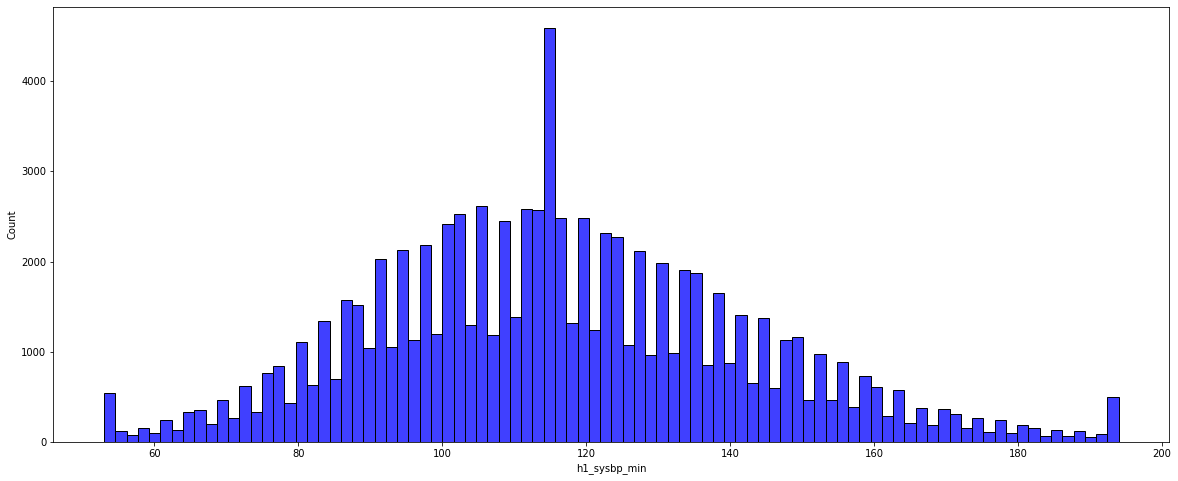

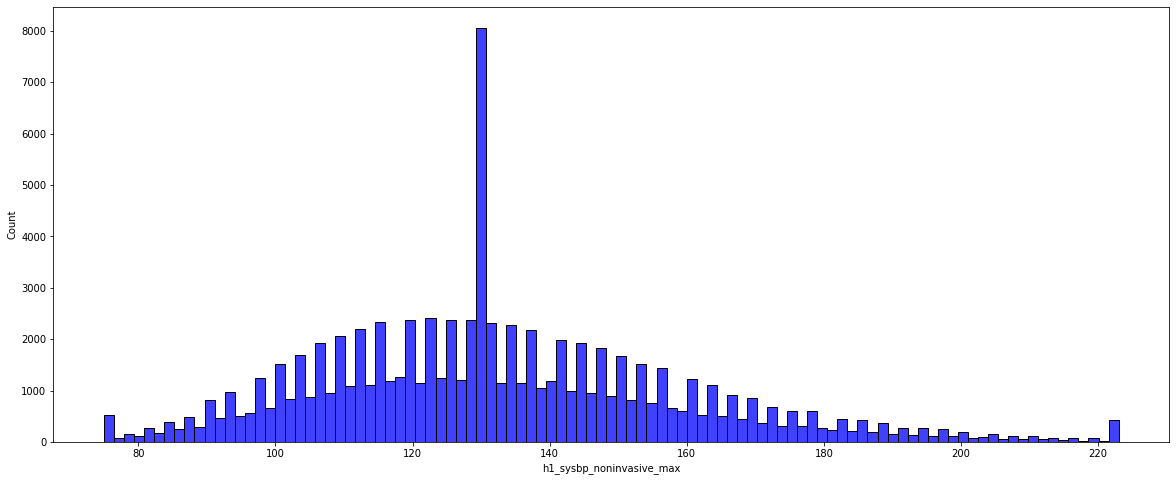

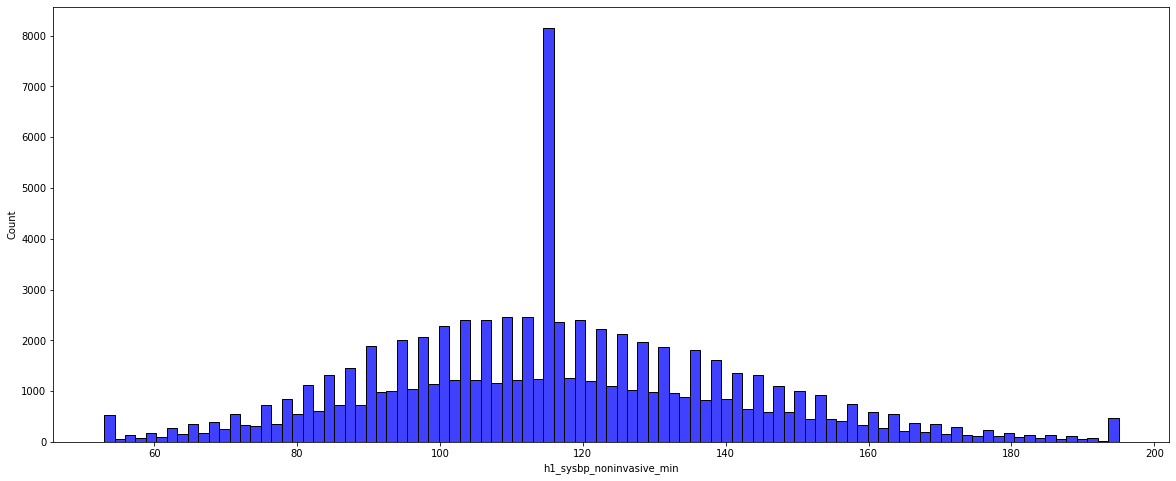

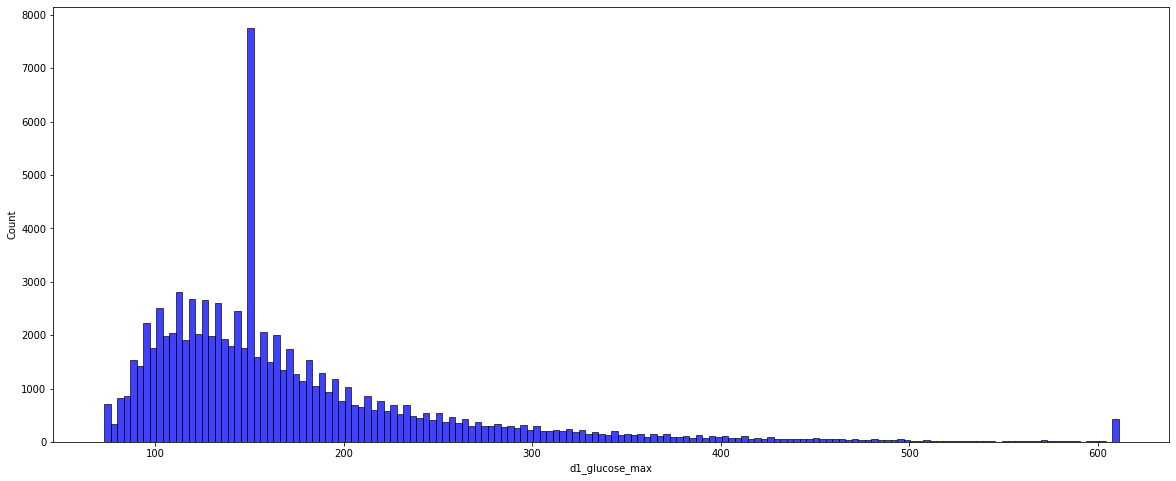

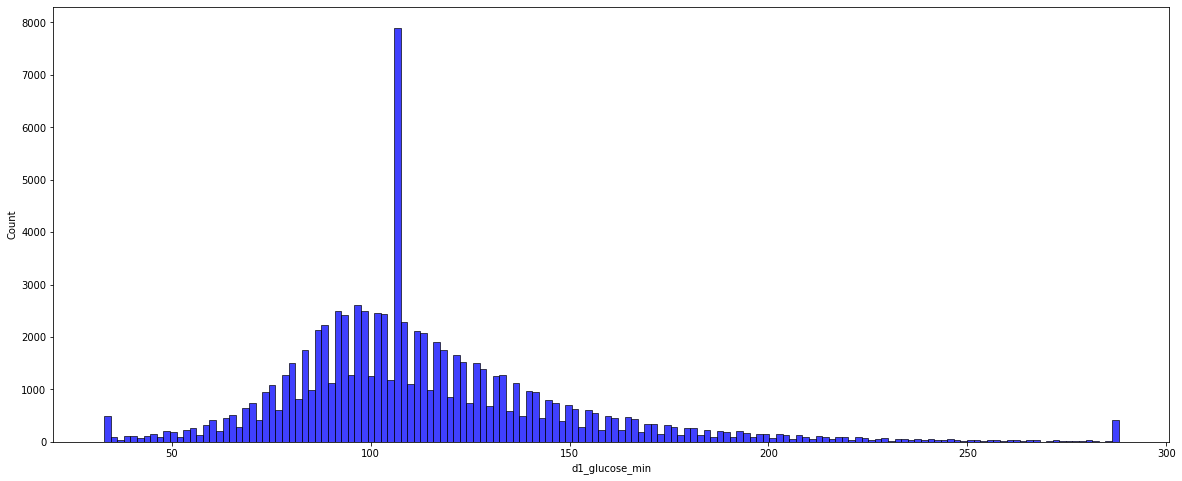

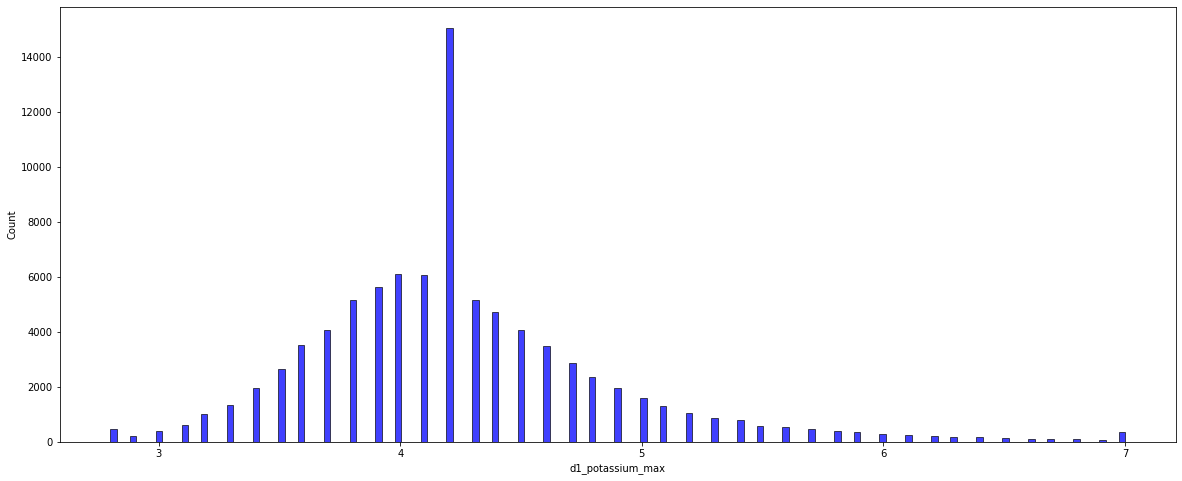

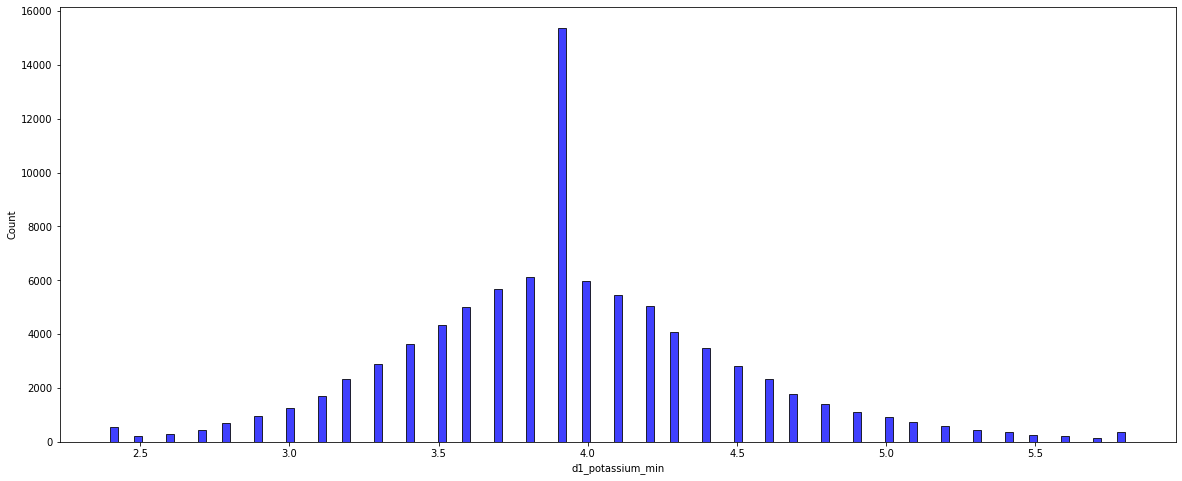

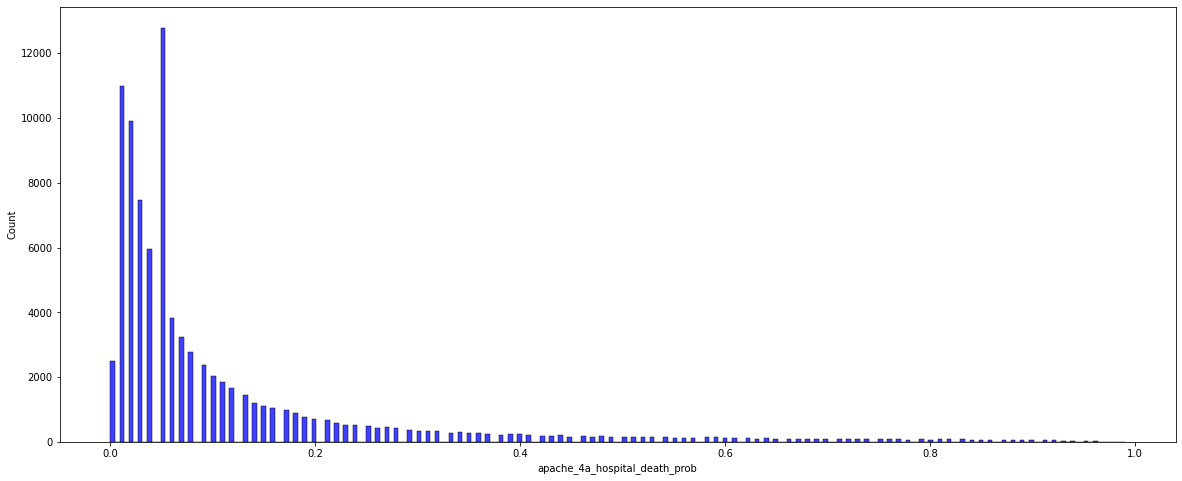

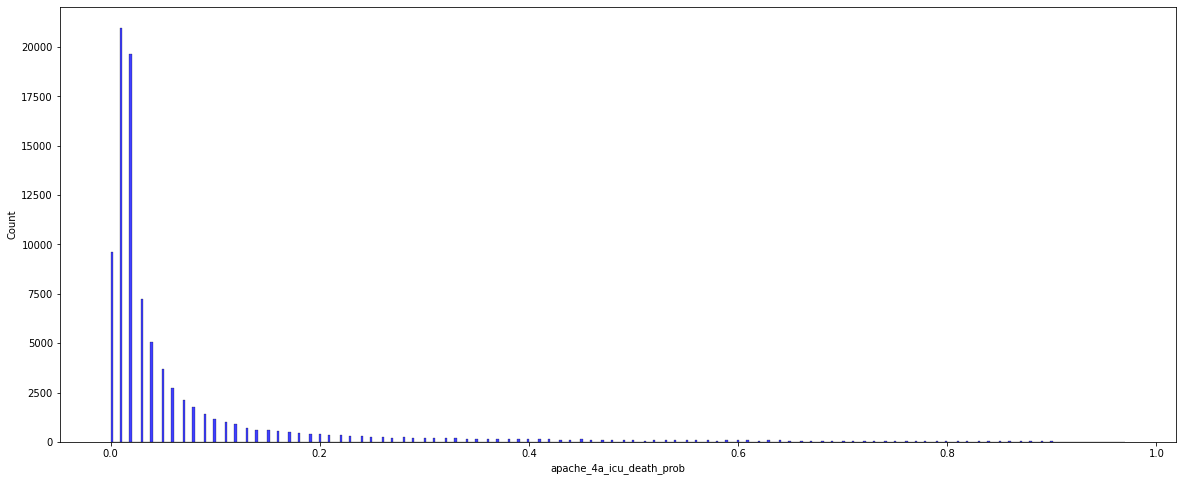

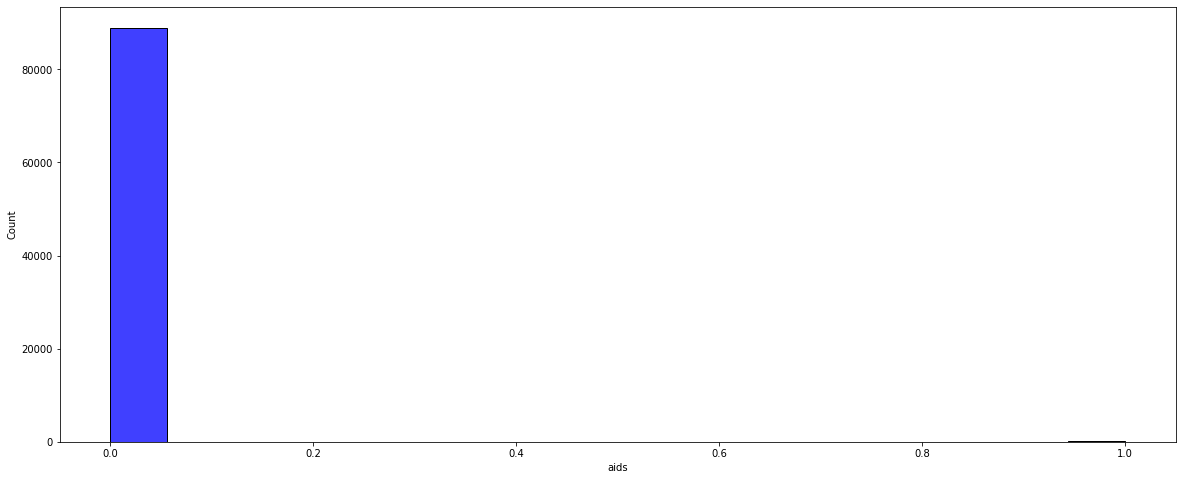

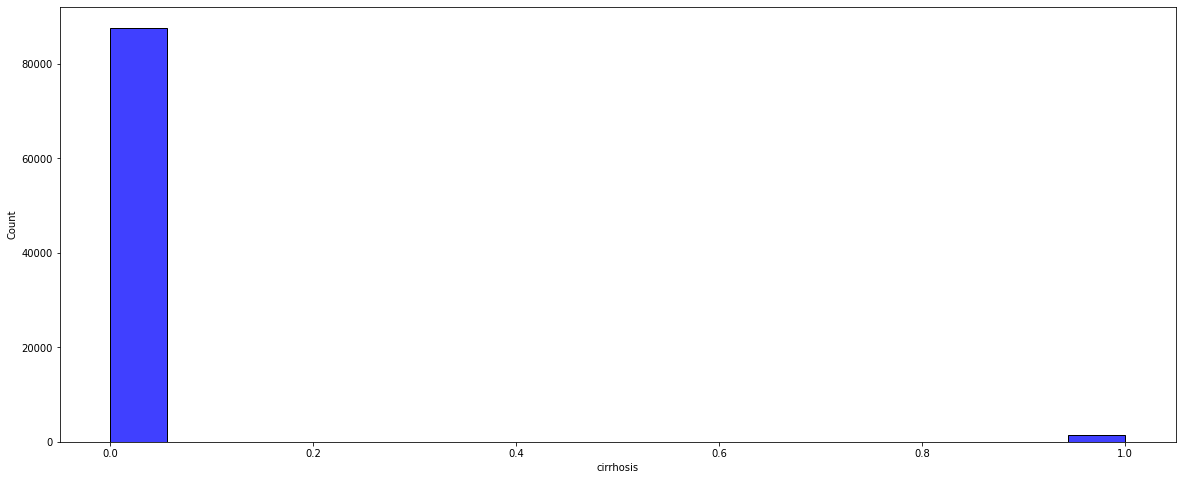

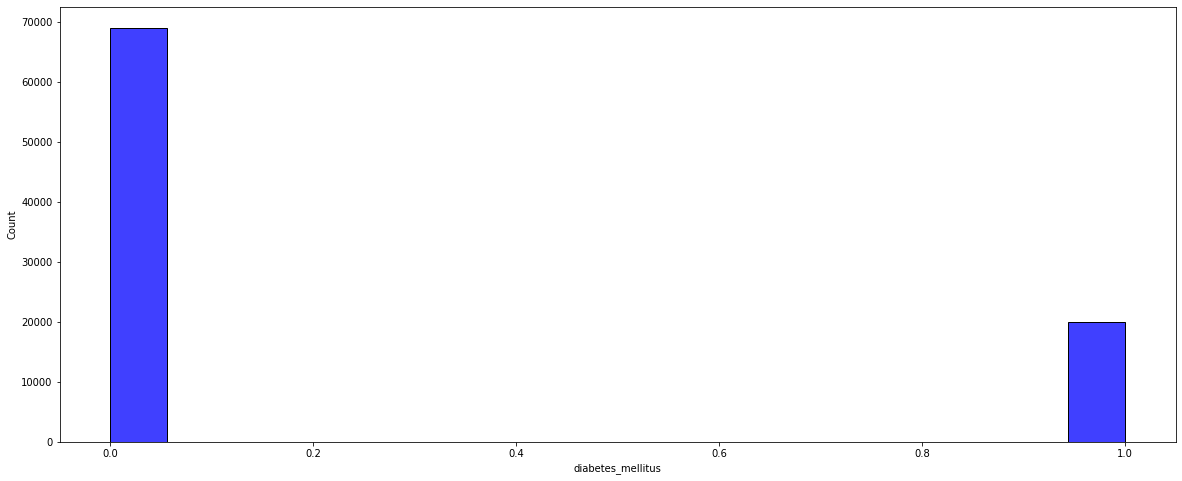

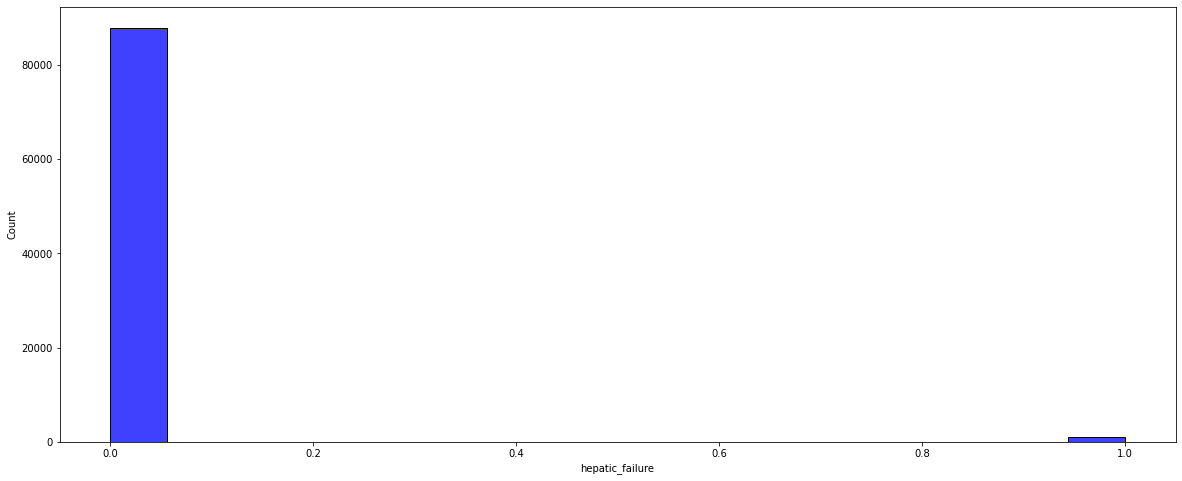

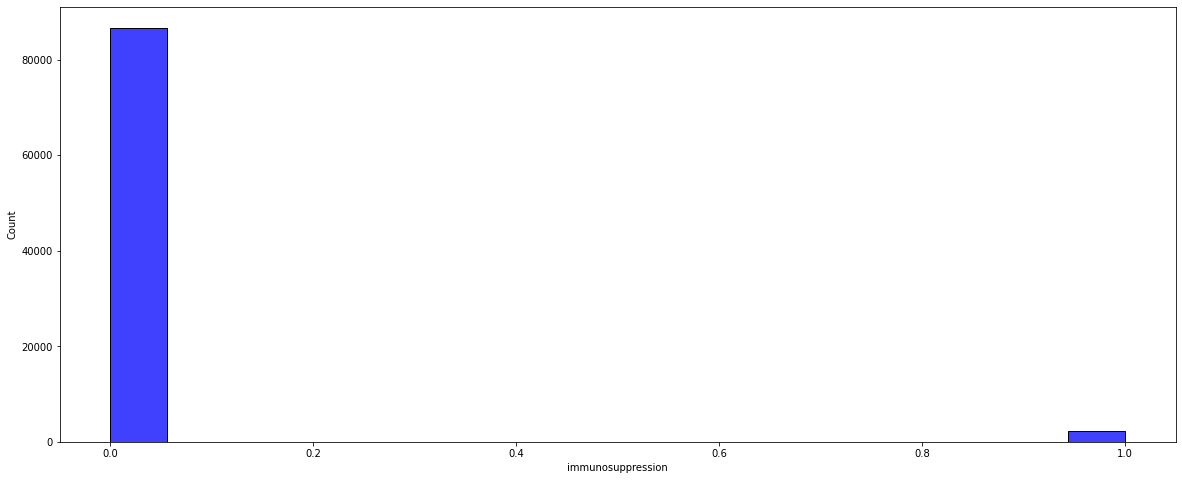

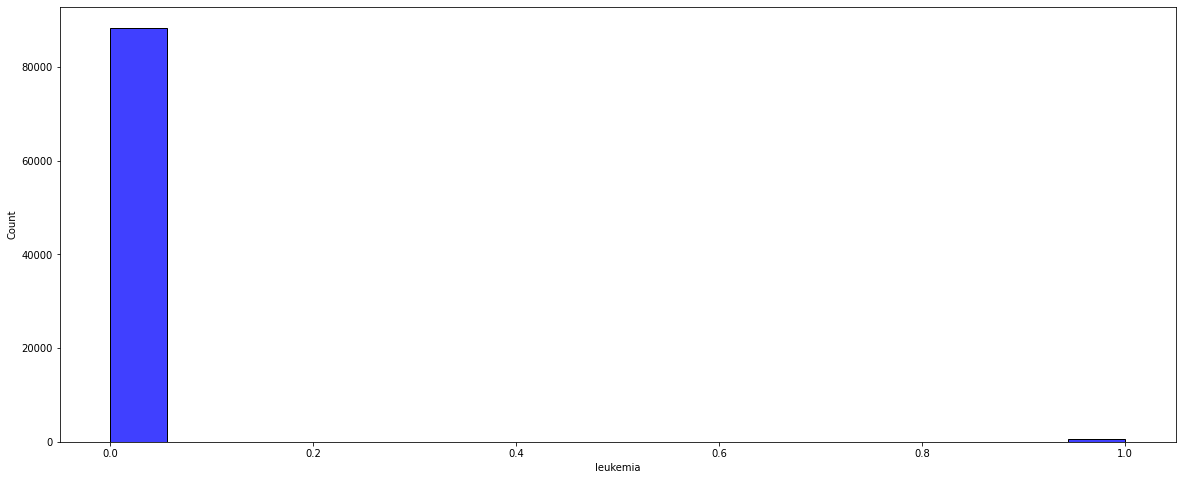

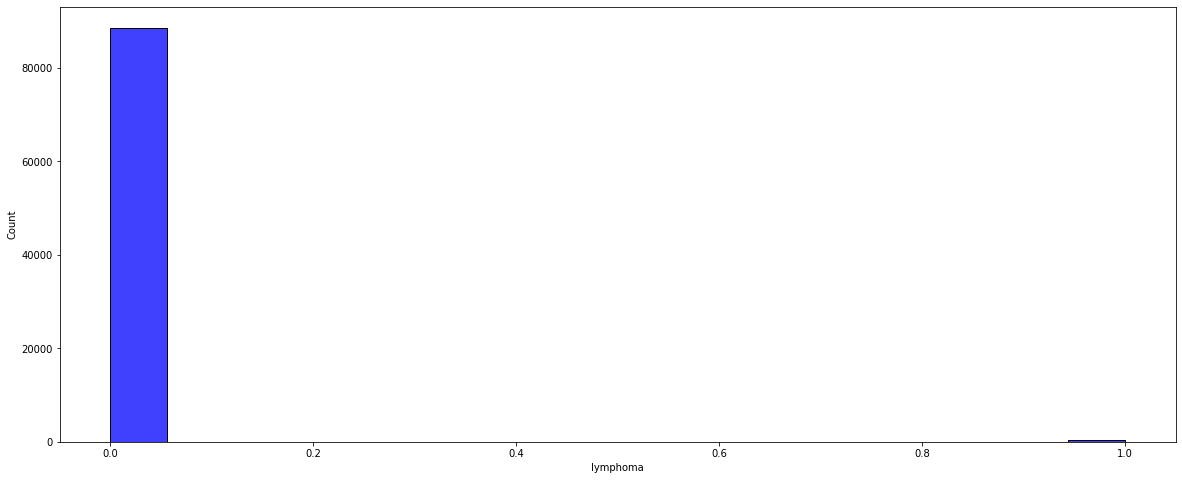

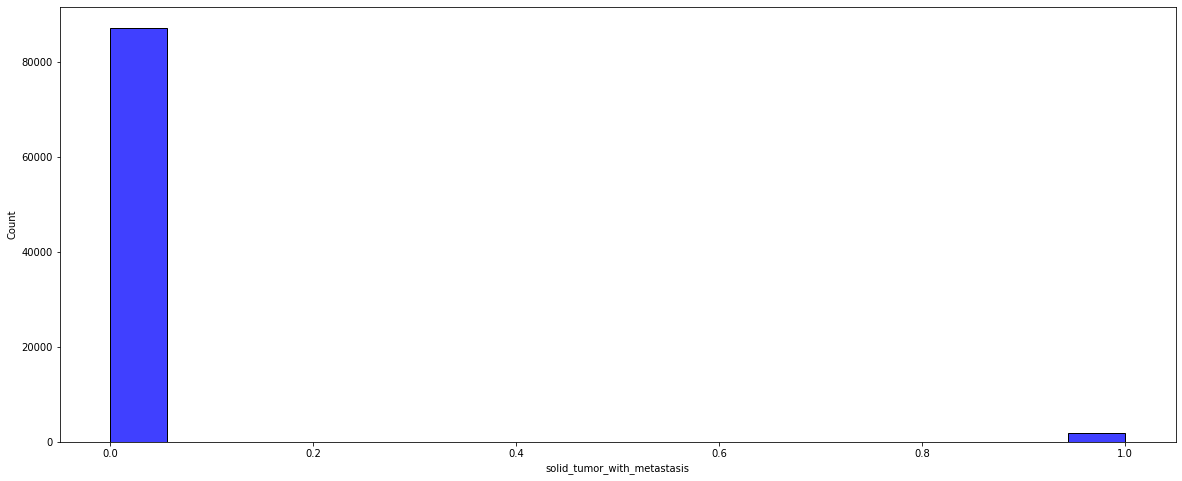

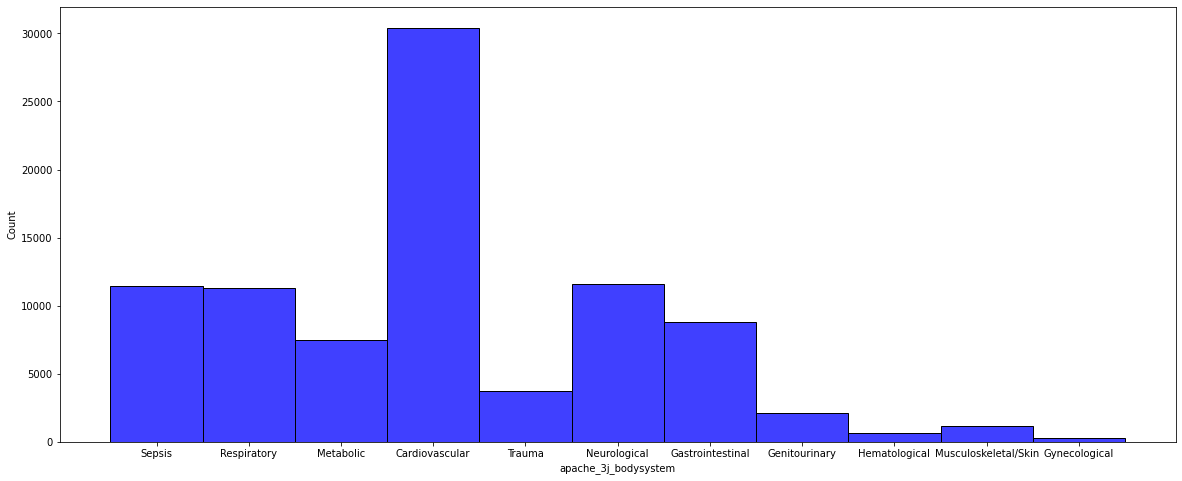

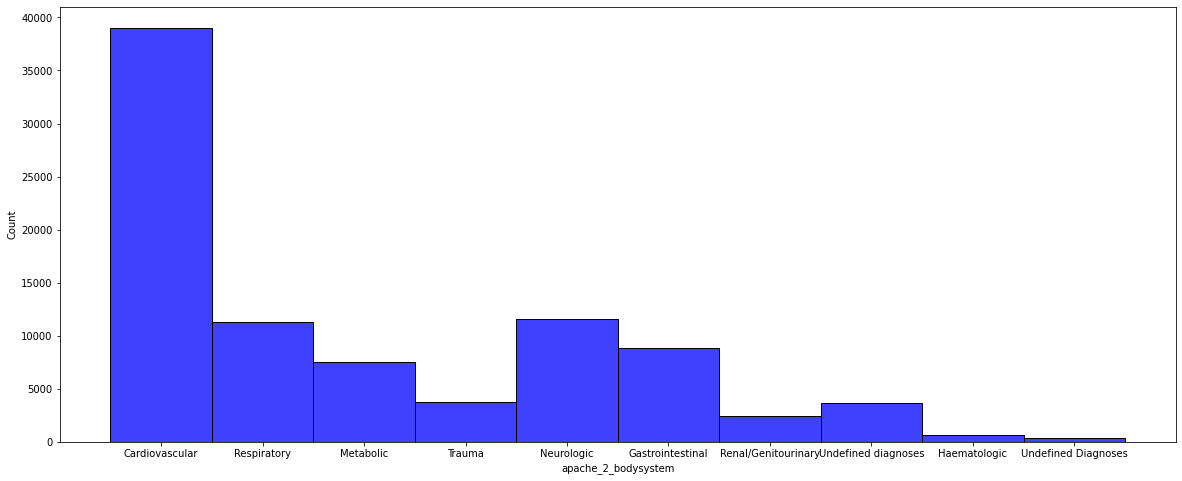

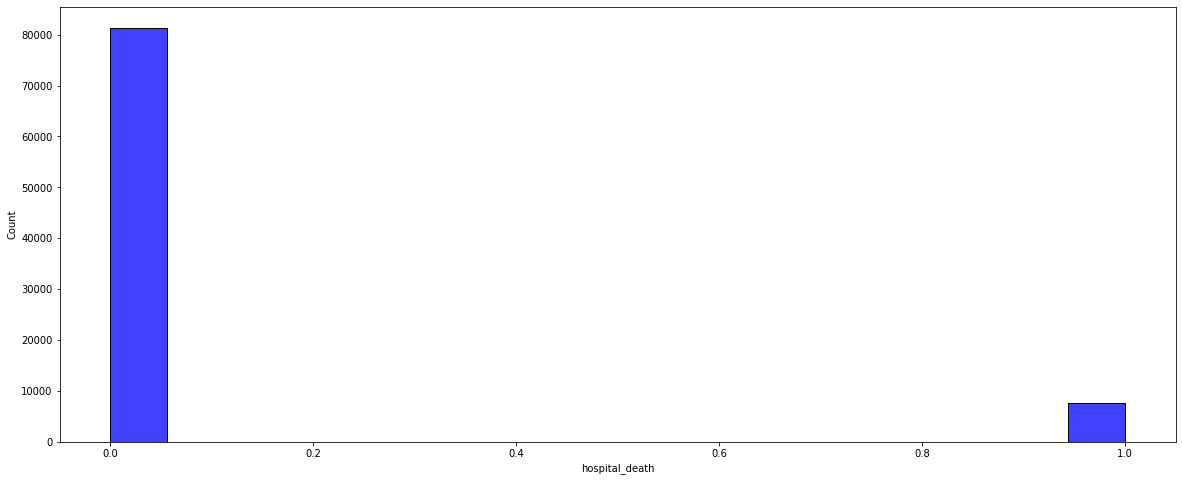

In [8]:
#Plotting the counts
import matplotlib.pyplot as plt
import seaborn as sns 
for col in df.columns:
    plt.figure(figsize=(20,8))
    sns.histplot(df[col], color="blue")
    plt.show()

c:\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


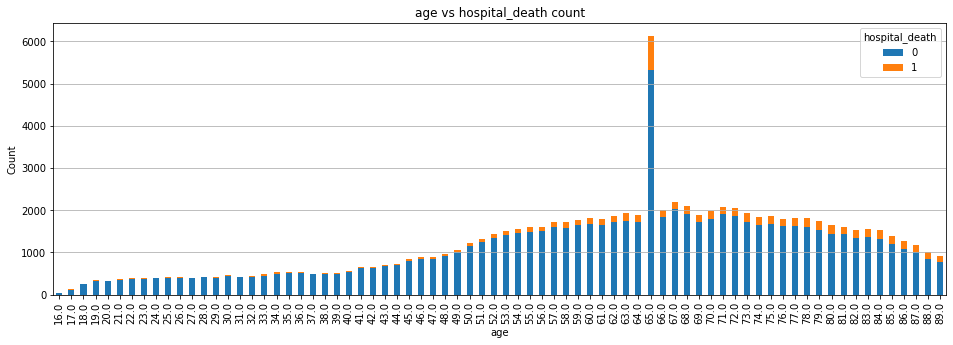

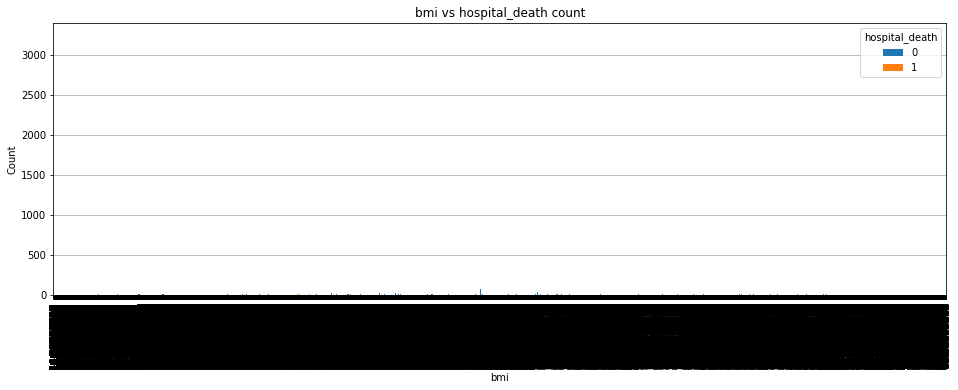

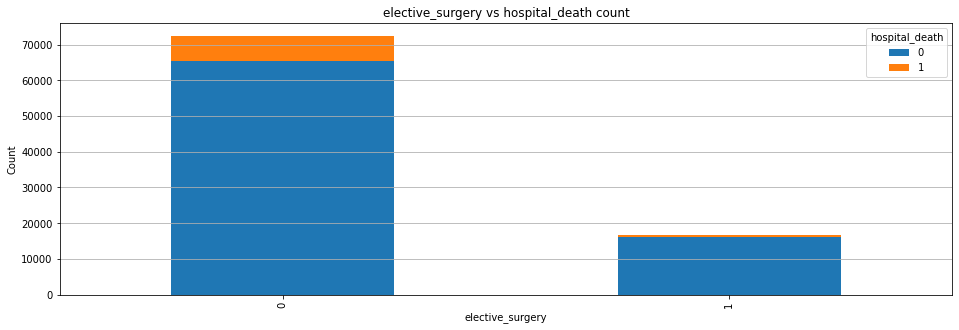

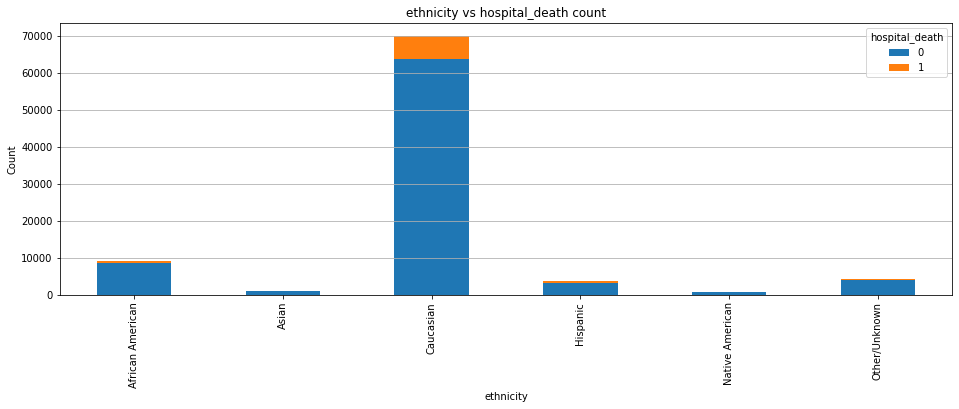

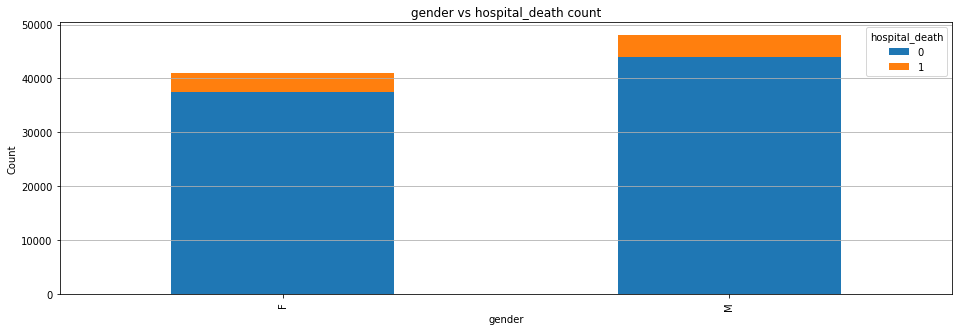

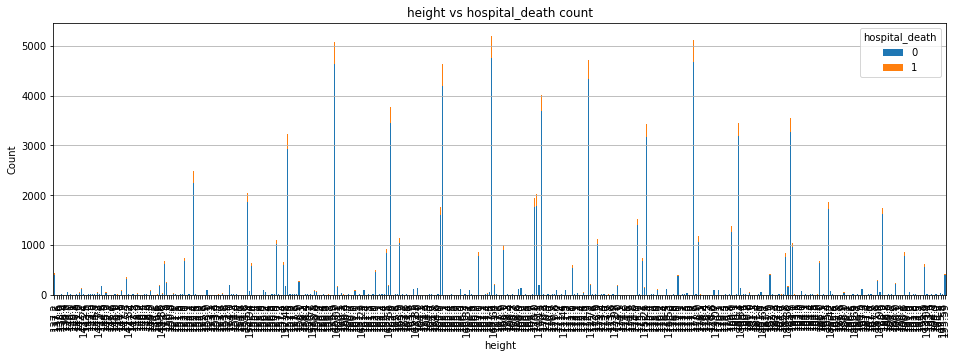

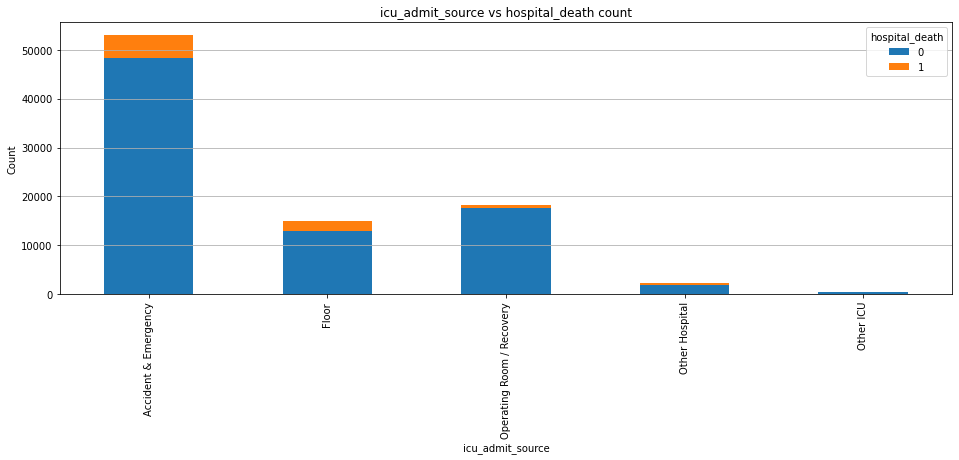

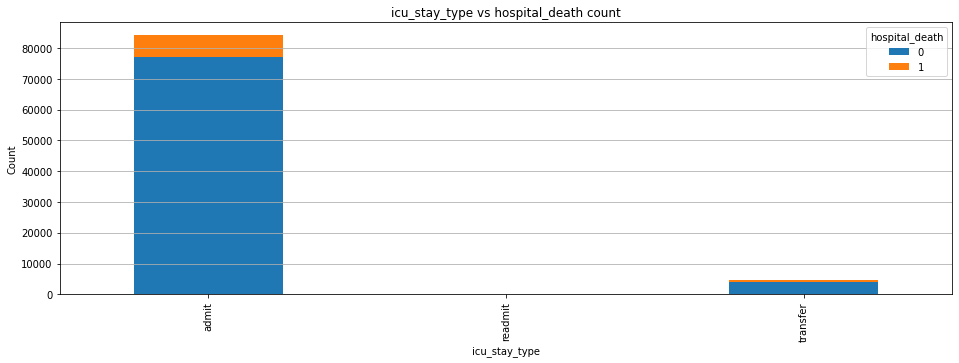

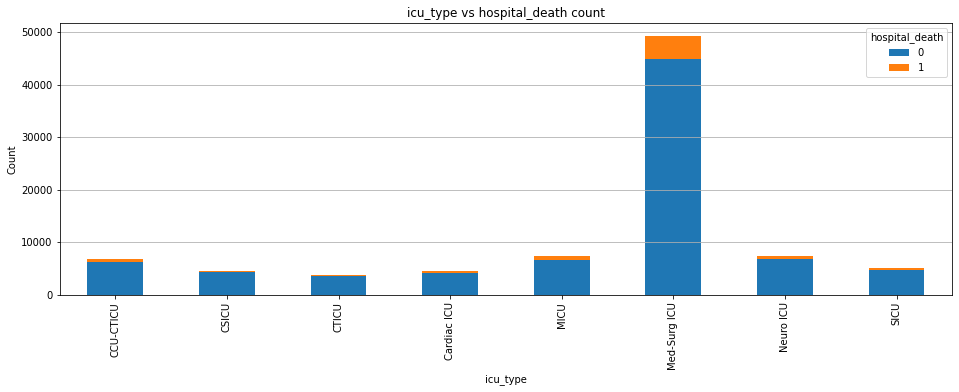

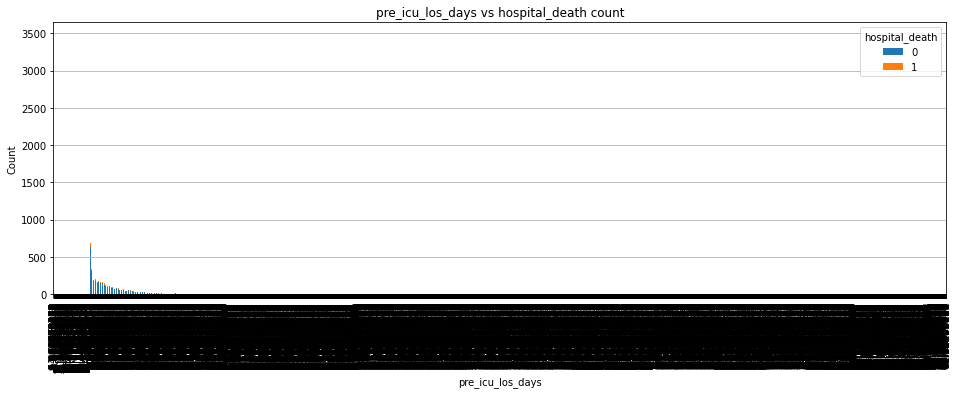

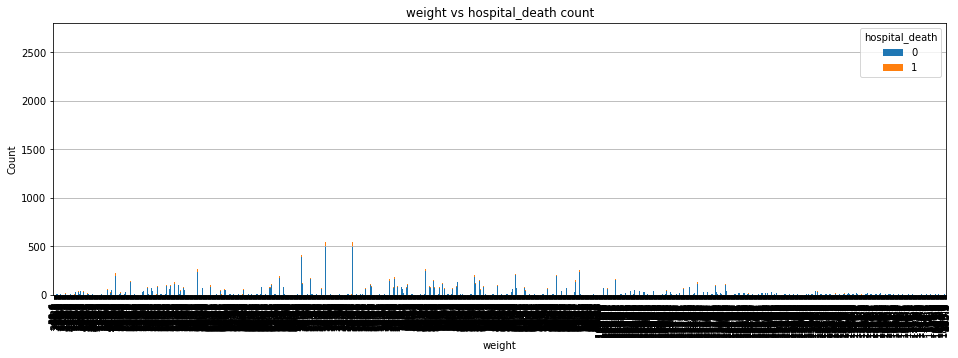

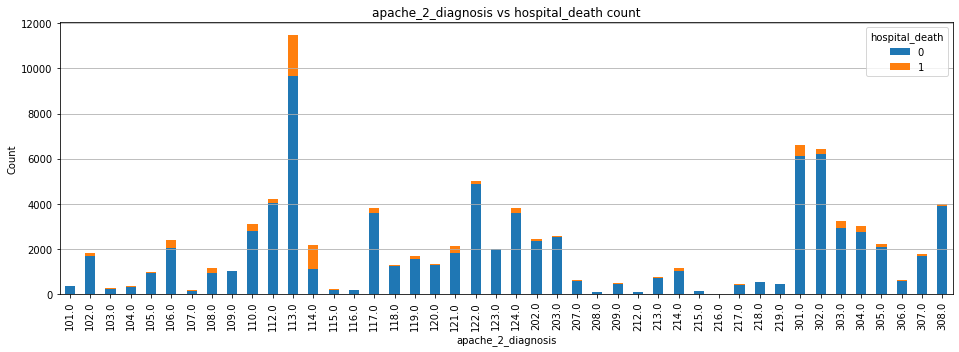

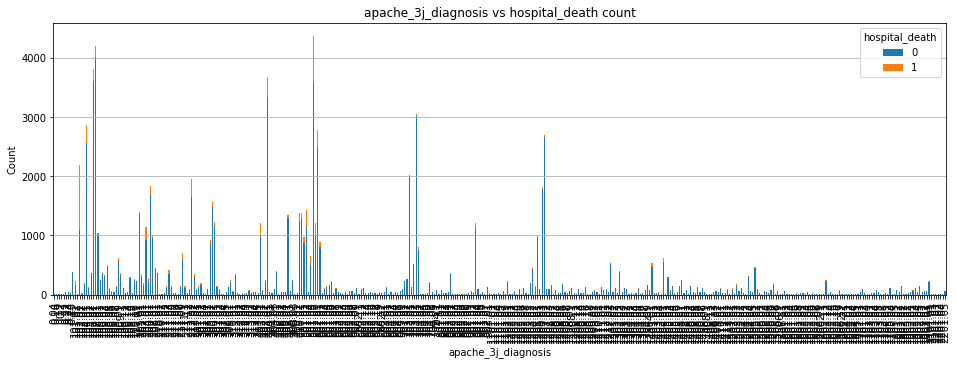

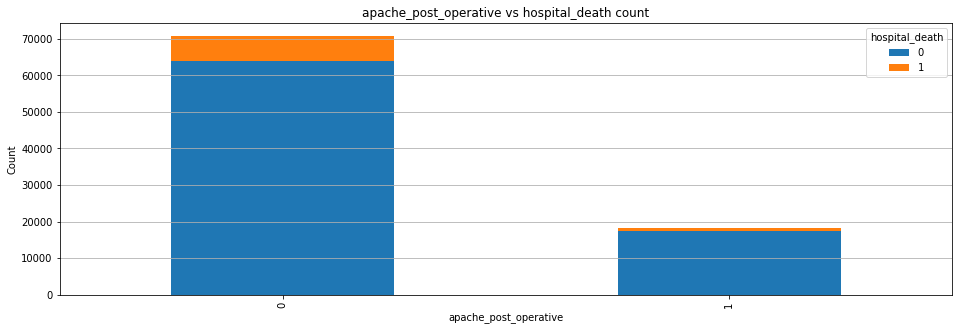

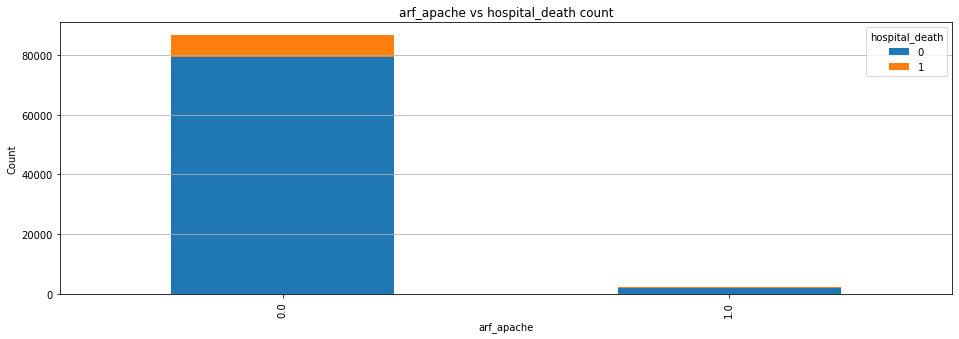

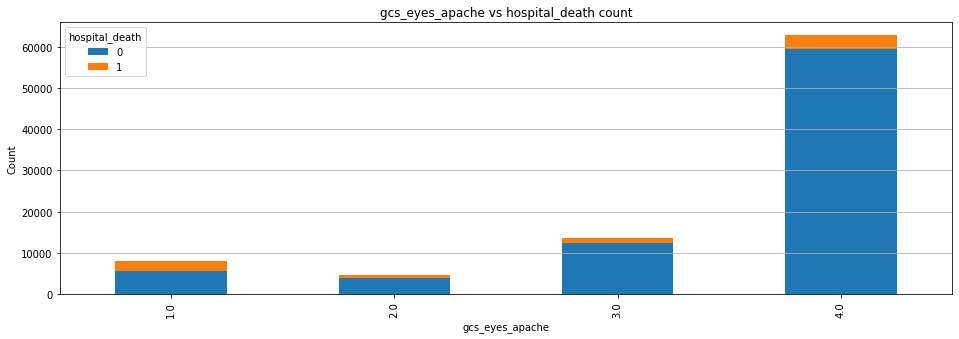

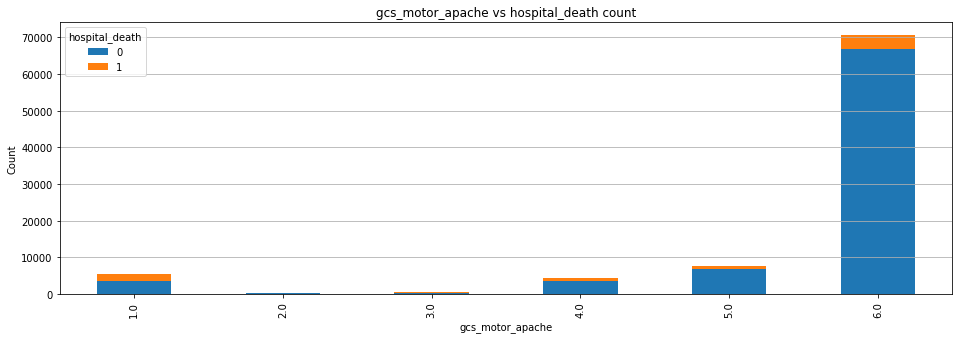

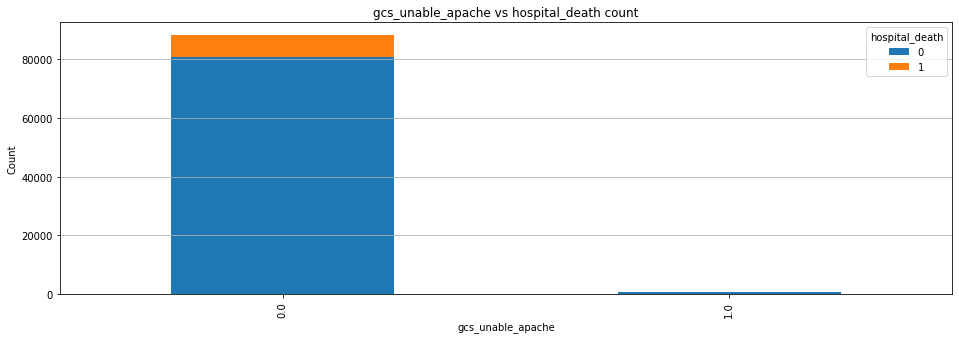

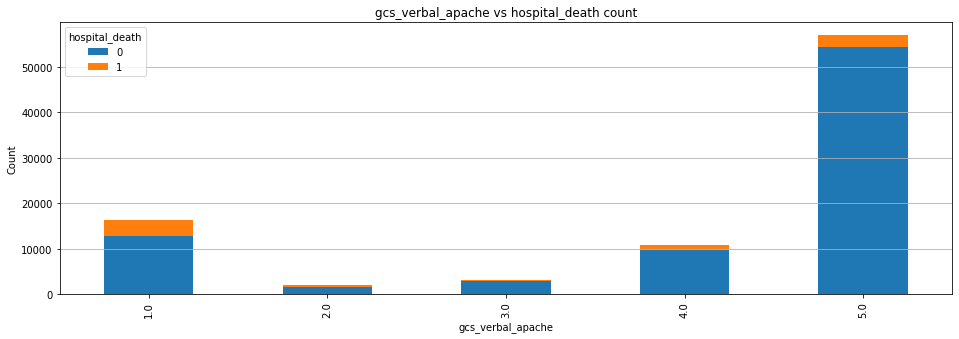

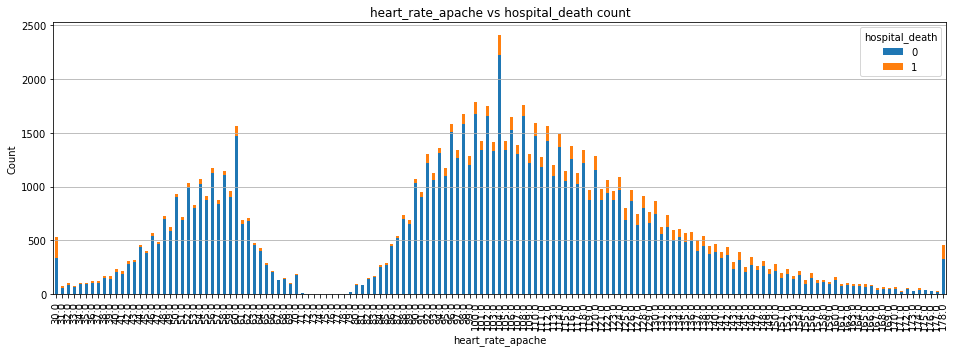

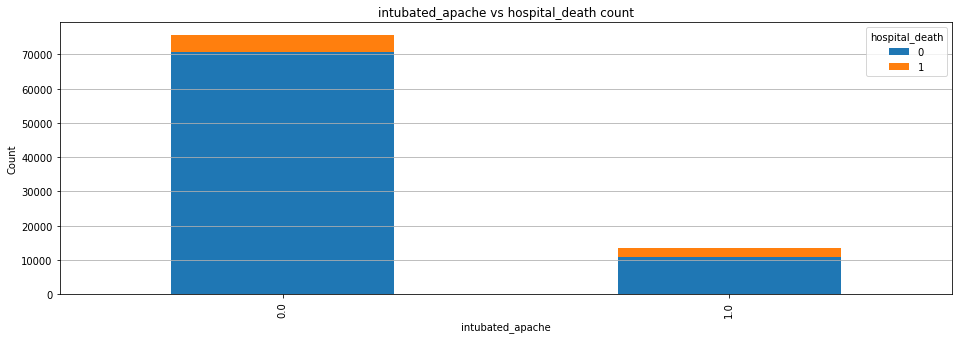

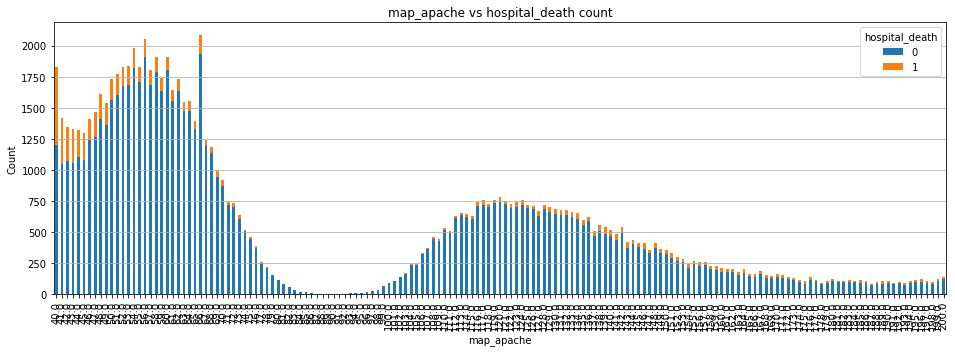

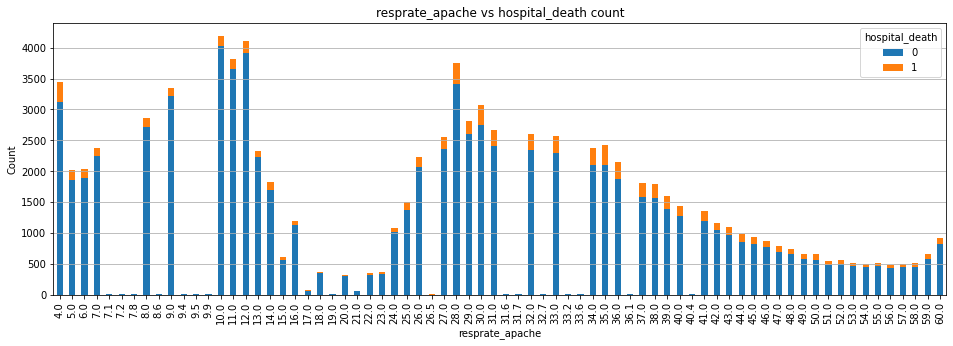

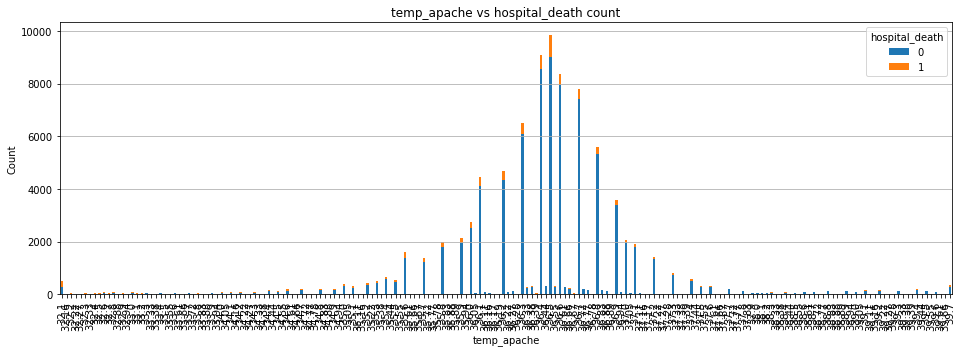

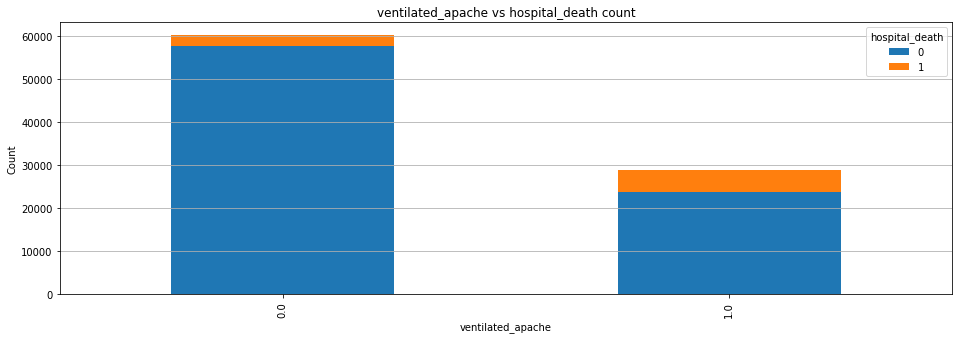

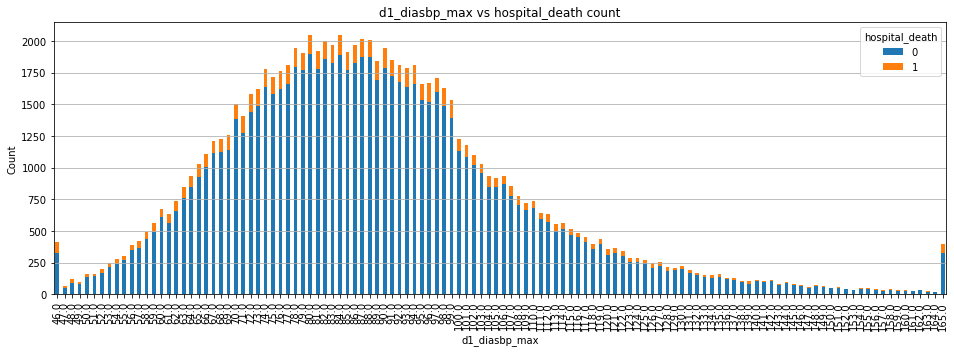

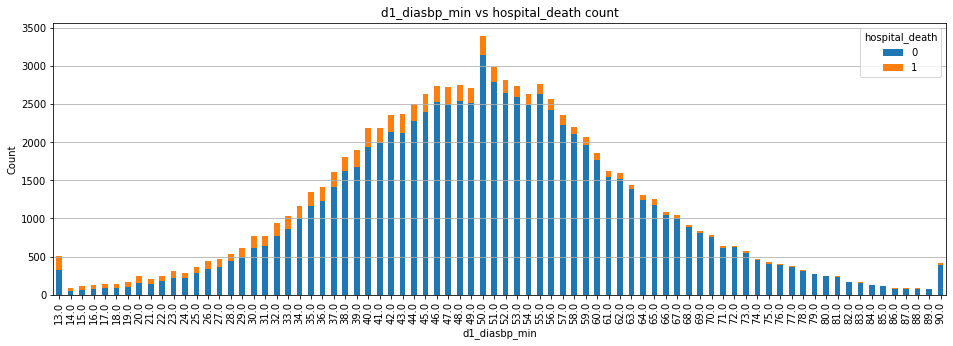

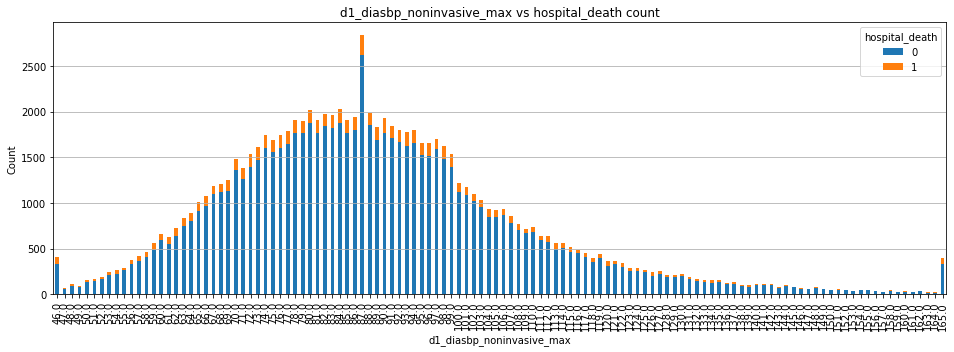

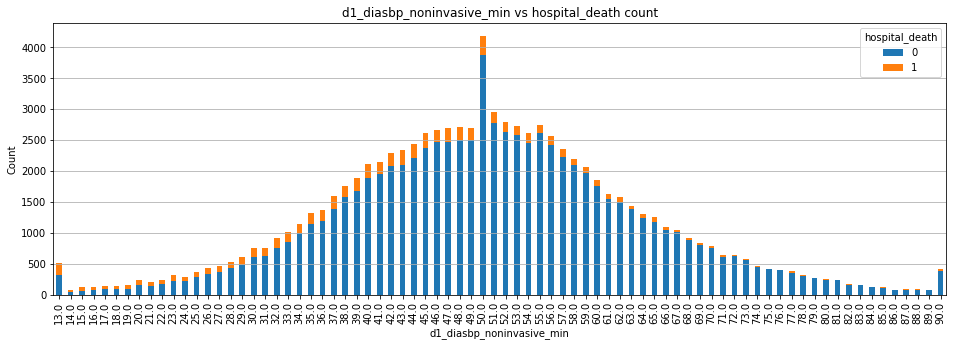

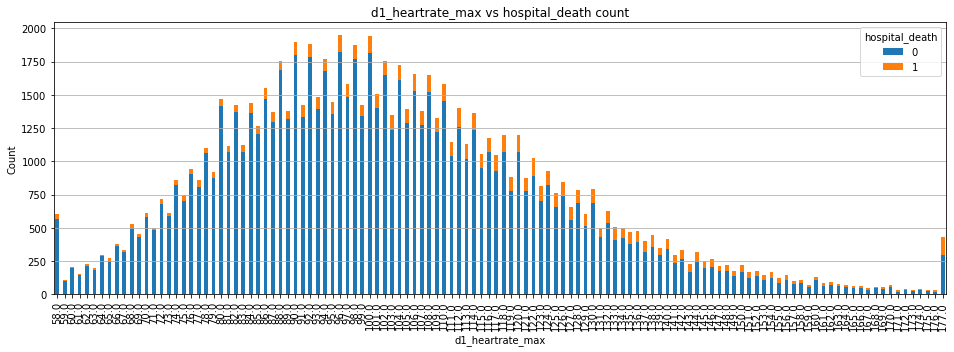

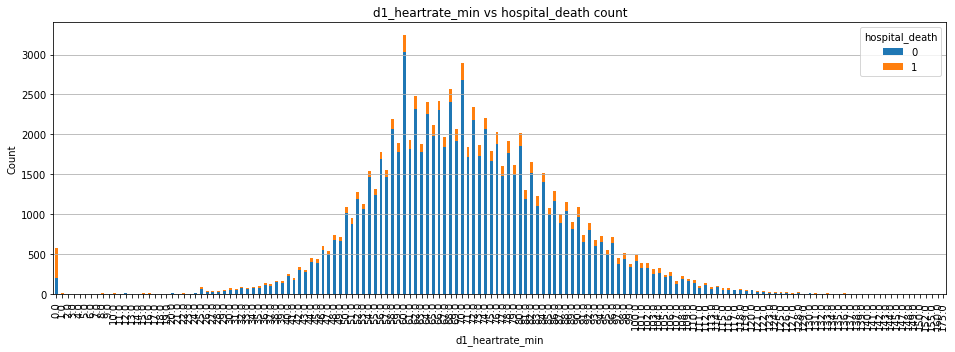

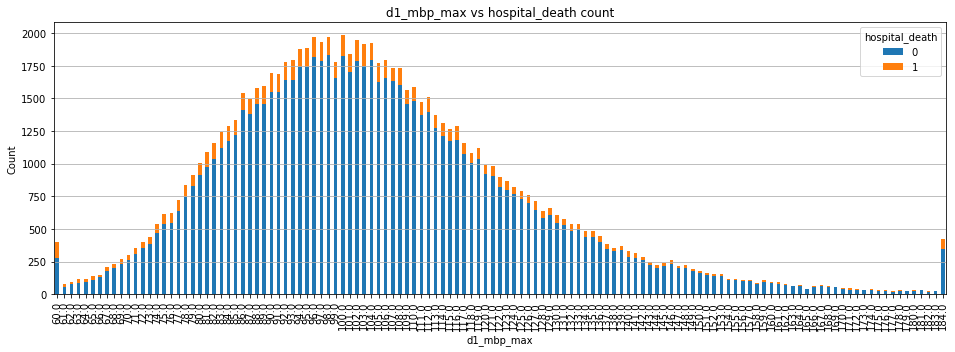

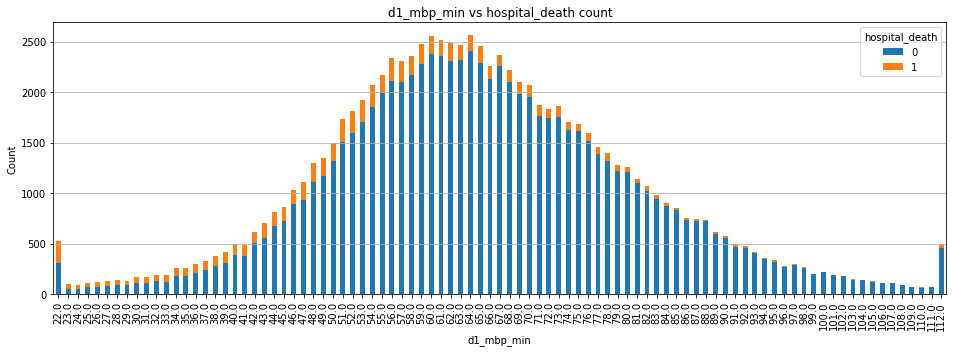

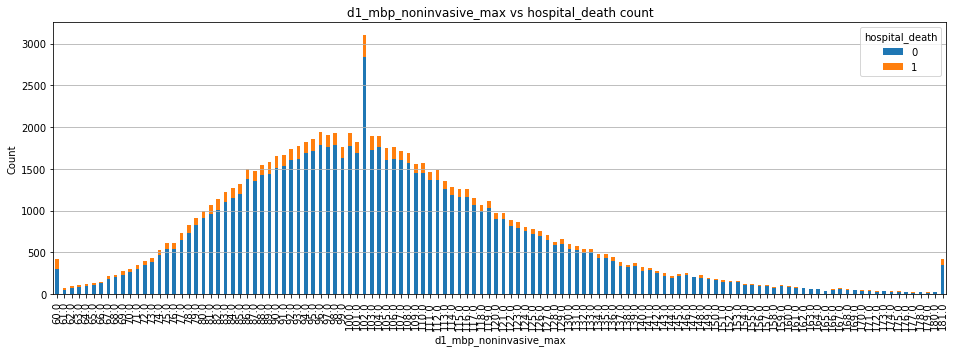

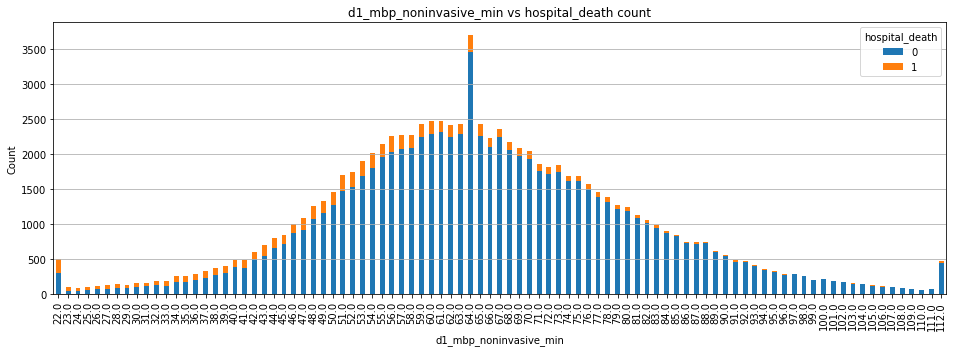

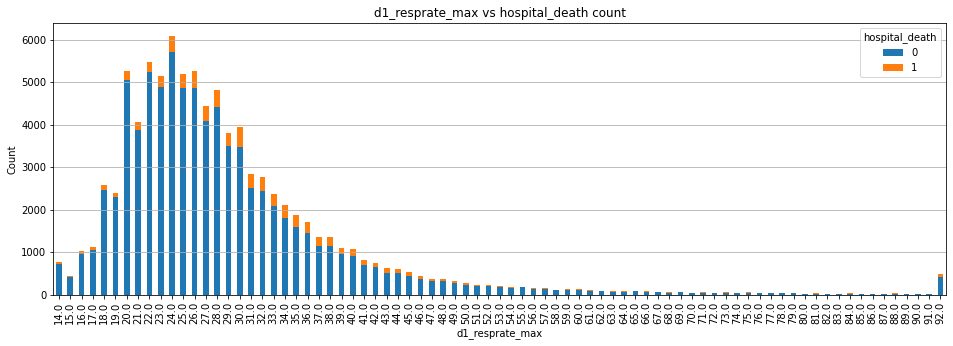

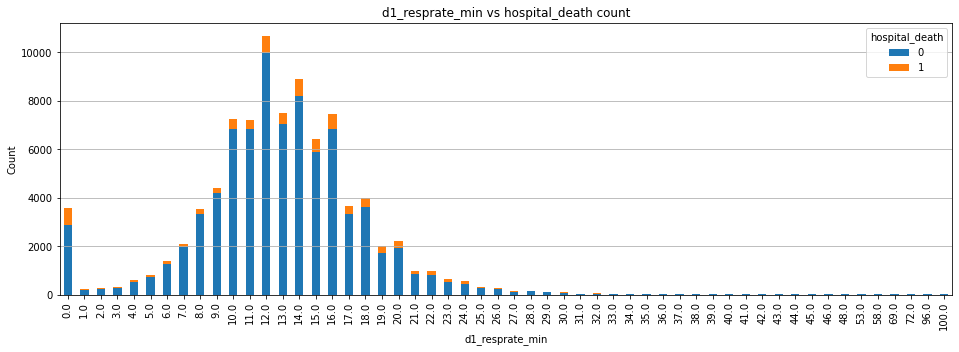

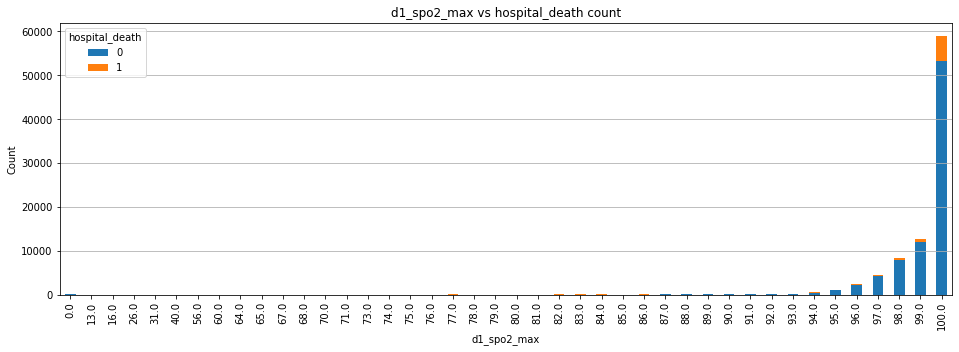

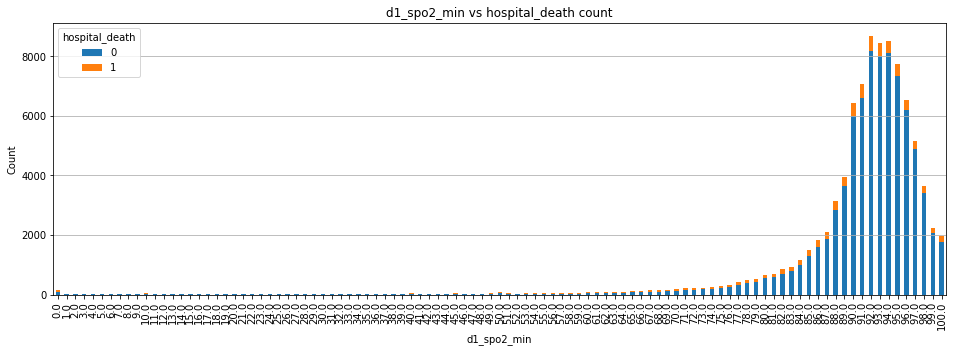

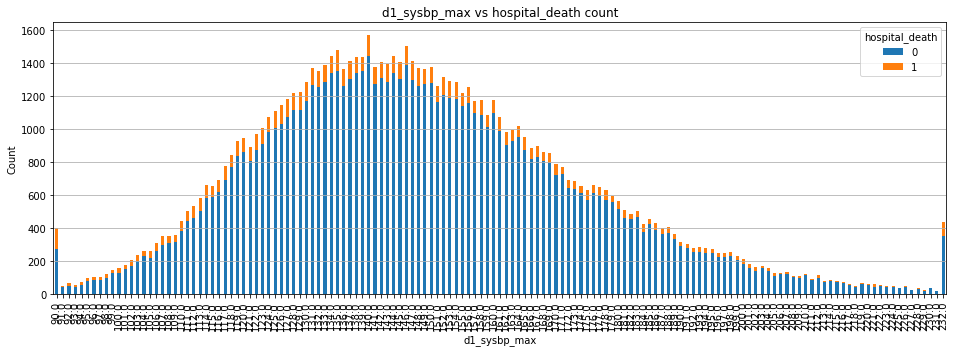

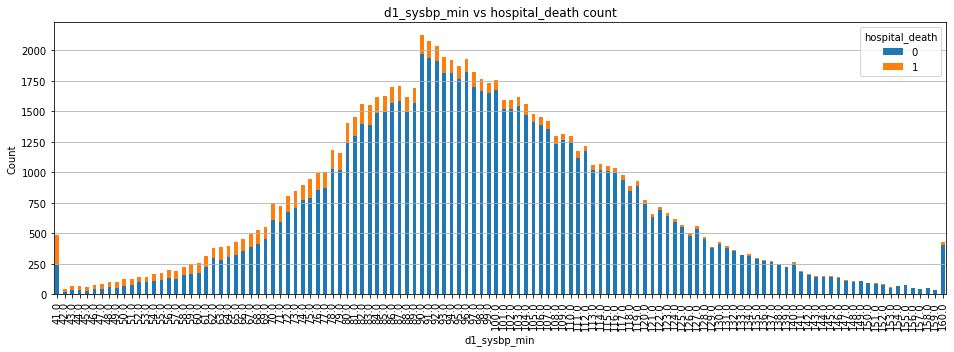

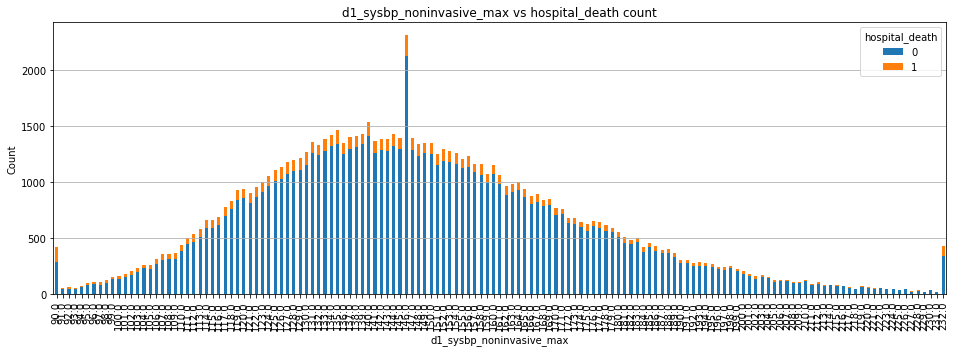

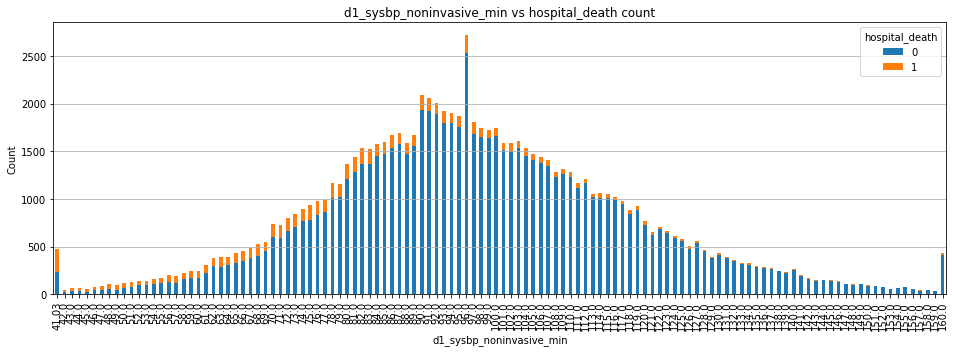

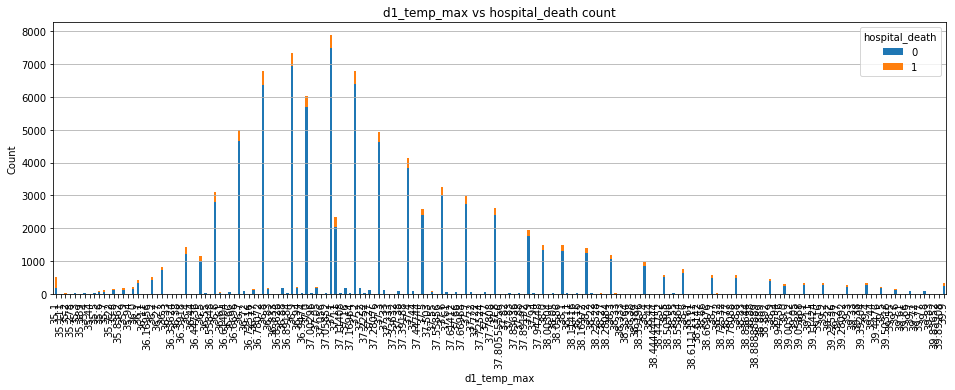

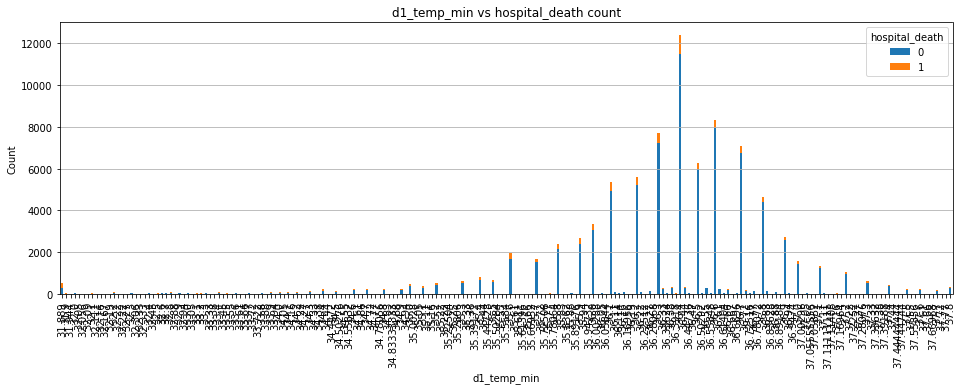

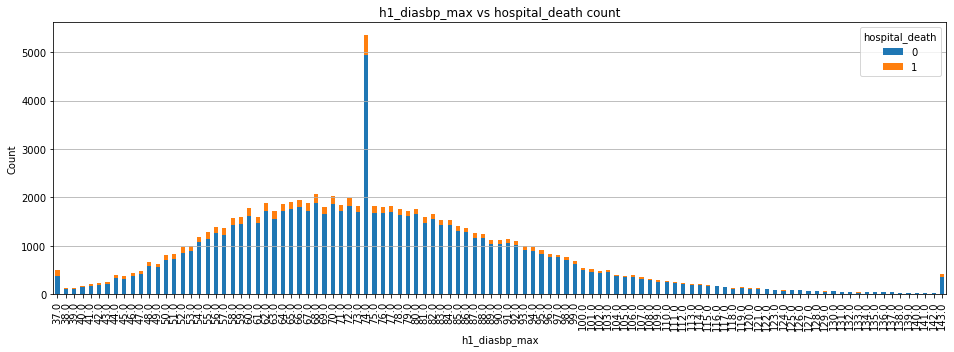

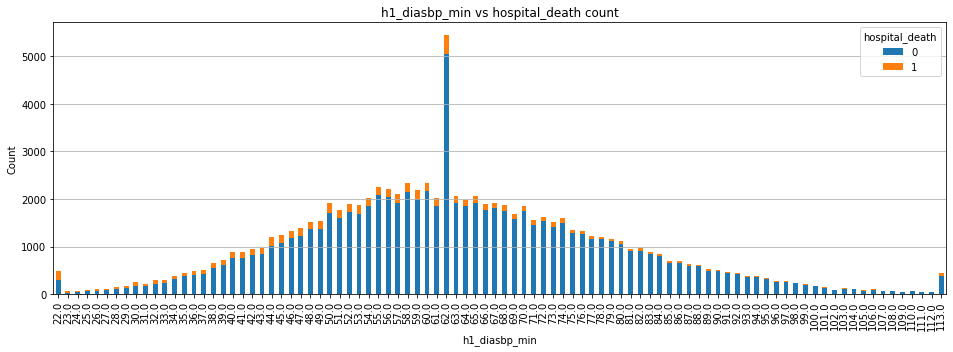

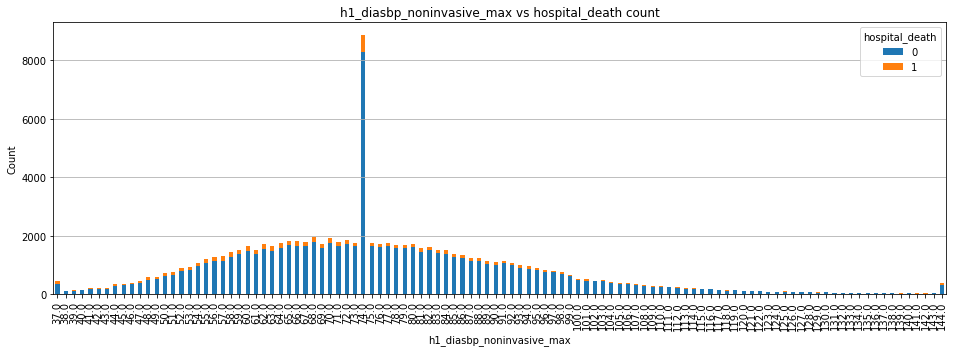

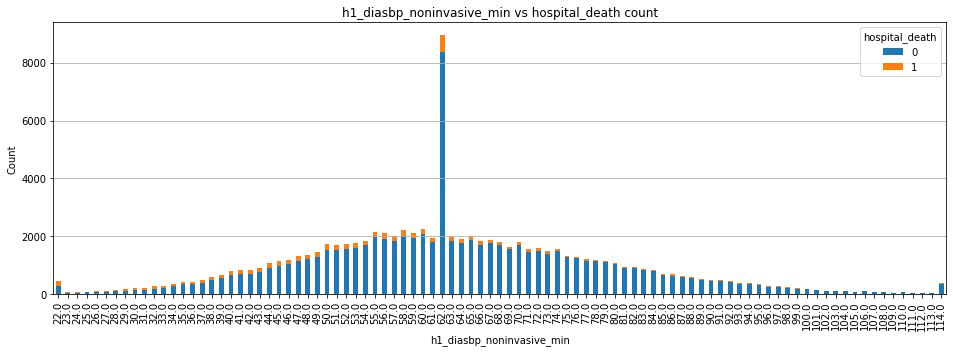

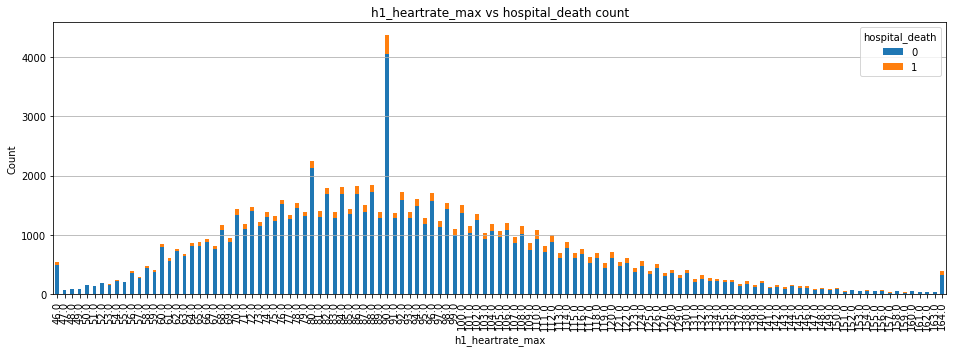

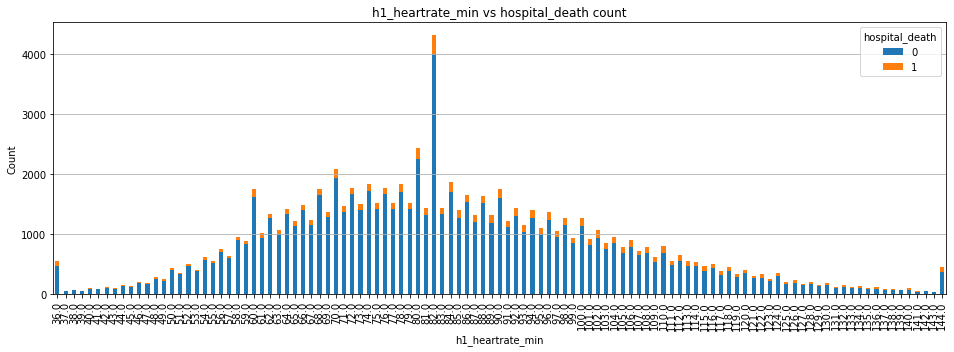

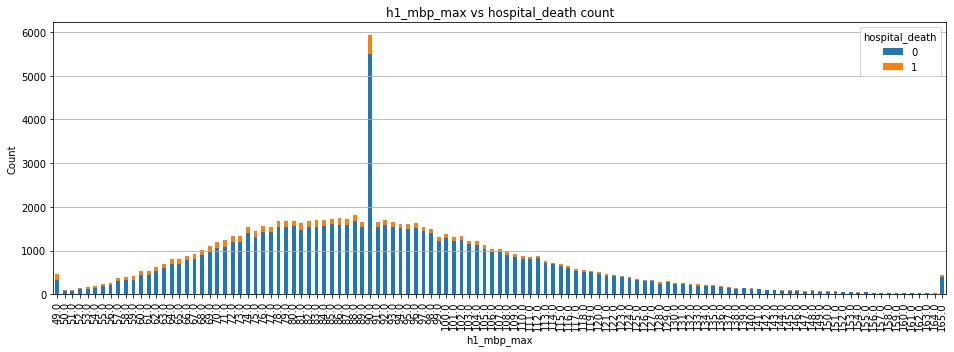

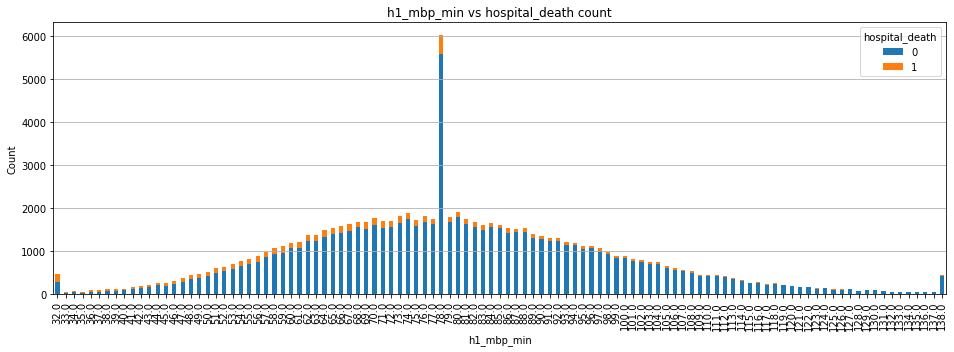

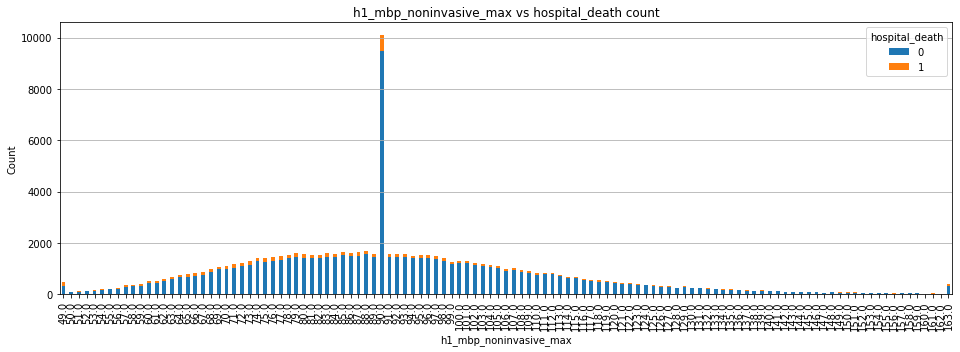

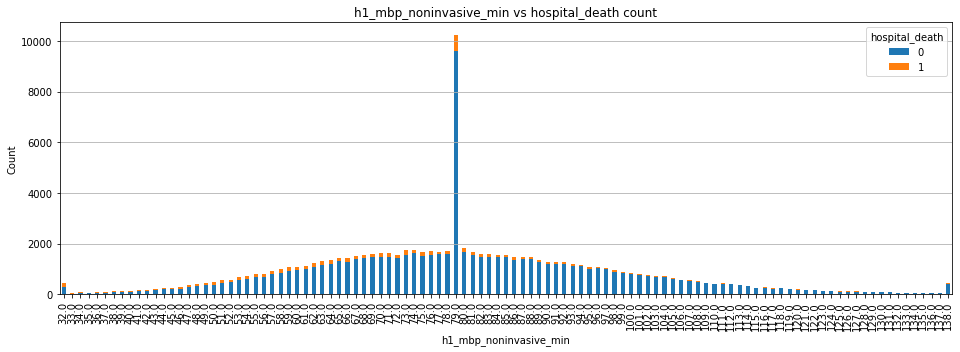

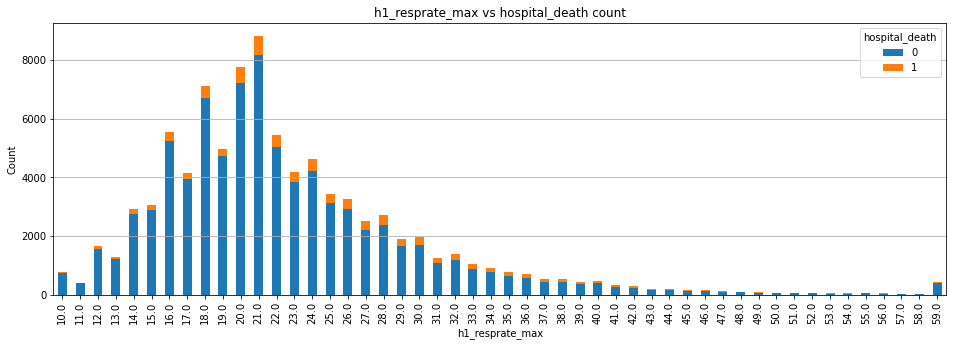

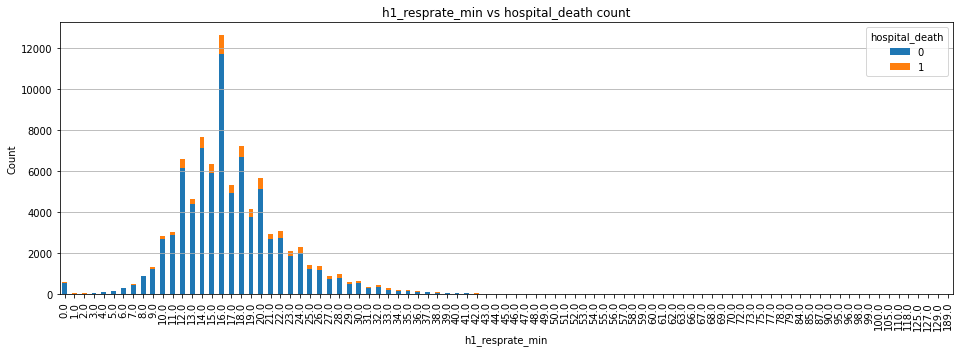

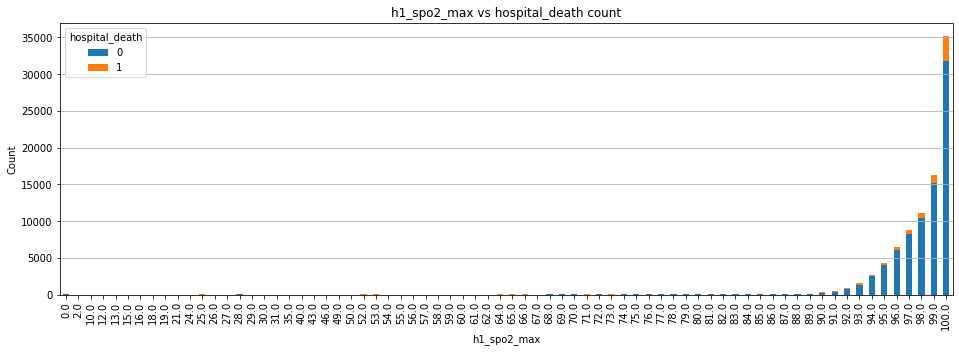

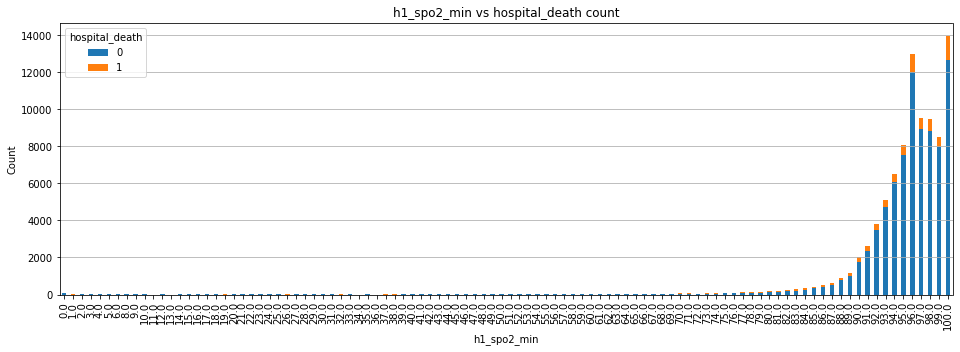

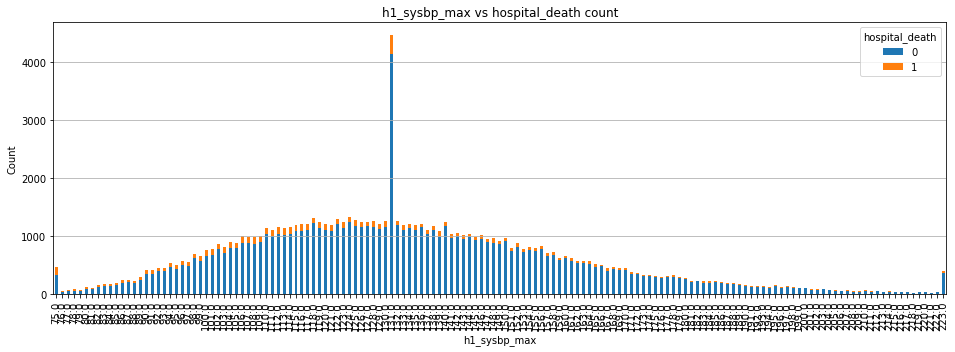

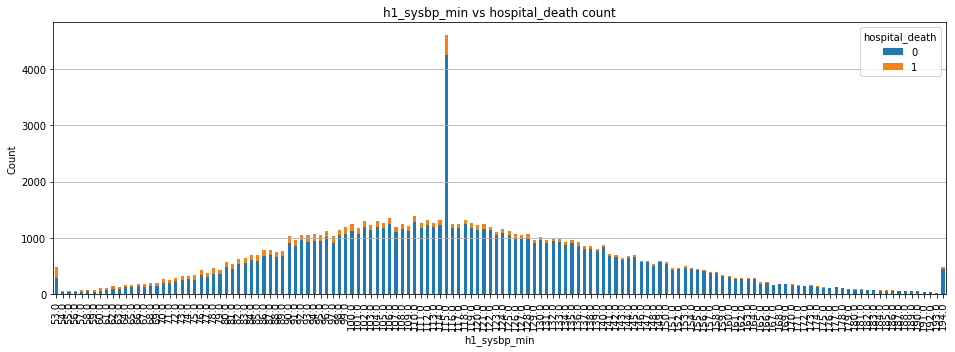

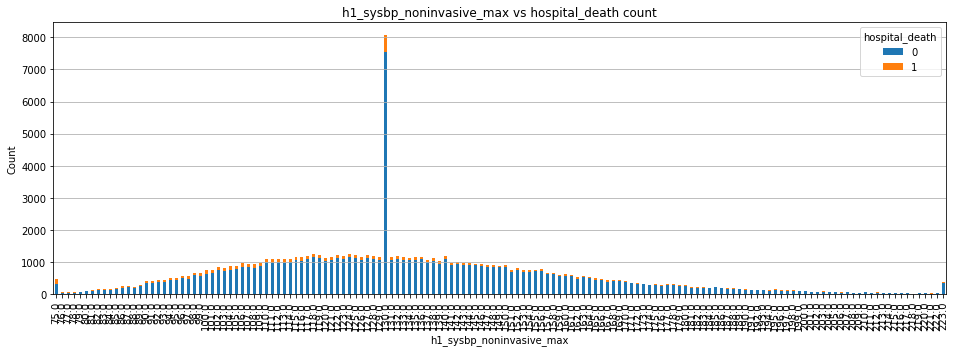

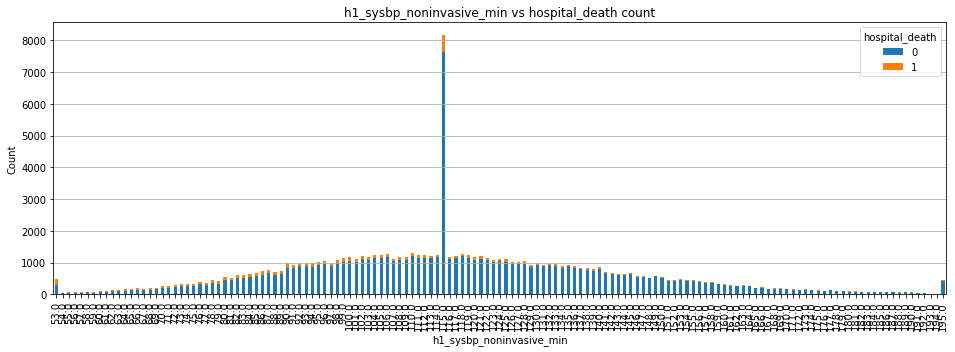

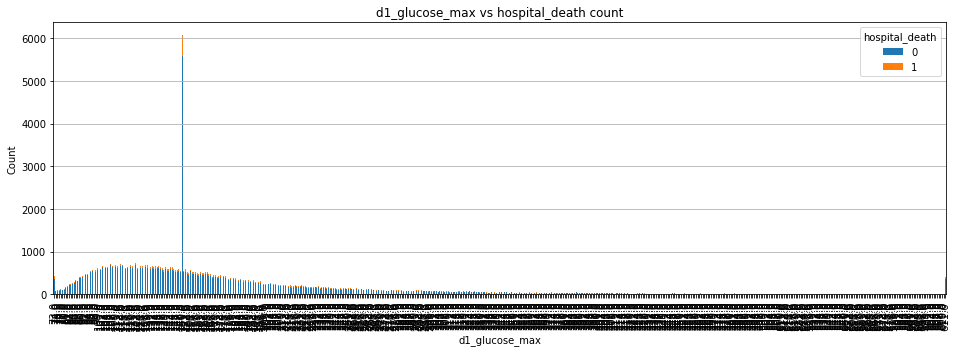

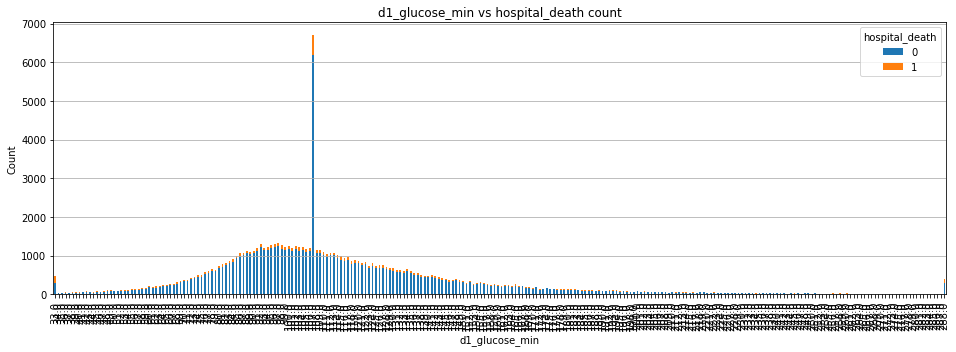

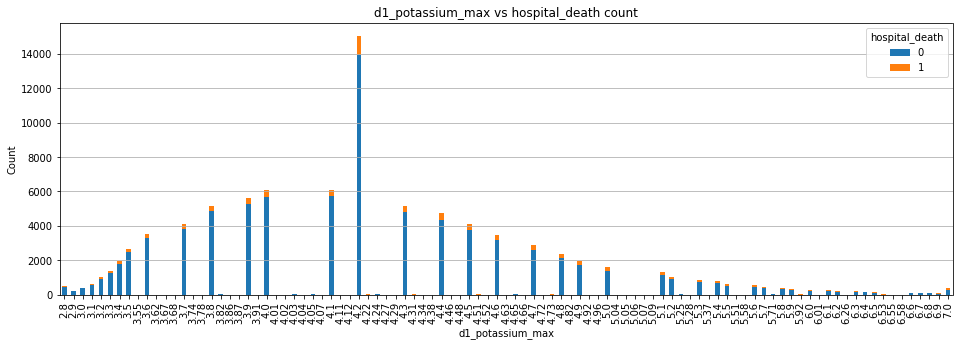

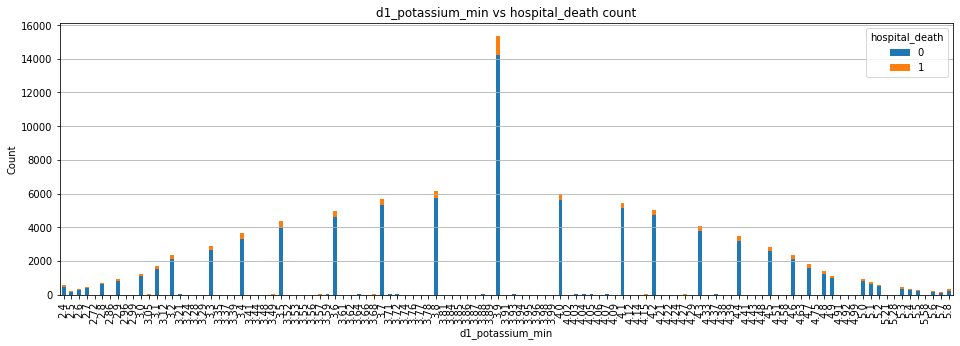

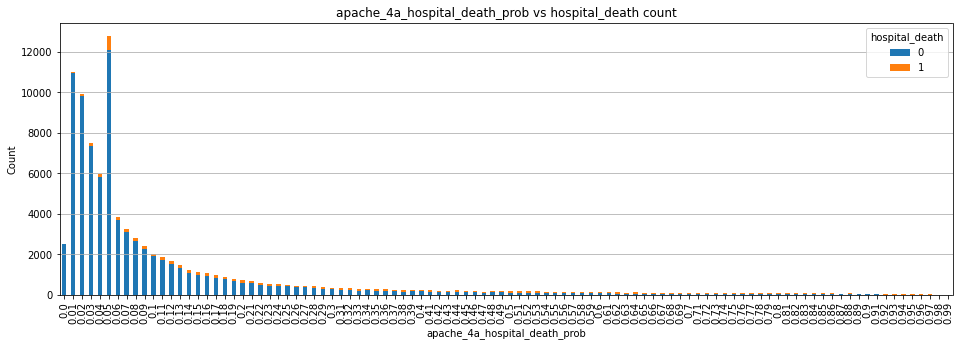

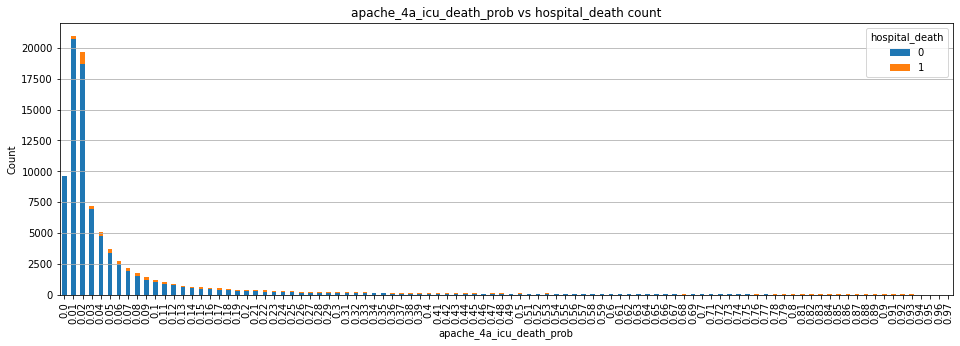

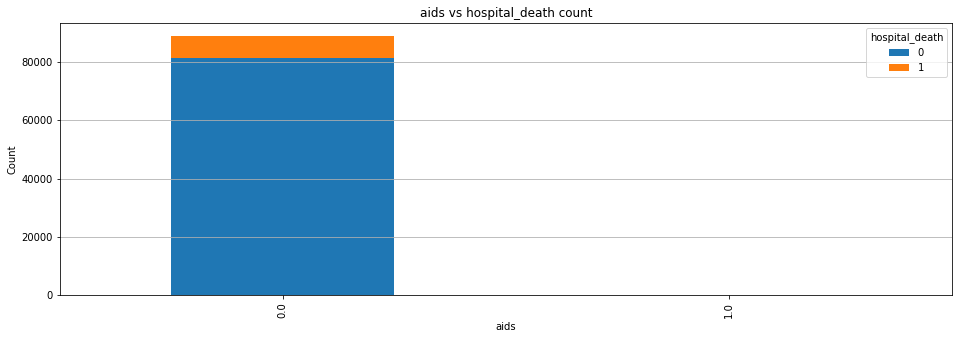

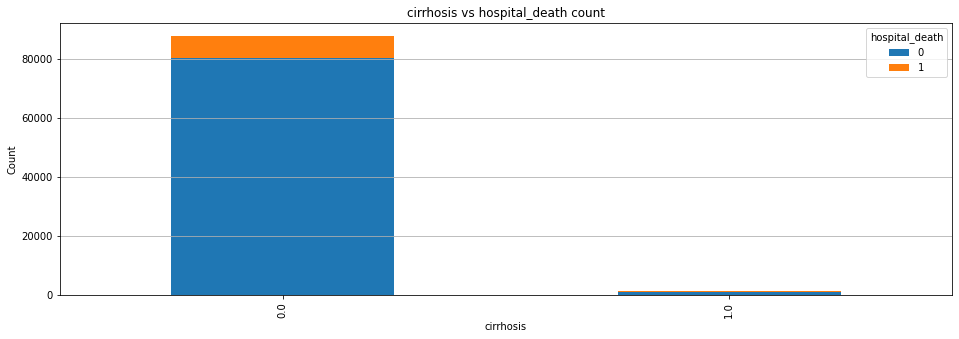

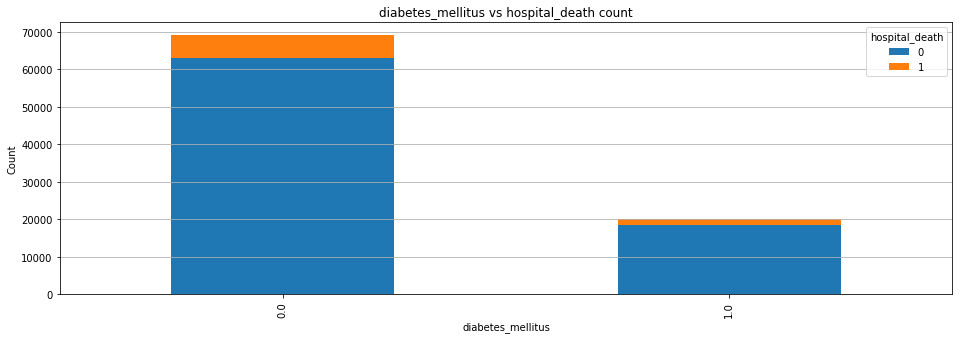

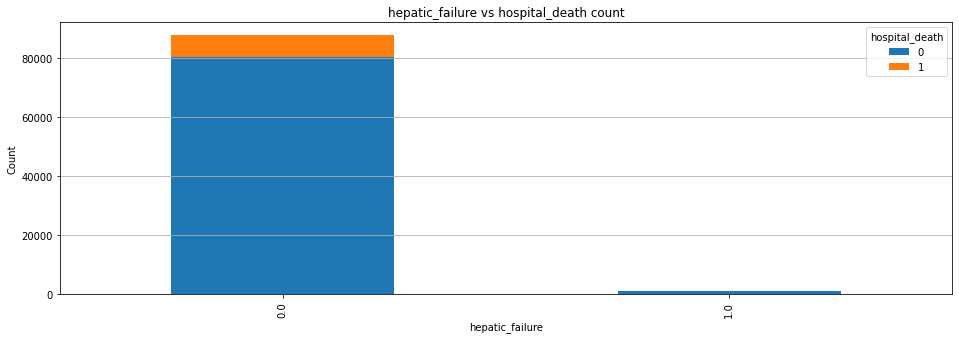

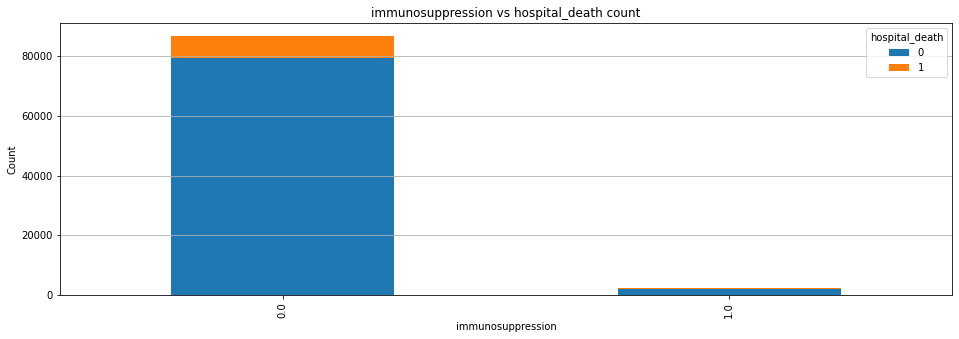

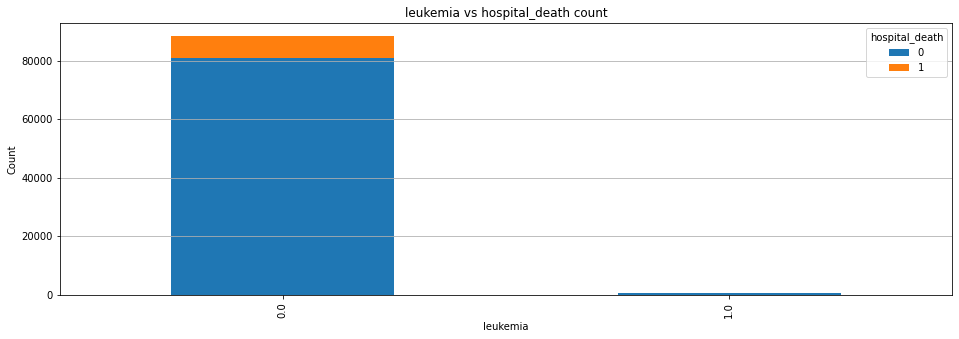

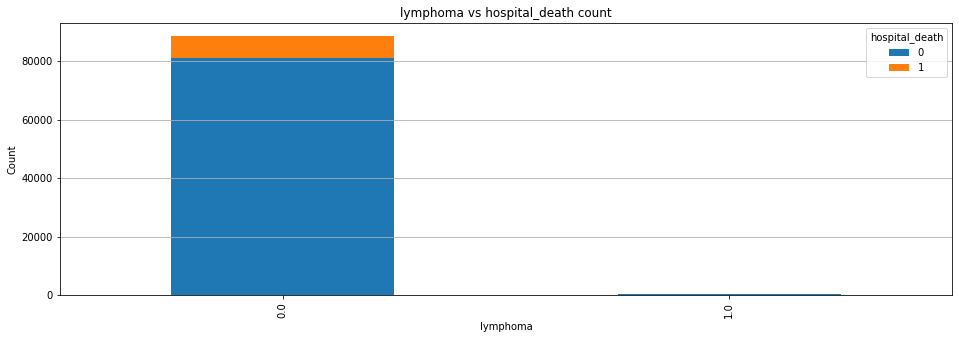

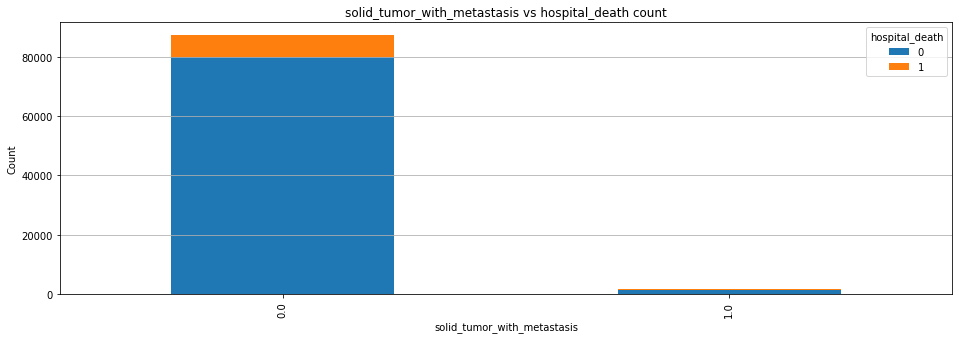

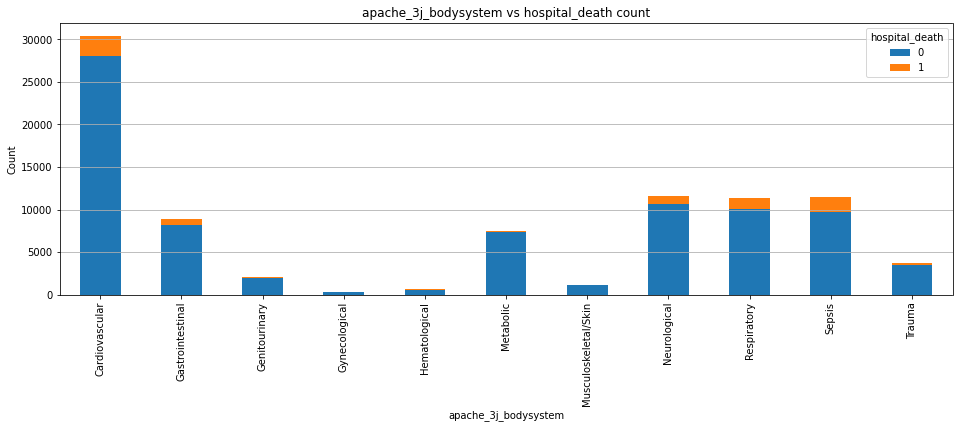

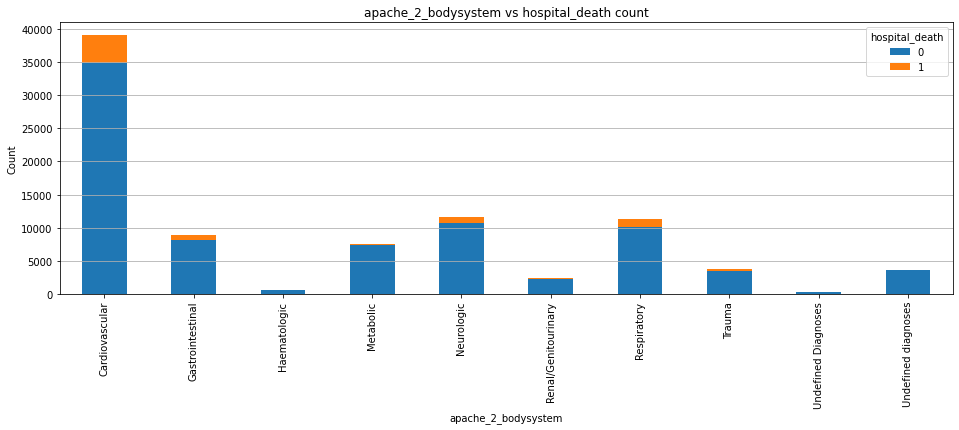

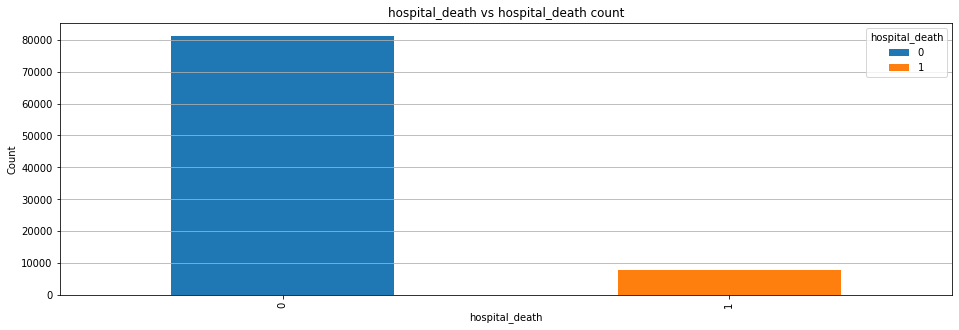

In [9]:
# Relationship count
def plotOccurence(data,colname,label):
    plot=pd.crosstab(index=data[colname],columns=data[label]).plot(kind='bar',stacked=True,figsize=(16,5))
    plt.xlabel(colname)
    plt.ylabel('Count')
    plt.grid(axis='y',linestyle='-')
    plt.title(colname+" vs "+label+" count")

for label in df.columns:
    plotOccurence(df,label,'hospital_death')
    #plotProportion(df,label,'hospital_death')

In [10]:
# Dropping more columns
df.drop(['aids','leukemia','lymphoma'],inplace=True,axis=1)

In [11]:
# Outlier treatment
for col in df.columns:
    if df[col].dtype=='int64' or df[col].dtype=='float64':
        uq=np.percentile(df[col],[99])[0] #Upper Quartile
        df[col][(df[col] > 3*uq)] = 3*uq
        #print(df[col][(df[col] > 3*uq)]) 
        lq=np.percentile(df[col],[1])[0] #Lower quartile
        df[col][(df[col] < 0.3*lq)] = 0.3*lq
        #print(df[col][(df[col] < 0.3*lq)]) 


C:\Users\SUGAM\AppData\Local\Temp/ipykernel_12316/761813867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] > 3*uq)] = 3*uq
C:\Users\SUGAM\AppData\Local\Temp/ipykernel_12316/761813867.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] < 0.3*lq)] = 0.3*lq


In [12]:
#Generating dummy variables
df=pd.get_dummies(df, columns=['ethnicity','gender','icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89021 entries, 0 to 91712
Columns: 108 entries, age to apache_2_bodysystem_Undefined diagnoses
dtypes: float64(67), int64(3), uint8(38)
memory usage: 51.4 MB


In [13]:
#Basic model
X=df.loc[:,df.columns!='hospital_death']
Y=df['hospital_death']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
model1=LogisticRegression()
model1.fit(X_train,Y_train)
print(classification_report(Y_test,model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     24443
           1       0.62      0.15      0.24      2264

    accuracy                           0.92     26707
   macro avg       0.78      0.57      0.60     26707
weighted avg       0.90      0.92      0.90     26707



c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_test)
X_test=scaler.transform(X_test)

In [16]:
#Logistic Regression
model2=LogisticRegression()
model2.fit(X_train,Y_train)
print(classification_report(Y_test,model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     24443
           1       0.64      0.28      0.39      2264

    accuracy                           0.93     26707
   macro avg       0.79      0.63      0.67     26707
weighted avg       0.91      0.93      0.91     26707



c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#Support Vector machines
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train,Y_train)
print(classification_report(Y_test,model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     24443
           1       0.75      0.23      0.36      2264

    accuracy                           0.93     26707
   macro avg       0.84      0.61      0.66     26707
weighted avg       0.92      0.93      0.91     26707



In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(max_depth=10,random_state=42)
model4.fit(X_train,Y_train)
print(classification_report(Y_test,model4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     24443
           1       0.57      0.26      0.35      2264

    accuracy                           0.92     26707
   macro avg       0.75      0.62      0.66     26707
weighted avg       0.90      0.92      0.91     26707

